# Company Credit Rating
In this part we are going to select features from focal firms, supplier firms and customers. Then, we will do the prediction base on LightGBM algorithm. After that, we will try to find the relationship between the accuracy and the number of customer, the number of supplier, the number of customer and supplier combined. 

# 1. Load the necessary modules and the data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer
import lightgbm as lgb

In [2]:
#load the data
data = pd.read_csv('pred_data.csv')
data.head()

,f_x_cfo_and_intexp_over_intexp,f_x_ffo_and_intexp_over_intexp,f_x_accounts_payable_turnover,f_x_ar_turnover,f_x_altman_z_score,f_x_average_daily_production,f_x_cfo_over_d,f_x_cfo_over_interest_exp,f_x_cfoovercurr_liabs,f_x_cash_conversion_cycle_days,...,sw_x_return_on_e,sw_x_return_on_invested_capital,sw_x_return_on_total_capital,sw_x_revenue_volatility,sw_x_secured_d_to_asset,sw_x_solvency_margin,sw_x_total_asset_turnover,sw_x_working_capital_turnover,sw_x_cds,sw_x_rfactor
0,NaN,1.357513,9.4732,5.156038,0.346863,NaN,NaN,NaN,NaN,116.65836,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,1.697436,8.5937,5.283917,0.436334,NaN,NaN,NaN,NaN,112.66148,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,2.140777,8.4862,5.229549,0.368185,NaN,NaN,NaN,NaN,115.77538,...,0.002075,0.179481,0.408419,38.353016,NaN,NaN,0.041360,2.820141,NaN,NaN
3,NaN,2.324022,7.3915,4.813823,0.499252,NaN,NaN,NaN,NaN,109.21133,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,1.157068,8.7850,5.136970,0.542298,NaN,NaN,NaN,NaN,116.08141,...,0.007424,1.461159,NaN,5.431898,0.0,NaN,0.033967,NaN,NaN,NaN


In [3]:
np.array(data.columns)

array(['f_x_cfo_and_intexp_over_intexp', 'f_x_ffo_and_intexp_over_intexp',
       'f_x_accounts_payable_turnover', 'f_x_ar_turnover',
       'f_x_altman_z_score', 'f_x_average_daily_production',
       'f_x_cfo_over_d', 'f_x_cfo_over_interest_exp',
       'f_x_cfoovercurr_liabs', 'f_x_cash_conversion_cycle_days',
       'f_x_cash_ratio', 'f_x_cashflow_roic', 'composite_rating',
       'f_x_current_ratio', 'f_x_d_over_book_capitalization',
       'f_x_d_over_ebitda', 'f_x_d_over_oper_inc', 'f_x_d_coverage_ratio',
       'f_x_d_service_coverage_ratio', 'f_x_d_service_ratio',
       'f_x_d_to_asset', 'f_x_d_to_capital', 'f_x_d_to_e',
       'f_x_d_to_tangible_e', 'f_x_ebit_over_average_assets',
       'f_x_ebit_margin', 'f_x_ebitda_capex_int_cov',
       'f_x_ebitda_interest_coverage', 'f_x_fcf_over_d',
       'f_x_fcf_over_div_yield', 'f_x_ffo_over_d', 'f_x_ffo_over_net_d',
       'FactsetID', 'f_x_fixed_asset_turnover',
       'f_x_fixed_charge_cov_ratio', 'f_x_gw_and_intan_overE',
    

In [4]:
f_x_var_name = np.array([
    'f_x_cfo_and_intexp_over_intexp', 'f_x_ffo_and_intexp_over_intexp',
    'f_x_accounts_payable_turnover', 'f_x_ar_turnover', 'f_x_altman_z_score',
    'f_x_average_daily_production', 'f_x_cfo_over_d',
    'f_x_cfo_over_interest_exp', 'f_x_cfoovercurr_liabs',
    'f_x_cash_conversion_cycle_days', 'f_x_cash_ratio', 'f_x_cashflow_roic',
    'f_x_current_ratio', 'f_x_d_over_book_capitalization', 'f_x_d_over_ebitda',
    'f_x_d_over_oper_inc', 'f_x_d_coverage_ratio',
    'f_x_d_service_coverage_ratio', 'f_x_d_service_ratio', 'f_x_d_to_asset',
    'f_x_d_to_capital', 'f_x_d_to_e', 'f_x_d_to_tangible_e',
    'f_x_ebit_over_average_assets', 'f_x_ebit_margin',
    'f_x_ebitda_capex_int_cov', 'f_x_ebitda_interest_coverage',
    'f_x_fcf_over_d', 'f_x_fcf_over_div_yield', 'f_x_ffo_over_d',
    'f_x_ffo_over_net_d', 'f_x_fixed_asset_turnover',
    'f_x_fixed_charge_cov_ratio', 'f_x_gw_and_intan_overE',
    'f_x_gross_profit_margin', 'f_x_interest_coverage_ratio',
    'f_x_inventory_turnover', 'f_x_investment_yield',
    'f_x_liquid_asset_over_reserves', 'f_x_loss_ratio',
    'f_x_net_d_over_ebitda', 'f_x_net_profit_margin', 'f_x_opex_over_revenues',
    'f_x_OpInc_minusCapex_IntCov', 'f_x_oper_inc_interest_coverage',
    'f_x_oper_income_over_ave_assets', 'f_x_operating_leverage',
    'f_x_operating_margin', 'f_x_piotroski_fscore',
    'f_x_proved_resources', 'f_x_quick_ratio', 'f_x_rcf_over_d',
    'f_x_rcf_over_net_d', 'f_x_roic',
    'f_x_reinvestment_rate', 'f_x_return_on_asset', 'f_x_return_on_e',
    'f_x_return_on_invested_capital', 'f_x_return_on_total_capital',
    'f_x_revenue_volatility', 'f_x_secured_d_to_asset', 'f_x_solvency_margin',
    'f_x_total_asset_turnover', 'f_x_working_capital_turnover'
])

In [5]:
c_x_var_name = np.array([
    'c_x_cfo_and_intexp_over_intexp', 'c_x_ffo_and_intexp_over_intexp',
    'c_x_accounts_payable_turnover', 'c_x_ar_turnover', 'c_x_altman_z_score',
    'c_x_average_daily_production', 'c_x_cfo_over_d',
    'c_x_cfo_over_interest_exp', 'c_x_cfoovercurr_liabs',
    'c_x_cash_conversion_cycle_days', 'c_x_cash_ratio', 'c_x_cashflow_roic',
    'c_x_current_ratio', 'c_x_d_over_book_capitalization', 'c_x_d_over_ebitda',
    'c_x_d_over_oper_inc', 'c_x_d_coverage_ratio',
    'c_x_d_service_coverage_ratio', 'c_x_d_service_ratio', 'c_x_d_to_asset',
    'c_x_d_to_capital', 'c_x_d_to_e', 'c_x_d_to_tangible_e',
    'c_x_ebit_over_average_assets', 'c_x_ebit_margin',
    'c_x_ebitda_capex_int_cov', 'c_x_ebitda_interest_coverage',
    'c_x_fcf_over_d', 'c_x_fcf_over_div_yield', 'c_x_ffo_over_d',
    'c_x_ffo_over_net_d', 'c_x_fixed_asset_turnover',
    'c_x_fixed_charge_cov_ratio', 'c_x_gw_and_intan_overE',
    'c_x_gross_profit_margin', 'c_x_interest_coverage_ratio',
    'c_x_inventory_turnover', 'c_x_investment_yield',
    'c_x_liquid_asset_over_reserves', 'c_x_loss_ratio',
    'c_x_net_d_over_ebitda', 'c_x_net_profit_margin', 'c_x_opex_over_revenues',
    'c_x_OpInc_minusCapex_IntCov', 'c_x_oper_inc_interest_coverage',
    'c_x_oper_income_over_ave_assets', 'c_x_operating_leverage',
    'c_x_operating_margin', 'c_x_piotroski_fscore', 'c_x_proved_resources',
    'c_x_quick_ratio', 'c_x_rcf_over_d', 'c_x_rcf_over_net_d', 'c_x_roic',
    'c_x_rating_factor', 'c_x_reinvestment_rate', 'c_x_return_on_asset',
    'c_x_return_on_e', 'c_x_return_on_invested_capital',
    'c_x_return_on_total_capital', 'c_x_revenue_volatility',
    'c_x_secured_d_to_asset', 'c_x_solvency_margin',
    'c_x_total_asset_turnover', 'c_x_working_capital_turnover', 'c_x_cds',
    'c_x_rfactor', 'cw_x_cfo_and_intexp_over_intexp',
    'cw_x_ffo_and_intexp_over_intexp', 'cw_x_accounts_payable_turnover',
    'cw_x_ar_turnover', 'cw_x_altman_z_score', 'cw_x_average_daily_production',
    'cw_x_cfo_over_d', 'cw_x_cfo_over_interest_exp', 'cw_x_cfoovercurr_liabs',
    'cw_x_cash_conversion_cycle_days', 'cw_x_cash_ratio', 'cw_x_cashflow_roic',
    'cw_x_current_ratio', 'cw_x_d_over_book_capitalization',
    'cw_x_d_over_ebitda', 'cw_x_d_over_oper_inc', 'cw_x_d_coverage_ratio',
    'cw_x_d_service_coverage_ratio', 'cw_x_d_service_ratio', 'cw_x_d_to_asset',
    'cw_x_d_to_capital', 'cw_x_d_to_e', 'cw_x_d_to_tangible_e',
    'cw_x_ebit_over_average_assets', 'cw_x_ebit_margin',
    'cw_x_ebitda_capex_int_cov', 'cw_x_ebitda_interest_coverage',
    'cw_x_fcf_over_d', 'cw_x_fcf_over_div_yield', 'cw_x_ffo_over_d',
    'cw_x_ffo_over_net_d', 'cw_x_fixed_asset_turnover',
    'cw_x_fixed_charge_cov_ratio', 'cw_x_gw_and_intan_overE',
    'cw_x_gross_profit_margin', 'cw_x_interest_coverage_ratio',
    'cw_x_inventory_turnover', 'cw_x_investment_yield',
    'cw_x_liquid_asset_over_reserves', 'cw_x_loss_ratio',
    'cw_x_net_d_over_ebitda', 'cw_x_net_profit_margin',
    'cw_x_opex_over_revenues', 'cw_x_OpInc_minusCapex_IntCov',
    'cw_x_oper_inc_interest_coverage', 'cw_x_oper_income_over_ave_assets',
    'cw_x_operating_leverage', 'cw_x_operating_margin',
    'cw_x_piotroski_fscore', 'cw_x_proved_resources', 'cw_x_quick_ratio',
    'cw_x_rcf_over_d', 'cw_x_rcf_over_net_d', 'cw_x_roic',
    'cw_x_rating_factor', 'cw_x_reinvestment_rate', 'cw_x_return_on_asset',
    'cw_x_return_on_e', 'cw_x_return_on_invested_capital',
    'cw_x_return_on_total_capital', 'cw_x_revenue_volatility',
    'cw_x_secured_d_to_asset', 'cw_x_solvency_margin',
    'cw_x_total_asset_turnover', 'cw_x_working_capital_turnover', 'cw_x_cds',
    'cw_x_rfactor'
])

In [6]:
s_x_var_name = np.array([
    's_x_cfo_and_intexp_over_intexp', 's_x_ffo_and_intexp_over_intexp',
    's_x_accounts_payable_turnover', 's_x_ar_turnover', 's_x_altman_z_score',
    's_x_average_daily_production', 's_x_cfo_over_d',
    's_x_cfo_over_interest_exp', 's_x_cfoovercurr_liabs',
    's_x_cash_conversion_cycle_days', 's_x_cash_ratio', 's_x_cashflow_roic',
    's_x_current_ratio', 's_x_d_over_book_capitalization', 's_x_d_over_ebitda',
    's_x_d_over_oper_inc', 's_x_d_coverage_ratio',
    's_x_d_service_coverage_ratio', 's_x_d_service_ratio', 's_x_d_to_asset',
    's_x_d_to_capital', 's_x_d_to_e', 's_x_d_to_tangible_e',
    's_x_ebit_over_average_assets', 's_x_ebit_margin',
    's_x_ebitda_capex_int_cov', 's_x_ebitda_interest_coverage',
    's_x_fcf_over_d', 's_x_fcf_over_div_yield', 's_x_ffo_over_d',
    's_x_ffo_over_net_d', 's_x_fixed_asset_turnover',
    's_x_fixed_charge_cov_ratio', 's_x_gw_and_intan_overE',
    's_x_gross_profit_margin', 's_x_interest_coverage_ratio',
    's_x_inventory_turnover', 's_x_investment_yield',
    's_x_liquid_asset_over_reserves', 's_x_loss_ratio',
    's_x_net_d_over_ebitda', 's_x_net_profit_margin', 's_x_opex_over_revenues',
    's_x_OpInc_minusCapex_IntCov', 's_x_oper_inc_interest_coverage',
    's_x_oper_income_over_ave_assets', 's_x_operating_leverage',
    's_x_operating_margin', 's_x_piotroski_fscore', 's_x_proved_resources',
    's_x_quick_ratio', 's_x_rcf_over_d', 's_x_rcf_over_net_d', 's_x_roic',
    's_x_rating_factor', 's_x_reinvestment_rate', 's_x_return_on_asset',
    's_x_return_on_e', 's_x_return_on_invested_capital',
    's_x_return_on_total_capital', 's_x_revenue_volatility',
    's_x_secured_d_to_asset', 's_x_solvency_margin',
    's_x_total_asset_turnover', 's_x_working_capital_turnover', 's_x_cds',
    's_x_rfactor', 'sw_x_cfo_and_intexp_over_intexp',
    'sw_x_ffo_and_intexp_over_intexp', 'sw_x_accounts_payable_turnover',
    'sw_x_ar_turnover', 'sw_x_altman_z_score', 'sw_x_average_daily_production',
    'sw_x_cfo_over_d', 'sw_x_cfo_over_interest_exp', 'sw_x_cfoovercurr_liabs',
    'sw_x_cash_conversion_cycle_days', 'sw_x_cash_ratio', 'sw_x_cashflow_roic',
    'sw_x_current_ratio', 'sw_x_d_over_book_capitalization',
    'sw_x_d_over_ebitda', 'sw_x_d_over_oper_inc', 'sw_x_d_coverage_ratio',
    'sw_x_d_service_coverage_ratio', 'sw_x_d_service_ratio', 'sw_x_d_to_asset',
    'sw_x_d_to_capital', 'sw_x_d_to_e', 'sw_x_d_to_tangible_e',
    'sw_x_ebit_over_average_assets', 'sw_x_ebit_margin',
    'sw_x_ebitda_capex_int_cov', 'sw_x_ebitda_interest_coverage',
    'sw_x_fcf_over_d', 'sw_x_fcf_over_div_yield', 'sw_x_ffo_over_d',
    'sw_x_ffo_over_net_d', 'sw_x_fixed_asset_turnover',
    'sw_x_fixed_charge_cov_ratio', 'sw_x_gw_and_intan_overE',
    'sw_x_gross_profit_margin', 'sw_x_interest_coverage_ratio',
    'sw_x_inventory_turnover', 'sw_x_investment_yield',
    'sw_x_liquid_asset_over_reserves', 'sw_x_loss_ratio',
    'sw_x_net_d_over_ebitda', 'sw_x_net_profit_margin',
    'sw_x_opex_over_revenues', 'sw_x_OpInc_minusCapex_IntCov',
    'sw_x_oper_inc_interest_coverage', 'sw_x_oper_income_over_ave_assets',
    'sw_x_operating_leverage', 'sw_x_operating_margin',
    'sw_x_piotroski_fscore', 'sw_x_proved_resources', 'sw_x_quick_ratio',
    'sw_x_rcf_over_d', 'sw_x_rcf_over_net_d', 'sw_x_roic',
    'sw_x_rating_factor', 'sw_x_reinvestment_rate', 'sw_x_return_on_asset',
    'sw_x_return_on_e', 'sw_x_return_on_invested_capital',
    'sw_x_return_on_total_capital', 'sw_x_revenue_volatility',
    'sw_x_secured_d_to_asset', 'sw_x_solvency_margin',
    'sw_x_total_asset_turnover', 'sw_x_working_capital_turnover', 'sw_x_cds',
    'sw_x_rfactor'
])

# 2. Prediction for all sectors as a whole

## 2.1 Using f_x_* only

### 2.1.1 Preprocessing the data

First of all, we will handle the missing values.

In [7]:
# Check if there are missing values in rating_code
pd.isna(data['rgroup_code']).sum()

899

We can see that there are 887 missing values in rating_code. We need to delete those samples.

In [8]:
index = np.array(data[data['rgroup_code'].isnull()==True].index)
data = data.drop(index)
data.head()

,f_x_cfo_and_intexp_over_intexp,f_x_ffo_and_intexp_over_intexp,f_x_accounts_payable_turnover,f_x_ar_turnover,f_x_altman_z_score,f_x_average_daily_production,f_x_cfo_over_d,f_x_cfo_over_interest_exp,f_x_cfoovercurr_liabs,f_x_cash_conversion_cycle_days,...,sw_x_return_on_e,sw_x_return_on_invested_capital,sw_x_return_on_total_capital,sw_x_revenue_volatility,sw_x_secured_d_to_asset,sw_x_solvency_margin,sw_x_total_asset_turnover,sw_x_working_capital_turnover,sw_x_cds,sw_x_rfactor
0,NaN,1.357513,9.4732,5.156038,0.346863,NaN,NaN,NaN,NaN,116.65836,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,1.697436,8.5937,5.283917,0.436334,NaN,NaN,NaN,NaN,112.66148,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,2.140777,8.4862,5.229549,0.368185,NaN,NaN,NaN,NaN,115.77538,...,0.002075,0.179481,0.408419,38.353016,NaN,NaN,0.041360,2.820141,NaN,NaN
3,NaN,2.324022,7.3915,4.813823,0.499252,NaN,NaN,NaN,NaN,109.21133,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,1.157068,8.7850,5.136970,0.542298,NaN,NaN,NaN,NaN,116.08141,...,0.007424,1.461159,NaN,5.431898,0.0,NaN,0.033967,NaN,NaN,NaN


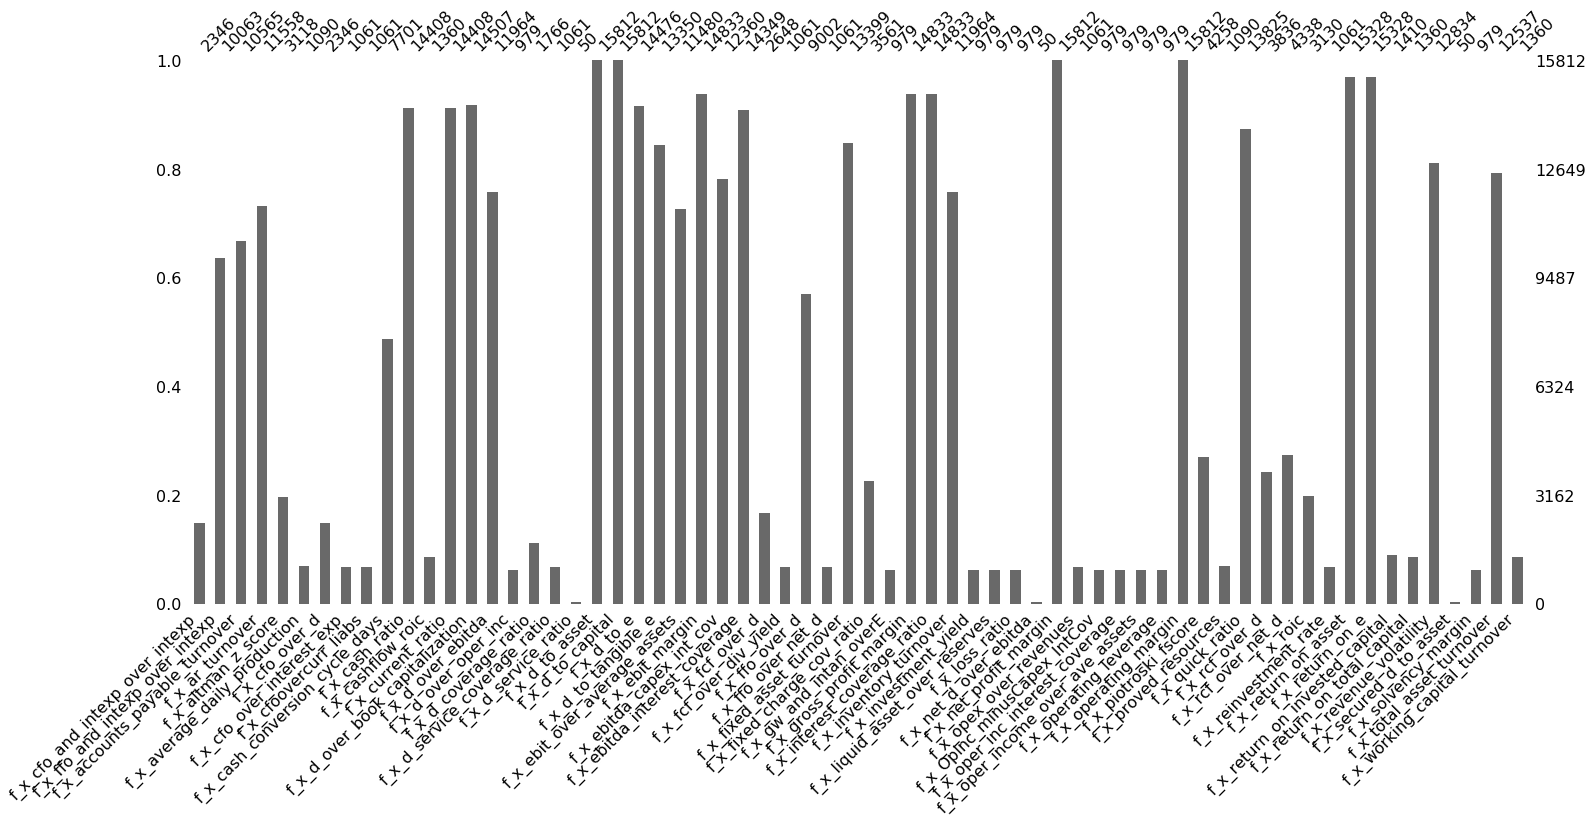

In [9]:
# Plot of the missing value distribution.
msno.bar(data[f_x_var_name], labels=True)

In [10]:
# Percentage of missing values
f_x_missing_value = pd.DataFrame((data[f_x_var_name].isna().sum()/len(data)), columns=['na percentage'])
f_x_missing_value

,na percentage
f_x_cfo_and_intexp_over_intexp,0.851632
f_x_ffo_and_intexp_over_intexp,0.363585
f_x_accounts_payable_turnover,0.331837
f_x_ar_turnover,0.269036
f_x_altman_z_score,0.802808
f_x_average_daily_production,0.931065
f_x_cfo_over_d,0.851632
f_x_cfo_over_interest_exp,0.932899
f_x_cfoovercurr_liabs,0.932899
f_x_cash_conversion_cycle_days,0.512965


Since some of the f_x_* features are highly related to certain sectors, we select features with missing values less than 20%.

In [11]:
f_x_feature_select = f_x_missing_value[(1-f_x_missing_value['na percentage'])>=0.8]
f_x_feature_select = np.array(f_x_feature_select.index)
print(len(f_x_feature_select))
f_x_feature_select

18


array(['f_x_cash_ratio', 'f_x_current_ratio',
       'f_x_d_over_book_capitalization', 'f_x_d_to_asset',
       'f_x_d_to_capital', 'f_x_d_to_e', 'f_x_d_to_tangible_e',
       'f_x_ebit_margin', 'f_x_ebitda_interest_coverage',
       'f_x_fixed_asset_turnover', 'f_x_gross_profit_margin',
       'f_x_interest_coverage_ratio', 'f_x_net_profit_margin',
       'f_x_operating_margin', 'f_x_quick_ratio', 'f_x_return_on_asset',
       'f_x_return_on_e', 'f_x_revenue_volatility'], dtype=object)

Now we have 18 f_x_* features with missing values less than 20%.

We will use the average value of the feature to fill in each blank.

In [12]:
f_x_select_data = data[f_x_feature_select].fillna(data[f_x_feature_select].mean())
f_x_select_data.head()

,f_x_cash_ratio,f_x_current_ratio,f_x_d_over_book_capitalization,f_x_d_to_asset,f_x_d_to_capital,f_x_d_to_e,f_x_d_to_tangible_e,f_x_ebit_margin,f_x_ebitda_interest_coverage,f_x_fixed_asset_turnover,f_x_gross_profit_margin,f_x_interest_coverage_ratio,f_x_net_profit_margin,f_x_operating_margin,f_x_quick_ratio,f_x_return_on_asset,f_x_return_on_e,f_x_revenue_volatility
0,0.072654,2.070099,0.0,66.514351,111.83159,0.0,-2.009942,5.381888,1.321244,1.903097,30.454399,0.865285,-2.610377,5.381888,1.244980,-0.007403,0.105195,26.118921
1,0.325492,2.191362,0.0,63.153725,104.10740,0.0,-2.365765,9.933374,2.112821,2.052206,32.222897,1.682051,1.907935,9.933374,1.413272,0.005547,-0.222615,24.270929
2,0.161897,2.170913,0.0,63.677044,105.12418,0.0,-2.220452,10.675317,2.150485,2.180708,31.495134,1.757281,3.509289,10.675317,1.317522,0.011330,-0.365031,22.707443
3,0.395949,2.034956,0.0,59.908661,110.19601,0.0,-2.043996,11.519817,2.687151,2.345820,31.422869,2.256983,2.680354,11.519817,1.389088,0.008418,-0.151858,23.173864
4,0.305224,2.282600,0.0,64.044403,111.36629,0.0,-2.001795,3.253721,0.890052,1.993789,28.245068,0.492147,-5.988231,3.253721,1.448375,-0.016557,0.253294,24.489346


Secondly, we will split the dataset into training set and test set.

In [13]:
# Split traning sets and testing sets.
f_x_train, f_x_test, f_x_y_train, f_x_y_test = train_test_split(f_x_select_data,data['rgroup_code'],test_size = 0.3)

### 2.1.2 Apply LightGBM algorithm on the selected dataset.

In [14]:
# LightGBM model
model = lgb.LGBMClassifier(learning_rate=0.1, max_depth=5)
model.fit(f_x_train, f_x_y_train)
predict = model.predict(f_x_test)

f_x_y_test = pd.DataFrame({'actual':f_x_y_test, 'predicted':predict})

f_x_y_test['exact'] = f_x_y_test['actual'] == f_x_y_test['predicted']
f_x_y_test['within_one'] = abs(f_x_y_test['actual']-f_x_y_test['predicted']<=1)
f_exact_notch=len(f_x_y_test[f_x_y_test.exact==True])/len(f_x_y_test)
f_within_one_notch = len(f_x_y_test[f_x_y_test.within_one==True])/len(f_x_y_test)
print(f_exact_notch)
print(f_within_one_notch)


0.7801433389544689
0.9936762225969646


The accuracy of the prediction is very good. We can reach 99% accuracy for error within one notch.

## 2.2 Using c_x_* and cw_x_* only

### 2.2.1 Preprocessing the data.

First of all, we will handle the missing values.

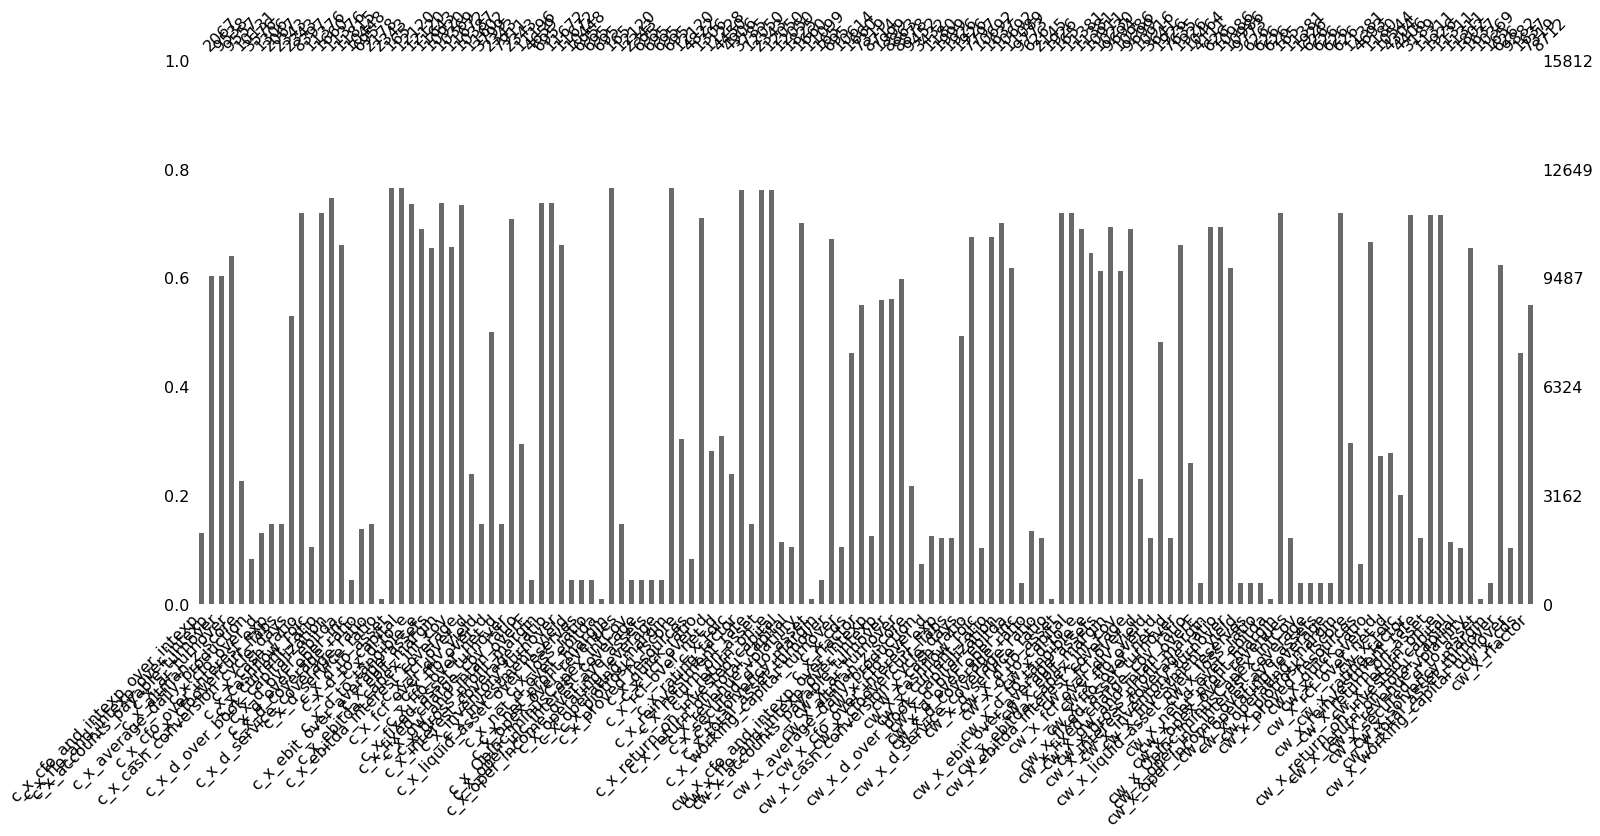

In [15]:
# Plot of the missing value distribution.
msno.bar(data[c_x_var_name], labels=True)

In [16]:
# Percentage of missing values
c_x_missing_value = pd.DataFrame((data[c_x_var_name].isna().sum()/len(data)), columns=['na percentage'])
c_x_missing_value

,na percentage
c_x_cfo_and_intexp_over_intexp,0.869276
c_x_ffo_and_intexp_over_intexp,0.396787
c_x_accounts_payable_turnover,0.395586
c_x_ar_turnover,0.359284
c_x_altman_z_score,0.773843
c_x_average_daily_production,0.917405
c_x_cfo_over_d,0.869276
c_x_cfo_over_interest_exp,0.851821
c_x_cfoovercurr_liabs,0.851821
c_x_cash_conversion_cycle_days,0.468948


Since some of the c_x_* and cw_x_* features are highly related to certain sectors, we select features with missing values less than 30%.

In [17]:
c_x_feature_select = c_x_missing_value[(1-c_x_missing_value['na percentage'])>=0.7]
c_x_feature_select = np.array(c_x_feature_select.index)
print(len(c_x_feature_select))
c_x_feature_select

26


array(['c_x_cash_ratio', 'c_x_current_ratio',
       'c_x_d_over_book_capitalization', 'c_x_d_to_asset',
       'c_x_d_to_capital', 'c_x_d_to_e', 'c_x_ebit_margin',
       'c_x_ebitda_interest_coverage', 'c_x_fixed_asset_turnover',
       'c_x_gross_profit_margin', 'c_x_interest_coverage_ratio',
       'c_x_net_profit_margin', 'c_x_operating_margin', 'c_x_quick_ratio',
       'c_x_rating_factor', 'c_x_return_on_asset', 'c_x_return_on_e',
       'c_x_revenue_volatility', 'cw_x_d_over_book_capitalization',
       'cw_x_d_to_asset', 'cw_x_d_to_capital', 'cw_x_net_profit_margin',
       'cw_x_operating_margin', 'cw_x_rating_factor',
       'cw_x_return_on_asset', 'cw_x_return_on_e'], dtype=object)

Now we have 26 c_x_* and cw_x_* features with missing values less than 70%.

We will use the average value of the feature to fill in each blank.

In [18]:
c_x_select_data = data[c_x_feature_select].fillna(data[c_x_feature_select].mean())
c_x_select_data.head()

,c_x_cash_ratio,c_x_current_ratio,c_x_d_over_book_capitalization,c_x_d_to_asset,c_x_d_to_capital,c_x_d_to_e,c_x_ebit_margin,c_x_ebitda_interest_coverage,c_x_fixed_asset_turnover,c_x_gross_profit_margin,...,c_x_return_on_e,c_x_revenue_volatility,cw_x_d_over_book_capitalization,cw_x_d_to_asset,cw_x_d_to_capital,cw_x_net_profit_margin,cw_x_operating_margin,cw_x_rating_factor,cw_x_return_on_asset,cw_x_return_on_e
0,0.236725,1.560183,29.178926,15.394654,22.587994,29.178926,5.642807,8.395893,2.866889,24.535318,...,0.027280,390.10095,6.480965,3.419325,5.017046,0.713314,1.253331,79.960022,0.003197,0.006059
1,0.209126,1.571488,32.214893,16.748075,24.365555,32.214893,4.779339,8.209717,2.713898,24.351915,...,0.024806,416.82712,7.164233,3.724585,5.418627,0.674235,1.062872,80.059982,0.002868,0.005517
2,0.252140,1.506232,27.704834,14.595994,21.694429,27.704834,8.115584,13.756520,3.113089,26.137033,...,0.045502,312.06451,7.742946,4.079288,6.063158,1.388397,2.268143,100.612790,0.006700,0.012717
3,0.221315,1.506126,17.233067,8.499974,13.823663,17.233067,4.416707,16.303957,18.961624,15.104228,...,0.034050,335.18231,3.773902,1.869740,3.019469,0.564422,0.965360,101.708130,0.003289,0.007290
4,0.308279,1.598521,28.696609,15.226876,22.297876,28.696609,5.209912,10.272929,2.969737,26.117981,...,0.026391,298.14294,7.998428,4.244093,6.214949,0.854042,1.452126,100.340570,0.003903,0.007356


In [19]:
# Split traning sets and testing sets.
c_x_train, c_x_test, c_x_y_train, c_x_y_test = train_test_split(c_x_select_data,data['rgroup_code'],test_size = 0.3)

### 2.2.2 Apply LightGBM algorithm on the selected dataset.

In [20]:
# LightGBM model
model = lgb.LGBMClassifier(learning_rate=0.1, max_depth=5)
model.fit(c_x_train, c_x_y_train)
predict = model.predict(c_x_test)

c_x_y_test = pd.DataFrame({'actual':c_x_y_test, 'predicted':predict})

c_x_y_test['exact'] = c_x_y_test['actual'] == c_x_y_test['predicted']
c_x_y_test['within_one'] = abs(c_x_y_test['actual']-c_x_y_test['predicted']<=1)
c_exact_notch=len(c_x_y_test[c_x_y_test.exact==True])/len(c_x_y_test)
c_within_one_notch = len(c_x_y_test[c_x_y_test.within_one==True])/len(c_x_y_test)
print(c_exact_notch)
print(c_within_one_notch)


0.540893760539629
0.9793423271500843


The outcome is not good as using f_x_* variables, but the accuracy of the prediction within one notch can still reach 97%.

## 2.3 Using s_x_* and sw_x_* only

### 2.3.1 Preprocessing the data

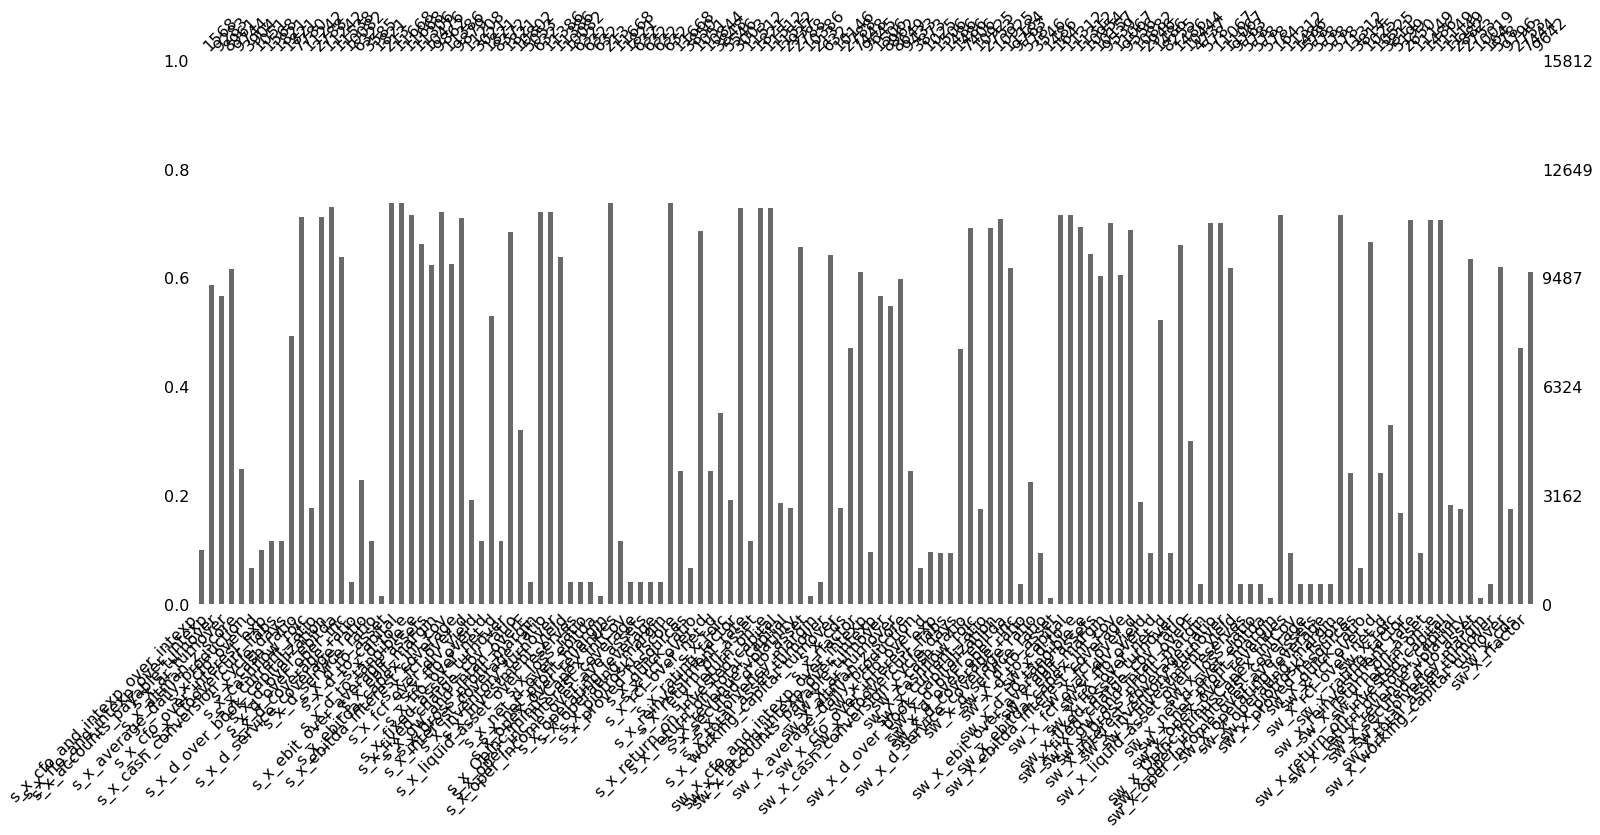

In [21]:
# Plot of the missing value distribution.
msno.bar(data[s_x_var_name], labels=True)

In [22]:
# Percentage of missing values
s_x_missing_value = pd.DataFrame((data[s_x_var_name].isna().sum()/len(data)), columns=['na percentage'])
s_x_missing_value

,na percentage
s_x_cfo_and_intexp_over_intexp,0.900835
s_x_ffo_and_intexp_over_intexp,0.412914
s_x_accounts_payable_turnover,0.433279
s_x_ar_turnover,0.383759
s_x_altman_z_score,0.753099
s_x_average_daily_production,0.933531
s_x_cfo_over_d,0.900835
s_x_cfo_over_interest_exp,0.884834
s_x_cfoovercurr_liabs,0.884834
s_x_cash_conversion_cycle_days,0.507969


Since some of the s_x_* and sw_x_* features are highly related to certain sectors, we select features with missing values less than 30%.

In [23]:
s_x_feature_select = s_x_missing_value[(1-s_x_missing_value['na percentage'])>=0.7]
s_x_feature_select = np.array(s_x_feature_select.index)
print(len(s_x_feature_select))
s_x_feature_select

23


array(['s_x_cash_ratio', 's_x_current_ratio',
       's_x_d_over_book_capitalization', 's_x_d_to_asset',
       's_x_d_to_capital', 's_x_d_to_e', 's_x_ebit_margin',
       's_x_ebitda_interest_coverage', 's_x_gross_profit_margin',
       's_x_interest_coverage_ratio', 's_x_net_profit_margin',
       's_x_operating_margin', 's_x_rating_factor', 's_x_return_on_asset',
       's_x_return_on_e', 'sw_x_d_over_book_capitalization',
       'sw_x_d_to_asset', 'sw_x_d_to_capital', 'sw_x_net_profit_margin',
       'sw_x_operating_margin', 'sw_x_rating_factor',
       'sw_x_return_on_asset', 'sw_x_return_on_e'], dtype=object)

Now we have 23 s_x_* and sw_x_* features with missing values less than 70%.

We will use the average value of the feature to fill in each blank.

In [24]:
s_x_select_data = data[s_x_feature_select].fillna(data[s_x_feature_select].mean())
s_x_select_data.head()

,s_x_cash_ratio,s_x_current_ratio,s_x_d_over_book_capitalization,s_x_d_to_asset,s_x_d_to_capital,s_x_d_to_e,s_x_ebit_margin,s_x_ebitda_interest_coverage,s_x_gross_profit_margin,s_x_interest_coverage_ratio,...,s_x_return_on_asset,s_x_return_on_e,sw_x_d_over_book_capitalization,sw_x_d_to_asset,sw_x_d_to_capital,sw_x_net_profit_margin,sw_x_operating_margin,sw_x_rating_factor,sw_x_return_on_asset,sw_x_return_on_e
0,0.606880,1.751363,176.591133,33.054736,52.895117,177.884344,14.899592,26.988331,32.515419,19.587792,...,0.012159,0.010470,35.427133,6.609011,10.368800,1.705368,3.117171,139.54424,0.002599,0.005583
1,0.606880,1.751363,176.591133,33.054736,52.895117,177.884344,14.899592,26.988331,32.515419,19.587792,...,0.012159,0.010470,35.427133,6.609011,10.368800,1.705368,3.117171,139.54424,0.002599,0.005583
2,0.211426,1.085260,80.365944,34.476646,44.557159,80.365944,13.301689,4.305555,39.736725,2.975309,...,0.009791,0.022823,7.305995,3.134241,4.050651,0.683148,1.209245,122.72728,0.000890,0.002075
3,0.606880,1.751363,176.591133,33.054736,52.895117,177.884344,14.899592,26.988331,32.515419,19.587792,...,0.012159,0.010470,35.427133,6.609011,10.368800,1.705368,3.117171,139.54424,0.002599,0.005583
4,0.606880,1.751363,73.914665,29.814531,42.500534,73.914665,48.485844,11.867934,55.787674,10.179056,...,0.035934,0.089087,6.159555,2.484544,3.541711,2.195198,4.040487,226.66667,0.002995,0.007424


In [25]:
# Split traning sets and testing sets.
s_x_train, s_x_test, s_x_y_train, s_x_y_test = train_test_split(s_x_select_data,data['rgroup_code'],test_size = 0.3)

### 2.3.2 Apply LightGBM algorithm on the selected dataset.

In [26]:
# LightGBM model
model = lgb.LGBMClassifier(learning_rate=0.1, max_depth=5)
model.fit(s_x_train, s_x_y_train)
predict = model.predict(s_x_test)

s_x_y_test = pd.DataFrame({'actual':s_x_y_test, 'predicted':predict})

s_x_y_test['exact'] = s_x_y_test['actual'] == s_x_y_test['predicted']
s_x_y_test['within_one'] = abs(s_x_y_test['actual']-s_x_y_test['predicted']<=1)
s_exact_notch=len(s_x_y_test[s_x_y_test.exact==True])/len(s_x_y_test)
s_within_one_notch = len(s_x_y_test[s_x_y_test.within_one==True])/len(s_x_y_test)
print(s_exact_notch)
print(s_within_one_notch)


0.5149662731871838
0.9839797639123102


The result is similar to the 2.2.2. We have a high accuracy prediction within one notch.

## 2.4 Using c_x_*, cw_x_* and s_x_*, sw_x_*

### 2.4.1 Preprocessing the data

In [27]:
# Combine the c_* dataset and the s_* dataset which nan is less than 30%.
c_s_select_data = c_x_select_data.join(s_x_select_data)
c_s_select_data.head()

,c_x_cash_ratio,c_x_current_ratio,c_x_d_over_book_capitalization,c_x_d_to_asset,c_x_d_to_capital,c_x_d_to_e,c_x_ebit_margin,c_x_ebitda_interest_coverage,c_x_fixed_asset_turnover,c_x_gross_profit_margin,...,s_x_return_on_asset,s_x_return_on_e,sw_x_d_over_book_capitalization,sw_x_d_to_asset,sw_x_d_to_capital,sw_x_net_profit_margin,sw_x_operating_margin,sw_x_rating_factor,sw_x_return_on_asset,sw_x_return_on_e
0,0.236725,1.560183,29.178926,15.394654,22.587994,29.178926,5.642807,8.395893,2.866889,24.535318,...,0.012159,0.010470,35.427133,6.609011,10.368800,1.705368,3.117171,139.54424,0.002599,0.005583
1,0.209126,1.571488,32.214893,16.748075,24.365555,32.214893,4.779339,8.209717,2.713898,24.351915,...,0.012159,0.010470,35.427133,6.609011,10.368800,1.705368,3.117171,139.54424,0.002599,0.005583
2,0.252140,1.506232,27.704834,14.595994,21.694429,27.704834,8.115584,13.756520,3.113089,26.137033,...,0.009791,0.022823,7.305995,3.134241,4.050651,0.683148,1.209245,122.72728,0.000890,0.002075
3,0.221315,1.506126,17.233067,8.499974,13.823663,17.233067,4.416707,16.303957,18.961624,15.104228,...,0.012159,0.010470,35.427133,6.609011,10.368800,1.705368,3.117171,139.54424,0.002599,0.005583
4,0.308279,1.598521,28.696609,15.226876,22.297876,28.696609,5.209912,10.272929,2.969737,26.117981,...,0.035934,0.089087,6.159555,2.484544,3.541711,2.195198,4.040487,226.66667,0.002995,0.007424


In [28]:
# Use stepwise regression to select features.
X = c_s_select_data
y = np.array(data['rating_code'])
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

result = stepwise_selection(X, y)

print('resulting features:')
print(result)

C:\anaconda2\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\anaconda2\lib\site-packages\ipykernel_launcher.py:32: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.


Add  sw_x_d_to_asset                with p-value 5.33776e-130
Add  c_x_fixed_asset_turnover       with p-value 2.78714e-62
Add  cw_x_d_to_asset                with p-value 5.23597e-17
Add  s_x_current_ratio              with p-value 1.41277e-13
Add  s_x_cash_ratio                 with p-value 1.83334e-50
Add  sw_x_rating_factor             with p-value 9.78013e-08
Add  s_x_d_to_asset                 with p-value 1.04891e-07
Add  c_x_quick_ratio                with p-value 1.32751e-06
Add  sw_x_operating_margin          with p-value 0.00110705
Add  c_x_d_to_asset                 with p-value 0.00227853
Add  c_x_operating_margin           with p-value 0.00269921
Add  c_x_gross_profit_margin        with p-value 4.81052e-08
Add  cw_x_d_to_capital              with p-value 0.00279163
Add  c_x_ebitda_interest_coverage   with p-value 0.0032871
Add  cw_x_operating_margin          with p-value 0.00408194
Drop c_x_d_to_asset                 with p-value 0.052546


C:\anaconda2\lib\site-packages\ipykernel_launcher.py:45: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.


Add  cw_x_net_profit_margin         with p-value 0.00362132
Add  c_x_return_on_asset            with p-value 0.00292546
Add  c_x_revenue_volatility         with p-value 0.00424422
Add  cw_x_return_on_e               with p-value 0.00110959
resulting features:
['sw_x_d_to_asset', 'c_x_fixed_asset_turnover', 'cw_x_d_to_asset', 's_x_current_ratio', 's_x_cash_ratio', 'sw_x_rating_factor', 's_x_d_to_asset', 'c_x_quick_ratio', 'sw_x_operating_margin', 'c_x_operating_margin', 'c_x_gross_profit_margin', 'cw_x_d_to_capital', 'c_x_ebitda_interest_coverage', 'cw_x_operating_margin', 'cw_x_net_profit_margin', 'c_x_return_on_asset', 'c_x_revenue_volatility', 'cw_x_return_on_e']


In [29]:
c_s_feature_select = np.array([
    'sw_x_d_to_asset', 'c_x_fixed_asset_turnover', 'cw_x_d_to_asset',
    's_x_current_ratio', 's_x_cash_ratio', 'sw_x_rating_factor',
    's_x_d_to_asset', 'c_x_quick_ratio', 'sw_x_operating_margin',
    'c_x_operating_margin', 'c_x_gross_profit_margin', 'cw_x_d_to_capital',
    'c_x_ebitda_interest_coverage', 'cw_x_operating_margin',
    'cw_x_net_profit_margin', 'c_x_return_on_asset', 'c_x_revenue_volatility',
    'cw_x_return_on_e'
])
len(c_s_feature_select)

18

We select 18 features with p-value<0.01.

In [30]:
# Split traning sets and testing sets.
c_s_train, c_s_test, c_s_y_train, c_s_y_test = train_test_split(c_s_select_data[c_s_feature_select],data['rgroup_code'],test_size = 0.3)

### 2.4.2 Apply LightGBM algorithm on the dataset

In [31]:
# LightGBM model
model = lgb.LGBMClassifier(learning_rate=0.1, max_depth=5)
model.fit(c_s_train, c_s_y_train)
predict = model.predict(c_s_test)

c_s_y_test = pd.DataFrame({'actual':c_s_y_test, 'predicted':predict})

c_s_y_test['exact'] = c_s_y_test['actual'] == c_s_y_test['predicted']
c_s_y_test['within_one'] = abs(c_s_y_test['actual']-c_s_y_test['predicted']<=1)
c_s_exact_notch=len(c_s_y_test[c_s_y_test.exact==True])/len(c_s_y_test)
c_s_within_one_notch = len(c_s_y_test[c_s_y_test.within_one==True])/len(c_s_y_test)
print(c_s_exact_notch)
print(c_s_within_one_notch)


0.5545952782462057
0.9806070826306914


The result using c_x_*, cw_x_* and s_x_*, sw_x_* is similar to the previous models. 

## 2.5 Using f_x_*, c_x_*, cw_x_*, s_x_* and sw_x_*

### 2.5.1 Preprocessing the data

In [32]:
# Combine the f_* dataset, c_* dataset and the s_* dataset.
f_c_s_select_data = f_x_select_data.join(c_x_select_data.join(s_x_select_data))
f_c_s_select_data.head()

,f_x_cash_ratio,f_x_current_ratio,f_x_d_over_book_capitalization,f_x_d_to_asset,f_x_d_to_capital,f_x_d_to_e,f_x_d_to_tangible_e,f_x_ebit_margin,f_x_ebitda_interest_coverage,f_x_fixed_asset_turnover,...,s_x_return_on_asset,s_x_return_on_e,sw_x_d_over_book_capitalization,sw_x_d_to_asset,sw_x_d_to_capital,sw_x_net_profit_margin,sw_x_operating_margin,sw_x_rating_factor,sw_x_return_on_asset,sw_x_return_on_e
0,0.072654,2.070099,0.0,66.514351,111.83159,0.0,-2.009942,5.381888,1.321244,1.903097,...,0.012159,0.010470,35.427133,6.609011,10.368800,1.705368,3.117171,139.54424,0.002599,0.005583
1,0.325492,2.191362,0.0,63.153725,104.10740,0.0,-2.365765,9.933374,2.112821,2.052206,...,0.012159,0.010470,35.427133,6.609011,10.368800,1.705368,3.117171,139.54424,0.002599,0.005583
2,0.161897,2.170913,0.0,63.677044,105.12418,0.0,-2.220452,10.675317,2.150485,2.180708,...,0.009791,0.022823,7.305995,3.134241,4.050651,0.683148,1.209245,122.72728,0.000890,0.002075
3,0.395949,2.034956,0.0,59.908661,110.19601,0.0,-2.043996,11.519817,2.687151,2.345820,...,0.012159,0.010470,35.427133,6.609011,10.368800,1.705368,3.117171,139.54424,0.002599,0.005583
4,0.305224,2.282600,0.0,64.044403,111.36629,0.0,-2.001795,3.253721,0.890052,1.993789,...,0.035934,0.089087,6.159555,2.484544,3.541711,2.195198,4.040487,226.66667,0.002995,0.007424


In [33]:
# Use stepwise regression to select features.
X = f_c_s_select_data
y = np.array(data['rating_code'])
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

result = stepwise_selection(X, y)

print('resulting features:')
print(result)

C:\anaconda2\lib\site-packages\ipykernel_launcher.py:32: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.


Add  f_x_d_to_asset                 with p-value 0.0
Add  f_x_ebit_margin                with p-value 0.0
Add  f_x_revenue_volatility         with p-value 1.17592e-202
Add  f_x_gross_profit_margin        with p-value 1.62261e-95
Add  f_x_current_ratio              with p-value 6.28584e-95
Add  f_x_return_on_asset            with p-value 2.66134e-61
Add  sw_x_operating_margin          with p-value 3.33749e-55
Add  f_x_net_profit_margin          with p-value 7.65617e-46
Add  c_x_fixed_asset_turnover       with p-value 3.93812e-25
Add  sw_x_rating_factor             with p-value 6.14031e-17
Add  s_x_d_to_asset                 with p-value 5.60467e-14
Add  c_x_operating_margin           with p-value 1.32275e-09
Add  sw_x_d_to_capital              with p-value 6.93698e-10
Add  s_x_gross_profit_margin        with p-value 3.8081e-09
Add  c_x_quick_ratio                with p-value 4.39394e-07
Add  c_x_current_ratio              with p-value 2.35183e-08
Add  f_x_d_to_capital               with

C:\anaconda2\lib\site-packages\ipykernel_launcher.py:45: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.


Add  s_x_return_on_asset            with p-value 0.000470997
resulting features:
['f_x_d_to_asset', 'f_x_ebit_margin', 'f_x_revenue_volatility', 'f_x_gross_profit_margin', 'f_x_current_ratio', 'f_x_return_on_asset', 'f_x_net_profit_margin', 'c_x_fixed_asset_turnover', 'sw_x_rating_factor', 's_x_d_to_asset', 'c_x_operating_margin', 'sw_x_d_to_capital', 's_x_gross_profit_margin', 'c_x_quick_ratio', 'c_x_current_ratio', 'f_x_d_to_capital', 'c_x_ebit_margin', 'f_x_cash_ratio', 's_x_current_ratio', 's_x_cash_ratio', 'cw_x_d_to_asset', 'f_x_operating_margin', 'f_x_interest_coverage_ratio', 's_x_ebitda_interest_coverage', 'c_x_ebitda_interest_coverage', 'sw_x_return_on_asset', 's_x_return_on_asset']


In [34]:
f_c_s_feature_select = np.array([
    'f_x_d_to_asset', 'f_x_operating_margin', 'f_x_revenue_volatility',
    'f_x_gross_profit_margin', 'f_x_current_ratio', 'f_x_return_on_asset',
    'f_x_net_profit_margin', 'c_x_fixed_asset_turnover', 'sw_x_rating_factor',
    's_x_d_to_asset', 'c_x_operating_margin', 'sw_x_d_to_capital',
    's_x_gross_profit_margin', 'c_x_quick_ratio', 'c_x_current_ratio',
    'c_x_ebit_margin', 'f_x_d_to_capital', 'f_x_cash_ratio',
    's_x_current_ratio', 's_x_cash_ratio', 'cw_x_d_to_asset',
    'f_x_interest_coverage_ratio', 'f_x_ebit_margin',
    's_x_ebitda_interest_coverage', 'c_x_ebitda_interest_coverage',
    'sw_x_return_on_asset', 's_x_return_on_asset'
])
len(f_c_s_feature_select)

27

We select 27 features with p-value<0.01.

In [35]:
# Split traning sets and testing sets.
f_c_s_train, f_c_s_test, f_c_s_y_train, f_c_s_y_test = train_test_split(f_c_s_select_data[f_c_s_feature_select],data['rgroup_code'],test_size = 0.3)

### 2.5.2 Apply LightGBM algorithm on the dataset

In [36]:
# LightGBM model
model = lgb.LGBMClassifier(learning_rate=0.1, max_depth=5)
model.fit(f_c_s_train, c_s_y_train)
predict = model.predict(f_c_s_test)

f_c_s_y_test = pd.DataFrame({'actual':f_c_s_y_test, 'predicted':predict})

f_c_s_y_test['exact'] = f_c_s_y_test['actual'] == f_c_s_y_test['predicted']
f_c_s_y_test['within_one'] = abs(f_c_s_y_test['actual']-f_c_s_y_test['predicted']<=1)
f_c_s_exact_notch=len(f_c_s_y_test[f_c_s_y_test.exact==True])/len(f_c_s_y_test)
f_c_s_within_one_notch = len(f_c_s_y_test[f_c_s_y_test.within_one==True])/len(f_c_s_y_test)
print(f_c_s_exact_notch)
print(f_c_s_within_one_notch)


0.3747892074198988
0.9784991568296796


The outcome is not as good as previous models, even worse. This is counterintuitive, since we use more comprehensive variables.

## 2.6 Conclusion

In [37]:
# Create a conclution DataFrame
model_set = ['f_x_*', 'c_*', 's_x*', 'c_* and s_*', 'f_x_*, c_* and s_*']
exact_notch = pd.DataFrame([
    f_exact_notch, c_exact_notch, s_exact_notch,
    c_s_exact_notch, f_c_s_exact_notch],index=model_set,columns=['exact_notch'])
within_one_notch = pd.DataFrame([
    f_within_one_notch, c_within_one_notch, s_within_one_notch, 
    c_s_within_one_notch, f_c_s_within_one_notch],index=model_set, columns=['within_one_notch'])
con = exact_notch.join(within_one_notch.within_one_notch)
con

,exact_notch,within_one_notch
f_x_*,0.780143,0.993676
c_*,0.540894,0.979342
s_x*,0.514966,0.983980
c_* and s_*,0.554595,0.980607
"f_x_*, c_* and s_*",0.374789,0.978499


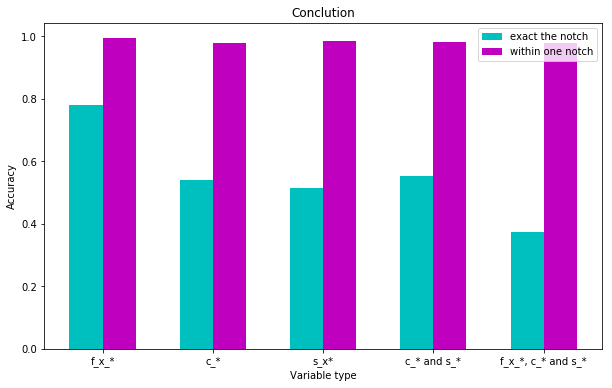

In [38]:
bar_width = 0.3 
plt.figure(figsize=(10,6))
index_exact_notch = np.arange(len(model_set))  
index_within_one_notch = index_exact_notch + bar_width  

plt.bar(index_exact_notch, height=con['exact_notch'], width=bar_width, color='c', label='exact the notch')
plt.bar(index_within_one_notch, height=con['within_one_notch'], width=bar_width, color='m', label='within one notch')

plt.legend()  
plt.xticks(index_exact_notch + bar_width/2, model_set)
plt.ylabel('Accuracy') 
plt.xlabel('Variable type')
plt.title('Conclution')  

plt.show()

The accuracies when error is within one notch can reach over 95% for all 5 models. While the accuracies for exact the notch vary a lot. Especially, the model using all three kinds of features has the worst outcome on exact the notch, which is counterintuitive. To conclude, the result is the best when using focal features only.

# 3. Prediction by sectors

## 3.1 Using f_x_* only

In [39]:
sector_list = data['sector'].drop_duplicates().tolist()
f_x_result = pd.DataFrame(columns=('sector', 'exact notch', 'within one notch'))
for sector in sector_list:
    # Select variables with missing values less than 10%
    data_sector = data[data.sector==sector]
    data_sector = data_sector[f_x_var_name]
    missing_value = pd.DataFrame((data_sector.isna().sum()/len(data_sector)), columns=['na percentage'])
    feature_select = missing_value[(1-missing_value['na percentage'])>=0.9]
    feature_select = np.array(feature_select.index)  
    # Fill in the missing values by using the averages.
    select_data = data_sector[feature_select].fillna(data_sector[feature_select].mean())
    # Split the selected dataset.
    x_train, x_test, y_train, y_test = train_test_split(select_data[feature_select],data.rgroup_code[data.sector==sector],test_size = 0.3)
    # Apply LightGBM algorithm.
    model = lgb.LGBMClassifier(learning_rate=0.1, max_depth=5)
    model.fit(x_train, y_train)
    predict = model.predict(x_test)
    y_test = pd.DataFrame({'actual':y_test, 'predicted':predict})
    y_test['exact'] = y_test['actual'] == y_test['predicted']
    y_test['within_one'] = abs(y_test['actual']-y_test['predicted']<=1)
    lightgbm_exact_notch=len(y_test[y_test.exact==True])/len(y_test)
    lightgbm_within_one_notch = len(y_test[y_test.within_one==True])/len(y_test)
    
    f_x_result = f_x_result.append(pd.DataFrame({'sector':[sector], 'exact notch':[lightgbm_exact_notch], 'within one notch':[lightgbm_within_one_notch]}))



In [40]:
f_x_result

,sector,exact notch,within one notch
0,Consumer Discretionary,0.781609,0.988506
0,Financials & Real Estate,0.974110,1.000000
0,Utilities,0.905956,1.000000
0,Materials,0.892453,0.994340
0,Communication,0.901163,0.985465
0,Healthcare,0.948905,1.000000
0,Technology,0.873563,0.997701
0,Industrials,0.868996,0.991266
0,Consumer Staples,0.965035,0.997669
0,Energy,0.902141,0.996942


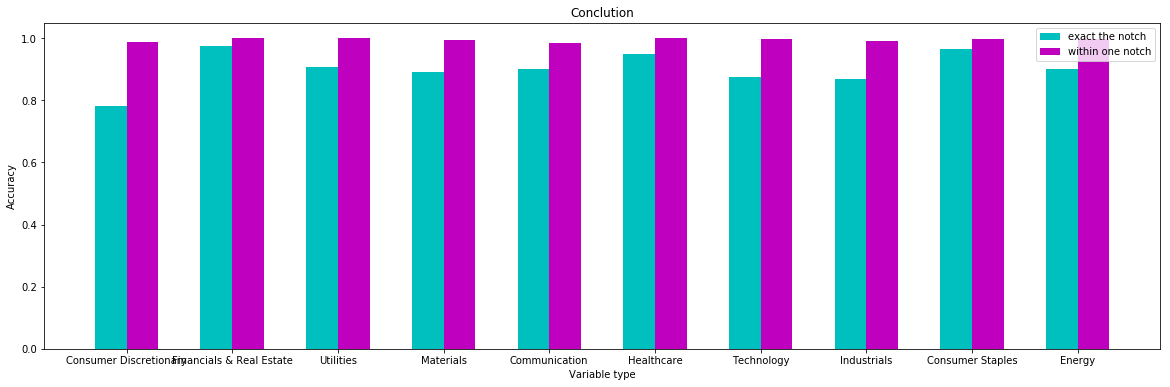

In [41]:
# Plot the result.
bar_width = 0.3 
plt.figure(figsize=(20,6))
index_exact_notch = np.arange(len(sector_list))  
index_within_one_notch = index_exact_notch + bar_width  

plt.bar(index_exact_notch, height=f_x_result['exact notch'], width=bar_width, color='c', label='exact the notch')
plt.bar(index_within_one_notch, height=f_x_result['within one notch'], width=bar_width, color='m', label='within one notch')

plt.legend()  
plt.xticks(index_exact_notch + bar_width/2, sector_list)
plt.ylabel('Accuracy') 
plt.xlabel('Variable type')
plt.title('Conclution')  

plt.show()

From the chart we can see that the model performs well for all sectors except for Consumer Discretion section. The accuracy for exact notch is 78% for Consumer sector, while in sectors the accuracies can reach 85% and higher.

## 3.2 Using c_x_* and cw_x_* only

In [42]:
c_x_result = pd.DataFrame(columns=('sector', 'exact notch', 'within one notch'))
for sector in sector_list:
    # Select variables with missing values less than 10%
    data_sector = data[data.sector==sector]
    data_sector = data_sector[c_x_var_name]
    missing_value = pd.DataFrame((data_sector.isna().sum()/len(data_sector)), columns=['na percentage'])
    feature_select = missing_value[(1-missing_value['na percentage'])>=0.9]
    feature_select = np.array(feature_select.index)  
    # Fill in the missing values by using the averages.
    select_data = data_sector[feature_select].fillna(data_sector[feature_select].mean())
    # Split the selected dataset.
    x_train, x_test, y_train, y_test = train_test_split(select_data[feature_select],data.rgroup_code[data.sector==sector],test_size = 0.3)
    # Apply LightGBM algorithm.
    model = lgb.LGBMClassifier(learning_rate=0.1, max_depth=5)
    model.fit(x_train, y_train)
    predict = model.predict(x_test)
    y_test = pd.DataFrame({'actual':y_test, 'predicted':predict})
    y_test['exact'] = y_test['actual'] == y_test['predicted']
    y_test['within_one'] = abs(y_test['actual']-y_test['predicted']<=1)
    lightgbm_exact_notch=len(y_test[y_test.exact==True])/len(y_test)
    lightgbm_within_one_notch = len(y_test[y_test.within_one==True])/len(y_test)
    
    c_x_result = c_x_result.append(pd.DataFrame({'sector':[sector], 'exact notch':[lightgbm_exact_notch], 'within one notch':[lightgbm_within_one_notch]}))



In [43]:
c_x_result

,sector,exact notch,within one notch
0,Consumer Discretionary,0.391850,0.882968
0,Financials & Real Estate,0.588997,1.000000
0,Utilities,0.573668,1.000000
0,Materials,0.426415,1.000000
0,Communication,0.421512,0.924419
0,Healthcare,0.360097,1.000000
0,Technology,0.427586,1.000000
0,Industrials,0.387191,1.000000
0,Consumer Staples,0.410256,1.000000
0,Energy,0.373089,1.000000


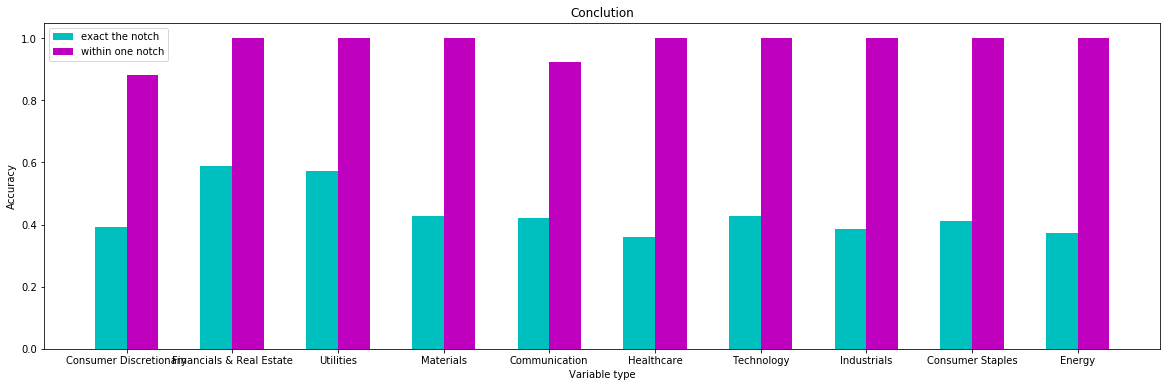

In [44]:
# Plot the result.
bar_width = 0.3 
plt.figure(figsize=(20,6))
index_exact_notch = np.arange(len(sector_list))  
index_within_one_notch = index_exact_notch + bar_width  

plt.bar(index_exact_notch, height=c_x_result['exact notch'], width=bar_width, color='c', label='exact the notch')
plt.bar(index_within_one_notch, height=c_x_result['within one notch'], width=bar_width, color='m', label='within one notch')

plt.legend()  
plt.xticks(index_exact_notch + bar_width/2, sector_list)
plt.ylabel('Accuracy') 
plt.xlabel('Variable type')
plt.title('Conclution')  

plt.show()

When using c_x_* and cw_x_* as variables the result is not as good as 3.1. The accuracies for within-one-notch can reach 100% except in Consumer Discretion and Communication sectors. The accuracies for exact the notch hardly reach 60%.

## 3.3 Using s_x_* and sw_x_* only

In [45]:
s_x_result = pd.DataFrame(columns=('sector', 'exact notch', 'within one notch'))
for sector in sector_list:
    # Select variables with missing values less than 10%
    data_sector = data[data.sector==sector]
    data_sector = data_sector[f_x_var_name]
    missing_value = pd.DataFrame((data_sector.isna().sum()/len(data_sector)), columns=['na percentage'])
    feature_select = missing_value[(1-missing_value['na percentage'])>=0.9]
    feature_select = np.array(feature_select.index)  
    # Fill in the missing values by using the averages.
    select_data = data_sector[feature_select].fillna(data_sector[feature_select].mean())
    # Split the selected dataset.
    x_train, x_test, y_train, y_test = train_test_split(select_data[feature_select],data.rgroup_code[data.sector==sector],test_size = 0.3)
    # Apply LightGBM algorithm.
    model = lgb.LGBMClassifier(learning_rate=0.1, max_depth=5)
    model.fit(x_train, y_train)
    predict = model.predict(x_test)
    y_test = pd.DataFrame({'actual':y_test, 'predicted':predict})
    y_test['exact'] = y_test['actual'] == y_test['predicted']
    y_test['within_one'] = abs(y_test['actual']-y_test['predicted']<=1)
    lightgbm_exact_notch=len(y_test[y_test.exact==True])/len(y_test)
    lightgbm_within_one_notch = len(y_test[y_test.within_one==True])/len(y_test)
    
    s_x_result = s_x_result.append(pd.DataFrame({'sector':[sector], 'exact notch':[lightgbm_exact_notch], 'within one notch':[lightgbm_within_one_notch]}))



In [46]:
s_x_result

,sector,exact notch,within one notch
0,Consumer Discretionary,0.768025,0.990596
0,Financials & Real Estate,0.977346,1.000000
0,Utilities,0.912226,1.000000
0,Materials,0.888679,0.998113
0,Communication,0.915698,0.991279
0,Healthcare,0.936740,1.000000
0,Technology,0.875862,0.997701
0,Industrials,0.858806,0.995633
0,Consumer Staples,0.937063,1.000000
0,Energy,0.944954,0.996942


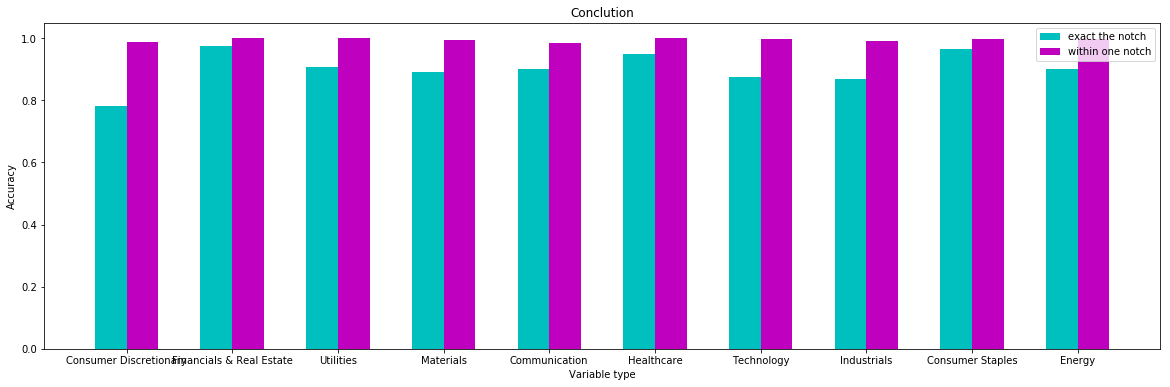

In [47]:
# Plot the result.
bar_width = 0.3 
plt.figure(figsize=(20,6))
index_exact_notch = np.arange(len(sector_list))  
index_within_one_notch = index_exact_notch + bar_width  

plt.bar(index_exact_notch, height=f_x_result['exact notch'], width=bar_width, color='c', label='exact the notch')
plt.bar(index_within_one_notch, height=f_x_result['within one notch'], width=bar_width, color='m', label='within one notch')

plt.legend()  
plt.xticks(index_exact_notch + bar_width/2, sector_list)
plt.ylabel('Accuracy') 
plt.xlabel('Variable type')
plt.title('Conclution')  

plt.show()

Except for the Consumer Discretion, Technology and Industrials sector, the results for other sectors are over 90% accuracy for the exact notch and nearly 100% accuracy for error within one notch.

## 3.4 Using c_x_, cw_x_ and s_x_, sw_x_

In [48]:
c_s_x_result = pd.DataFrame(columns=('sector', 'exact notch', 'within one notch'))
for sector in sector_list:
    # Select variables with missing values less than 10%
    data_sector = data[data.sector==sector]
    data_sector = data_sector[c_x_var_name].join(data_sector[s_x_var_name])
    missing_value = pd.DataFrame((data_sector.isna().sum()/len(data_sector)), columns=['na percentage'])
    feature_select = missing_value[(1-missing_value['na percentage'])>=0.9]
    feature_select = np.array(feature_select.index)  
    # Fill in the missing values by using the averages.
    select_data = data_sector[feature_select].fillna(data_sector[feature_select].mean())
    # Split the selected dataset.
    x_train, x_test, y_train, y_test = train_test_split(select_data[feature_select],data.rgroup_code[data.sector==sector],test_size = 0.3)
    # Apply LightGBM algorithm.
    model = lgb.LGBMClassifier(learning_rate=0.1, max_depth=5)
    model.fit(x_train, y_train)
    predict = model.predict(x_test)
    y_test = pd.DataFrame({'actual':y_test, 'predicted':predict})
    y_test['exact'] = y_test['actual'] == y_test['predicted']
    y_test['within_one'] = abs(y_test['actual']-y_test['predicted']<=1)
    lightgbm_exact_notch=len(y_test[y_test.exact==True])/len(y_test)
    lightgbm_within_one_notch = len(y_test[y_test.within_one==True])/len(y_test)
    
    c_s_x_result = c_s_x_result.append(pd.DataFrame({'sector':[sector], 'exact notch':[lightgbm_exact_notch], 'within one notch':[lightgbm_within_one_notch]}))



In [49]:
c_s_x_result

,sector,exact notch,within one notch
0,Consumer Discretionary,0.386625,0.887147
0,Financials & Real Estate,0.621359,1.000000
0,Utilities,0.755486,1.000000
0,Materials,0.439623,1.000000
0,Communication,0.438953,0.912791
0,Healthcare,0.401460,1.000000
0,Technology,0.457471,1.000000
0,Industrials,0.346434,1.000000
0,Consumer Staples,0.407925,1.000000
0,Energy,0.342508,1.000000


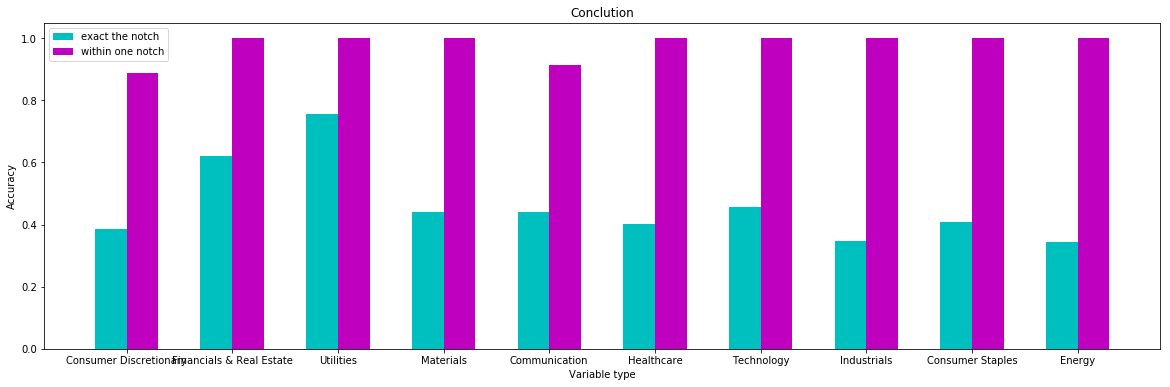

In [50]:
# Plot the result.
bar_width = 0.3 
plt.figure(figsize=(20,6))
index_exact_notch = np.arange(len(sector_list))  
index_within_one_notch = index_exact_notch + bar_width  

plt.bar(index_exact_notch, height=c_s_x_result['exact notch'], width=bar_width, color='c', label='exact the notch')
plt.bar(index_within_one_notch, height=c_s_x_result['within one notch'], width=bar_width, color='m', label='within one notch')

plt.legend()  
plt.xticks(index_exact_notch + bar_width/2, sector_list)
plt.ylabel('Accuracy') 
plt.xlabel('Variable type')
plt.title('Conclution')  

plt.show()

The accuracies for error within one notch in Consumer Discretionary and Communication sectors is not as good as the performances in other sectors. The accuracies for exact the notch is relatively low compared with previous models.

## 3.5 Using f_x_, c_x_, cw_x_, s_x_ and sw_x_*

In [51]:
f_c_s_x_result = pd.DataFrame(columns=('sector', 'exact notch', 'within one notch'))
for sector in sector_list:
    # Select variables with missing values less than 10%
    data_sector = data[data.sector==sector]
    data_sector = data_sector[c_x_var_name].join(data_sector[s_x_var_name]).join(data_sector[f_x_var_name])
    missing_value = pd.DataFrame((data_sector.isna().sum()/len(data_sector)), columns=['na percentage'])
    feature_select = missing_value[(1-missing_value['na percentage'])>=0.9]
    feature_select = np.array(feature_select.index)  
    # Fill in the missing values by using the averages.
    select_data = data_sector[feature_select].fillna(data_sector[feature_select].mean())
    # Split the selected dataset.
    x_train, x_test, y_train, y_test = train_test_split(select_data[feature_select],data.rgroup_code[data.sector==sector],test_size = 0.3)
    # Apply LightGBM algorithm.
    model = lgb.LGBMClassifier(learning_rate=0.1, max_depth=5)
    model.fit(x_train, y_train)
    predict = model.predict(x_test)
    y_test = pd.DataFrame({'actual':y_test, 'predicted':predict})
    y_test['exact'] = y_test['actual'] == y_test['predicted']
    y_test['within_one'] = abs(y_test['actual']-y_test['predicted']<=1)
    lightgbm_exact_notch=len(y_test[y_test.exact==True])/len(y_test)
    lightgbm_within_one_notch = len(y_test[y_test.within_one==True])/len(y_test)
    
    f_c_s_x_result = f_c_s_x_result.append(pd.DataFrame({'sector':[sector], 'exact notch':[lightgbm_exact_notch], 'within one notch':[lightgbm_within_one_notch]}))



In [52]:
f_c_s_x_result

,sector,exact notch,within one notch
0,Consumer Discretionary,0.777429,0.986416
0,Financials & Real Estate,0.964401,1.000000
0,Utilities,0.927900,1.000000
0,Materials,0.877358,0.998113
0,Communication,0.918605,0.988372
0,Healthcare,0.944039,1.000000
0,Technology,0.914943,1.000000
0,Industrials,0.863173,0.982533
0,Consumer Staples,0.948718,0.995338
0,Energy,0.917431,1.000000


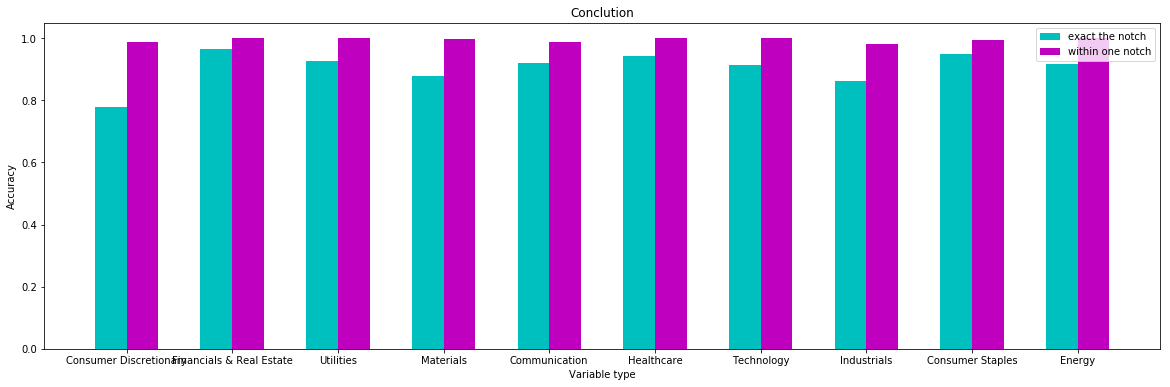

In [53]:
# Plot the result.
bar_width = 0.3 
plt.figure(figsize=(20,6))
index_exact_notch = np.arange(len(sector_list))  
index_within_one_notch = index_exact_notch + bar_width  

plt.bar(index_exact_notch, height=f_c_s_x_result['exact notch'], width=bar_width, color='c', label='exact the notch')
plt.bar(index_within_one_notch, height=f_c_s_x_result['within one notch'], width=bar_width, color='m', label='within one notch')

plt.legend()  
plt.xticks(index_exact_notch + bar_width/2, sector_list)
plt.ylabel('Accuracy') 
plt.xlabel('Variable type')
plt.title('Conclution')  

plt.show()

The accuracy in Consumer Discretion sector is the worst compared with other sectors. But the overall result is not bad.

## 3.6 Conclusion

### 3.6.1 Exact the notch

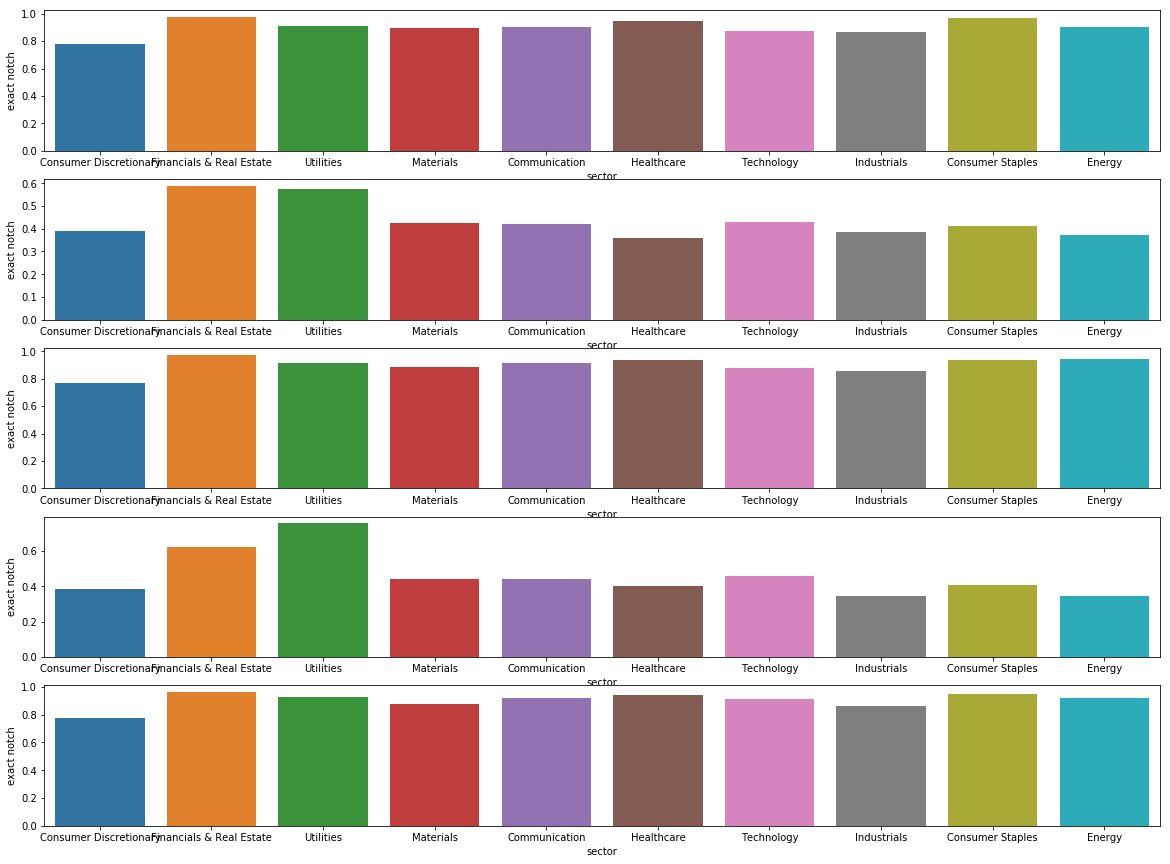

In [54]:
fig, axes = plt.subplots(5,1,figsize=(20,15))
sns.barplot(x='sector', y='exact notch', data=f_x_result, ax=axes[0])
sns.barplot(x='sector', y='exact notch', data=c_x_result, ax=axes[1])
sns.barplot(x='sector', y='exact notch', data=s_x_result, ax=axes[2])
sns.barplot(x='sector', y='exact notch', data=c_s_x_result, ax=axes[3])
sns.barplot(x='sector', y='exact notch', data=f_c_s_x_result, ax=axes[4])

From the plots we can see that when using f_x_* alone, using s_x_* and sw_x_* alone or using all three kinds of variables the models have the best performance. While the accuracies for industrials sector is relative lower than other sectors in every model.

### 3.6.2 Within one notch

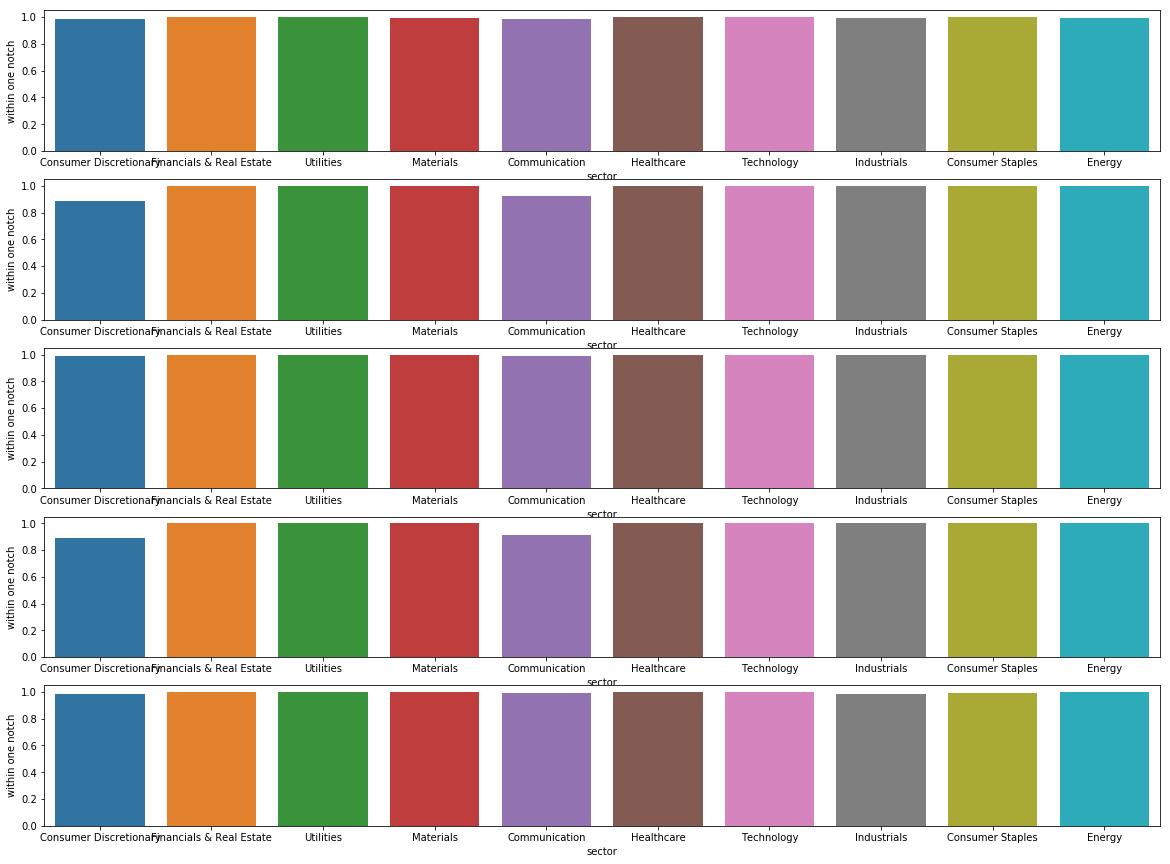

In [55]:
fig, axes = plt.subplots(5,1,figsize=(20,15))
sns.barplot(x='sector', y='within one notch', data=f_x_result, ax=axes[0])
sns.barplot(x='sector', y='within one notch', data=c_x_result, ax=axes[1])
sns.barplot(x='sector', y='within one notch', data=s_x_result, ax=axes[2])
sns.barplot(x='sector', y='within one notch', data=c_s_x_result, ax=axes[3])
sns.barplot(x='sector', y='within one notch', data=f_c_s_x_result, ax=axes[4])

Similar to the result of exact the notch, using f_x_* alone, using s_x_* and sw_x_* alone or using all three kinds of variables the models have the best performance. In these three models, the accuracies for each sector can reach 100% or near 100%. In the other tow models, consumer discretionary and communication sectors are the two sector that lag behind, but the accuracies can still reach over 80%.

We already have the accuracies for each sector, now we can use the weighted average value to present the accuracies for all sectors as a whole.

# 4. The weighted average value

In [56]:
# Find out the sample volume for each sector.
volume = pd.DataFrame(columns=['volume'],)
for sector in sector_list:
    volume = volume.append(pd.DataFrame({'volume':[len(data[data.sector==sector])]}))
volume

,volume
0,3188
0,1029
0,1061
0,1766
0,1145
0,1367
0,1447
0,2289
0,1430
0,1090


## 4.1 The weighted average value for the model using f_x_* only

In [57]:
# Calculate the weighted average value for the model using f_x_* only.
f_ave_data = pd.concat([f_x_result, volume], axis=1)
f_col_name = f_ave_data.columns.tolist()
f_col_name.insert(4, 'exact notch weighted value')
f_col_name.insert(5, 'within one notch weighted value')
f_ave_data = f_ave_data.reindex(columns=f_col_name)
f_ave_data['exact notch weighted value'] = f_ave_data.apply(
    lambda x: x['exact notch'] * x['volume'] / f_ave_data['volume'].sum(),
    axis=1)
f_ave_data['within one notch weighted value'] = f_ave_data.apply(
    lambda x: x['within one notch'] * x['volume'] / f_ave_data['volume'].sum(),
    axis=1)
f_ave_data

,sector,exact notch,within one notch,volume,exact notch weighted value,within one notch weighted value
0,Consumer Discretionary,0.781609,0.988506,3188,0.157587,0.199302
0,Financials & Real Estate,0.974110,1.000000,1029,0.063392,0.065077
0,Utilities,0.905956,1.000000,1061,0.060791,0.067101
0,Materials,0.892453,0.994340,1766,0.099676,0.111055
0,Communication,0.901163,0.985465,1145,0.065256,0.071361
0,Healthcare,0.948905,1.000000,1367,0.082036,0.086453
0,Technology,0.873563,0.997701,1447,0.079942,0.091302
0,Industrials,0.868996,0.991266,2289,0.125799,0.143499
0,Consumer Staples,0.965035,0.997669,1430,0.087275,0.090227
0,Energy,0.902141,0.996942,1090,0.062189,0.068724


In [58]:
print('The weighted average of exact the notch:',f_ave_data['exact notch weighted value'].sum())
print('The weighted average of within one notch:',f_ave_data['within one notch weighted value'].sum())

The weighted average of exact the notch: 0.8839435534293825
The weighted average of within one notch: 0.9941015231305147


## 4.2 The weighted average value for the model using c_x_*  and cw_x_* only

In [59]:
# Calculate the weighted average value for the model using f_x_* only.
c_ave_data = pd.concat([c_x_result, volume], axis=1)
c_col_name = c_ave_data.columns.tolist()
c_col_name.insert(4, 'exact notch weighted value')
c_col_name.insert(5, 'within one notch weighted value')
c_ave_data = c_ave_data.reindex(columns=c_col_name)
c_ave_data['exact notch weighted value'] = c_ave_data.apply(
    lambda x: x['exact notch'] * x['volume'] / c_ave_data['volume'].sum(),
    axis=1)
c_ave_data['within one notch weighted value'] = c_ave_data.apply(
    lambda x: x['within one notch'] * x['volume'] / c_ave_data['volume'].sum(),
    axis=1)
c_ave_data

,sector,exact notch,within one notch,volume,exact notch weighted value,within one notch weighted value
0,Consumer Discretionary,0.391850,0.882968,3188,0.079004,0.178023
0,Financials & Real Estate,0.588997,1.000000,1029,0.038330,0.065077
0,Utilities,0.573668,1.000000,1061,0.038494,0.067101
0,Materials,0.426415,1.000000,1766,0.047625,0.111687
0,Communication,0.421512,0.924419,1145,0.030523,0.066940
0,Healthcare,0.360097,1.000000,1367,0.031132,0.086453
0,Technology,0.427586,1.000000,1447,0.039130,0.091513
0,Industrials,0.387191,1.000000,2289,0.056051,0.144763
0,Consumer Staples,0.410256,1.000000,1430,0.037103,0.090438
0,Energy,0.373089,1.000000,1090,0.025719,0.068935


In [60]:
print('The weighted average of exact the notch:',c_ave_data['exact notch weighted value'].sum())
print('The weighted average of within one notch:',c_ave_data['within one notch weighted value'].sum())

The weighted average of exact the notch: 0.4231101932370725
The weighted average of within one notch: 0.9709309406639284


## 4.3 The weighted average value for the model using s_x_* and sw_x_* only

In [61]:
# Calculate the weighted average value for the model using f_x_* only.
s_ave_data = pd.concat([s_x_result, volume], axis=1)
s_col_name = s_ave_data.columns.tolist()
s_col_name.insert(4, 'exact notch weighted value')
s_col_name.insert(5, 'within one notch weighted value')
s_ave_data = s_ave_data.reindex(columns=s_col_name)
s_ave_data['exact notch weighted value'] = s_ave_data.apply(
    lambda x: x['exact notch'] * x['volume'] / s_ave_data['volume'].sum(),
    axis=1)
s_ave_data['within one notch weighted value'] = s_ave_data.apply(
    lambda x: x['within one notch'] * x['volume'] / s_ave_data['volume'].sum(),
    axis=1)
s_ave_data

,sector,exact notch,within one notch,volume,exact notch weighted value,within one notch weighted value
0,Consumer Discretionary,0.768025,0.990596,3188,0.154848,0.199723
0,Financials & Real Estate,0.977346,1.000000,1029,0.063603,0.065077
0,Utilities,0.912226,1.000000,1061,0.061211,0.067101
0,Materials,0.888679,0.998113,1766,0.099254,0.111477
0,Communication,0.915698,0.991279,1145,0.066309,0.071782
0,Healthcare,0.936740,1.000000,1367,0.080984,0.086453
0,Technology,0.875862,0.997701,1447,0.080153,0.091302
0,Industrials,0.858806,0.995633,2289,0.124324,0.144131
0,Consumer Staples,0.937063,1.000000,1430,0.084746,0.090438
0,Energy,0.944954,0.996942,1090,0.065140,0.068724


In [62]:
print('The weighted average of exact the notch:',s_ave_data['exact notch weighted value'].sum())
print('The weighted average of within one notch:',s_ave_data['within one notch weighted value'].sum())

The weighted average of exact the notch: 0.8805723195279089
The weighted average of within one notch: 0.9962083142478331


## 4.4 The weighted average value for the model using c_x_*, cw_x_*  and s_x_*, sw_x_* 

In [63]:
# Calculate the weighted average value for the model using f_x_* only.
c_s_ave_data = pd.concat([c_s_x_result, volume], axis=1)
c_s_col_name = c_s_ave_data.columns.tolist()
c_s_col_name.insert(4, 'exact notch weighted value')
c_s_col_name.insert(5, 'within one notch weighted value')
c_s_ave_data = c_s_ave_data.reindex(columns=c_s_col_name)
c_s_ave_data['exact notch weighted value'] = c_s_ave_data.apply(
    lambda x: x['exact notch'] * x['volume'] / c_s_ave_data['volume'].sum(),
    axis=1)
c_s_ave_data['within one notch weighted value'] = c_s_ave_data.apply(
    lambda x: x['within one notch'] * x['volume'] / c_s_ave_data['volume'].sum(),
    axis=1)
c_s_ave_data

,sector,exact notch,within one notch,volume,exact notch weighted value,within one notch weighted value
0,Consumer Discretionary,0.386625,0.887147,3188,0.077951,0.178866
0,Financials & Real Estate,0.621359,1.000000,1029,0.040436,0.065077
0,Utilities,0.755486,1.000000,1061,0.050694,0.067101
0,Materials,0.439623,1.000000,1766,0.049100,0.111687
0,Communication,0.438953,0.912791,1145,0.031786,0.066098
0,Healthcare,0.401460,1.000000,1367,0.034708,0.086453
0,Technology,0.457471,1.000000,1447,0.041864,0.091513
0,Industrials,0.346434,1.000000,2289,0.050151,0.144763
0,Consumer Staples,0.407925,1.000000,1430,0.036892,0.090438
0,Energy,0.342508,1.000000,1090,0.023611,0.068935


In [64]:
print('The weighted average of exact the notch:',c_s_ave_data['exact notch weighted value'].sum())
print('The weighted average of within one notch:',c_s_ave_data['within one notch weighted value'].sum())

The weighted average of exact the notch: 0.4371929352761512
The weighted average of within one notch: 0.970931637627521


## 4.5 The weighted average value for the model using f_x_*and c_x_*  cw_x_* and s_x_*, sw_x_*

In [65]:
# Calculate the weighted average value for the model using f_x_* only.
f_c_s_ave_data = pd.concat([f_c_s_x_result, volume], axis=1)
f_c_s_col_name = f_c_s_ave_data.columns.tolist()
f_c_s_col_name.insert(4, 'exact notch weighted value')
f_c_s_col_name.insert(5, 'within one notch weighted value')
f_c_s_ave_data = f_c_s_ave_data.reindex(columns=f_c_s_col_name)
f_c_s_ave_data['exact notch weighted value'] = f_c_s_ave_data.apply(
    lambda x: x['exact notch'] * x['volume'] / f_c_s_ave_data['volume'].sum(),
    axis=1)
f_c_s_ave_data['within one notch weighted value'] = f_c_s_ave_data.apply(
    lambda x: x['within one notch'] * x['volume'] / f_c_s_ave_data['volume'].sum(),
    axis=1)
f_c_s_ave_data

,sector,exact notch,within one notch,volume,exact notch weighted value,within one notch weighted value
0,Consumer Discretionary,0.777429,0.986416,3188,0.156745,0.198880
0,Financials & Real Estate,0.964401,1.000000,1029,0.062760,0.065077
0,Utilities,0.927900,1.000000,1061,0.062263,0.067101
0,Materials,0.877358,0.998113,1766,0.097990,0.111477
0,Communication,0.918605,0.988372,1145,0.066519,0.071571
0,Healthcare,0.944039,1.000000,1367,0.081615,0.086453
0,Technology,0.914943,1.000000,1447,0.083729,0.091513
0,Industrials,0.863173,0.982533,2289,0.124956,0.142235
0,Consumer Staples,0.948718,0.995338,1430,0.085800,0.090016
0,Energy,0.917431,1.000000,1090,0.063243,0.068935


In [66]:
print('The weighted average of exact the notch:',f_c_s_ave_data['exact notch weighted value'].sum())
print('The weighted average of within one notch:',f_c_s_ave_data['within one notch weighted value'].sum())

The weighted average of exact the notch: 0.8856201793679308
The weighted average of within one notch: 0.9932581967191313


## 4.6 Conclusion

### 4.6.1 Conclusion of models using the weighted averages

In [67]:
exact_notch_weighted_ave = pd.DataFrame([
    f_ave_data['exact notch weighted value'].sum(), c_ave_data['exact notch weighted value'].sum(), s_ave_data['exact notch weighted value'].sum(),
    c_s_ave_data['exact notch weighted value'].sum(), f_c_s_ave_data['exact notch weighted value'].sum()],index=model_set,columns=['The weighted average of exact the notch'])
within_one_notch_weighted_ave = pd.DataFrame([
    f_ave_data['within one notch weighted value'].sum(), c_ave_data['within one notch weighted value'].sum(), s_ave_data['within one notch weighted value'].sum(), 
    c_s_ave_data['within one notch weighted value'].sum(), f_c_s_ave_data['within one notch weighted value'].sum()],index=model_set, columns=['The weighted average of within one notch'])
con_weighted_ave = exact_notch_weighted_ave.join(within_one_notch_weighted_ave['The weighted average of within one notch'])
con_weighted_ave

,The weighted average of exact the notch,The weighted average of within one notch
f_x_*,0.883944,0.994102
c_*,0.423110,0.970931
s_x*,0.880572,0.996208
c_* and s_*,0.437193,0.970932
"f_x_*, c_* and s_*",0.885620,0.993258


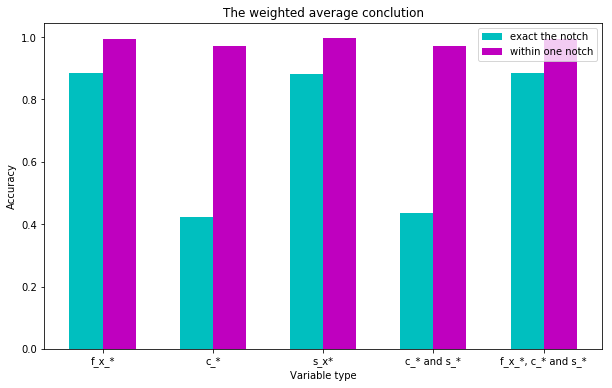

In [68]:
bar_width = 0.3 
plt.figure(figsize=(10,6))
index_exact_notch_ave = np.arange(len(model_set))  
index_within_one_notch_ave = index_exact_notch_ave + bar_width  

plt.bar(index_exact_notch_ave, height=con_weighted_ave['The weighted average of exact the notch'], width=bar_width, color='c', label='exact the notch')
plt.bar(index_within_one_notch_ave, height=con_weighted_ave['The weighted average of within one notch'], width=bar_width, color='m', label='within one notch')

plt.legend() 
plt.xticks(index_exact_notch_ave + bar_width/2, model_set)
plt.ylabel('Accuracy') 
plt.xlabel('Variable type')
plt.title('The weighted average conclution')  

plt.show()

From the plot we can see that the models that use f_x_* only or s_x_* or all three kinds of variables perform best with the accuracies higher than 85%.

### 4.6.2 Compare the models using the weighted averages with the results in 2.6

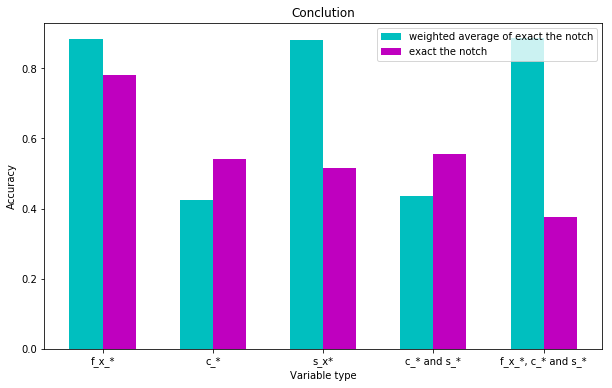

In [69]:
# Plot the accuracies of exact the notch in 4.6.1 and 2.6.
bar_width = 0.3 
plt.figure(figsize=(10,6))
index_exact_notch_com = np.arange(len(model_set))  
index_exact_notch_con = index_exact_notch_com + bar_width  

plt.bar(index_exact_notch_com, height=con_weighted_ave['The weighted average of exact the notch'], width=bar_width, color='c', label='weighted average of exact the notch')
plt.bar(index_exact_notch_con, height=con['exact_notch'], width=bar_width, color='m', label='exact the notch')

plt.legend() 
plt.xticks(index_exact_notch_com + bar_width/2, model_set)
plt.ylabel('Accuracy') 
plt.xlabel('Variable type')
plt.title('Conclution')  

plt.show()

From the plot we can see that by using the weighted averages of the sectors can greatly improve the prediction accuracies of the model using s_x_* and sw_x_* only and the model using all three kinds of variables.

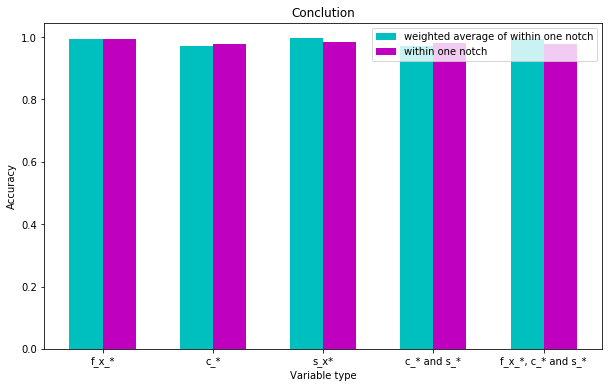

In [70]:
# Plot the accuracies of the errors within one notch in 4.6.1 and 2.6.
bar_width = 0.3 
plt.figure(figsize=(10,6))
index_exact_notch_com = np.arange(len(model_set))  
index_exact_notch_con = index_exact_notch_com + bar_width  

plt.bar(index_exact_notch_com, height=con_weighted_ave['The weighted average of within one notch'], width=bar_width, color='c', label='weighted average of within one notch')
plt.bar(index_exact_notch_con, height=con['within_one_notch'], width=bar_width, color='m', label='within one notch')

plt.legend() 
plt.xticks(index_exact_notch_com + bar_width/2, model_set)
plt.ylabel('Accuracy') 
plt.xlabel('Variable type')
plt.title('Conclution')  

plt.show()

We can see that there are not many differences between the two method, since the prediction accuracies for the error within one notch are already high enough.

To conclude, since by using the weighted average value we consider the characteristics of different sectors, also the result of using weighted average is not bad or even better, I think this method will be practical useful.

# 4. Explore the relationship between the prediction accuracy and the number of customer, the number of supplier and both

## 4.1 The relationship between the prediction accuracy and the number of customer

In [71]:
n_customer = pd.DataFrame(pd.value_counts(data['n_customer']))
print(n_customer.sort_index(axis=0))
n_customer.sum()

    n_customer
0         3692
1         5666
2         1666
3         1057
4          782
5          546
6          425
7          326
8          246
9          202
10         169
11         171
12         117
13          60
14          50
15          75
16          58
17          75
18          33
19          52
20          29
21          35
22          32
23          33
24          40
25          31
26          21
27          16
28          19
29          11
30           7
31          13
32          11
33           3
34           3
35           8
36           7
37           5
39           1
42           2
44           5
45           3
46           3
47           1
50           1
51           1
53           2
57           1


n_customer    15812
dtype: int64

In order to find out the relationship between the prediction accuracy and the number of customer, we decide to divide the n_customer into 4 groups. 
group 1: n_customer=0
group 2: n_customer=1
group 3: n_customer=2,3,4
group 3: n_customer=other
Then calculate the weighted average of each group and explore the relationship between n_customer and accuracies.

### 4.1.1 The accuracy of group 1

In [72]:
# The accuracy of each sector.
group_1 = data[data['n_customer']==0]
group_1_result = pd.DataFrame(columns=('sector', 'exact notch', 'within one notch'))
for sector in sector_list:
    # Select variables with missing values less than 10%
    data_sector = group_1[group_1.sector==sector]
    data_sector = data_sector[c_x_var_name].join(data_sector[s_x_var_name]).join(data_sector[f_x_var_name])
    missing_value = pd.DataFrame((data_sector.isna().sum()/len(data_sector)), columns=['na percentage'])
    feature_select = missing_value[(1-missing_value['na percentage'])>=0.9]
    feature_select = np.array(feature_select.index)  
    # Fill in the missing values by using the averages.
    select_data = data_sector[feature_select].fillna(data_sector[feature_select].mean())
    # Split the selected dataset.
    x_train, x_test, y_train, y_test = train_test_split(select_data[feature_select],group_1.rgroup_code[group_1.sector==sector],test_size = 0.3)
    # Apply LightGBM algorithm.
    model = lgb.LGBMClassifier(learning_rate=0.1, max_depth=5)
    model.fit(x_train, y_train)
    predict = model.predict(x_test)
    y_test = pd.DataFrame({'actual':y_test, 'predicted':predict})
    y_test['exact'] = y_test['actual'] == y_test['predicted']
    y_test['within_one'] = abs(y_test['actual']-y_test['predicted']<=1)
    lightgbm_exact_notch=len(y_test[y_test.exact==True])/len(y_test)
    lightgbm_within_one_notch = len(y_test[y_test.within_one==True])/len(y_test)
    
    group_1_result = group_1_result.append(pd.DataFrame({'sector':[sector], 'exact notch':[lightgbm_exact_notch], 'within one notch':[lightgbm_within_one_notch]}))
group_1_result

,sector,exact notch,within one notch
0,Consumer Discretionary,0.826613,0.975806
0,Financials & Real Estate,0.943662,1.000000
0,Utilities,0.827586,1.000000
0,Materials,0.918919,0.990991
0,Communication,0.854545,1.000000
0,Healthcare,0.923611,1.000000
0,Technology,0.849315,0.986301
0,Industrials,0.822917,1.000000
0,Consumer Staples,0.969072,1.000000
0,Energy,0.877863,1.000000


In [73]:
# Find out the sample volume for each sector in group 1.
group_1_volume = pd.DataFrame(columns=['volume'],)
for sector in sector_list:
    group_1_volume = group_1_volume.append(pd.DataFrame({'volume':[len(group_1[group_1.sector==sector])]}))

# Calculate the weighted average accuracy of group 1.
group_1_ave_data = pd.concat([group_1_result, group_1_volume], axis=1)
group_1_col_name = group_1_ave_data.columns.tolist()
group_1_col_name.insert(4, 'exact notch weighted value')
group_1_col_name.insert(5, 'within one notch weighted value')
group_1_ave_data = group_1_ave_data.reindex(columns=group_1_col_name)
group_1_ave_data['exact notch weighted value'] = group_1_ave_data.apply(
    lambda x: x['exact notch'] * x['volume'] / group_1_ave_data['volume'].sum(),
    axis=1)
group_1_ave_data['within one notch weighted value'] = group_1_ave_data.apply(
    lambda x: x['within one notch'] * x['volume'] / group_1_ave_data['volume'].sum(),
    axis=1)
group_1_ave_data

,sector,exact notch,within one notch,volume,exact notch weighted value,within one notch weighted value
0,Consumer Discretionary,0.826613,0.975806,826,0.184936,0.218314
0,Financials & Real Estate,0.943662,1.000000,234,0.059810,0.063380
0,Utilities,0.827586,1.000000,288,0.064557,0.078007
0,Materials,0.918919,0.990991,368,0.091593,0.098777
0,Communication,0.854545,1.000000,183,0.042357,0.049567
0,Healthcare,0.923611,1.000000,477,0.119329,0.129198
0,Technology,0.849315,0.986301,243,0.055900,0.064916
0,Industrials,0.822917,1.000000,317,0.070657,0.085861
0,Consumer Staples,0.969072,1.000000,321,0.084256,0.086945
0,Energy,0.877863,1.000000,435,0.103432,0.117822


In [74]:
print('The weighted average of exact the notch:',group_1_ave_data['exact notch weighted value'].sum())
print('The weighted average of within one notch:',group_1_ave_data['within one notch weighted value'].sum())

The weighted average of exact the notch: 0.8768258413695585
The weighted average of within one notch: 0.9927876615909141


### 4.1.2 The accuracy of group 2

In [75]:
# The accuracy of each sector.
group_2 = data[data['n_customer']==1]
group_2_result = pd.DataFrame(columns=('sector', 'exact notch', 'within one notch'))
for sector in sector_list:
    # Select variables with missing values less than 10%
    data_sector = group_2[group_2.sector==sector]
    data_sector = data_sector[c_x_var_name].join(data_sector[s_x_var_name]).join(data_sector[f_x_var_name])
    missing_value = pd.DataFrame((data_sector.isna().sum()/len(data_sector)), columns=['na percentage'])
    feature_select = missing_value[(1-missing_value['na percentage'])>=0.9]
    feature_select = np.array(feature_select.index)  
    # Fill in the missing values by using the averages.
    select_data = data_sector[feature_select].fillna(data_sector[feature_select].mean())
    # Split the selected dataset.
    x_train, x_test, y_train, y_test = train_test_split(select_data[feature_select],group_2.rgroup_code[group_2.sector==sector],test_size = 0.3)
    # Apply LightGBM algorithm.
    model = lgb.LGBMClassifier(learning_rate=0.1, max_depth=5)
    model.fit(x_train, y_train)
    predict = model.predict(x_test)
    y_test = pd.DataFrame({'actual':y_test, 'predicted':predict})
    y_test['exact'] = y_test['actual'] == y_test['predicted']
    y_test['within_one'] = abs(y_test['actual']-y_test['predicted']<=1)
    lightgbm_exact_notch=len(y_test[y_test.exact==True])/len(y_test)
    lightgbm_within_one_notch = len(y_test[y_test.within_one==True])/len(y_test)
    
    group_2_result = group_2_result.append(pd.DataFrame({'sector':[sector], 'exact notch':[lightgbm_exact_notch], 'within one notch':[lightgbm_within_one_notch]}))
group_2_result

,sector,exact notch,within one notch
0,Consumer Discretionary,0.840000,0.992941
0,Financials & Real Estate,0.899408,0.988166
0,Utilities,0.878261,1.000000
0,Materials,0.906977,1.000000
0,Communication,0.890511,1.000000
0,Healthcare,0.918699,1.000000
0,Technology,0.857143,1.000000
0,Industrials,0.854054,0.994595
0,Consumer Staples,0.972527,1.000000
0,Energy,0.946429,0.991071


In [76]:
# Find out the sample volume for each sector in group 2.
group_2_volume = pd.DataFrame(columns=['volume'],)
for sector in sector_list:
    group_2_volume = group_2_volume.append(pd.DataFrame({'volume':[len(group_2[group_2.sector==sector])]}))

# Calculate the weighted average accuracy of group 2.
group_2_ave_data = pd.concat([group_2_result, group_2_volume], axis=1)
group_2_col_name = group_2_ave_data.columns.tolist()
group_2_col_name.insert(4, 'exact notch weighted value')
group_2_col_name.insert(5, 'within one notch weighted value')
group_2_ave_data = group_2_ave_data.reindex(columns=group_2_col_name)
group_2_ave_data['exact notch weighted value'] = group_2_ave_data.apply(
    lambda x: x['exact notch'] * x['volume'] / group_2_ave_data['volume'].sum(),
    axis=1)
group_2_ave_data['within one notch weighted value'] = group_2_ave_data.apply(
    lambda x: x['within one notch'] * x['volume'] / group_2_ave_data['volume'].sum(),
    axis=1)
group_2_ave_data

,sector,exact notch,within one notch,volume,exact notch weighted value,within one notch weighted value
0,Consumer Discretionary,0.840000,0.992941,1414,0.209629,0.247797
0,Financials & Real Estate,0.899408,0.988166,562,0.089211,0.098014
0,Utilities,0.878261,1.000000,382,0.059212,0.067420
0,Materials,0.906977,1.000000,572,0.091562,0.100953
0,Communication,0.890511,1.000000,456,0.071668,0.080480
0,Healthcare,0.918699,1.000000,410,0.066478,0.072361
0,Technology,0.857143,1.000000,277,0.041904,0.048888
0,Industrials,0.854054,0.994595,615,0.092701,0.107955
0,Consumer Staples,0.972527,1.000000,606,0.104015,0.106954
0,Energy,0.946429,0.991071,372,0.062138,0.065069


In [77]:
print('The weighted average of exact the notch:',group_2_ave_data['exact notch weighted value'].sum())
print('The weighted average of within one notch:',group_2_ave_data['within one notch weighted value'].sum())

The weighted average of exact the notch: 0.8885189474818074
The weighted average of within one notch: 0.9958916666183718


### 4.1.3 The accuracy of group 3

In [78]:
# The accuracy of each sector.
group_3 = data[data['n_customer']==2].append(data[data['n_customer']==3]).append(data[data['n_customer']==4])
group_3_result = pd.DataFrame(columns=('sector', 'exact notch', 'within one notch'))
for sector in sector_list:
    # Select variables with missing values less than 10%
    data_sector = group_3[group_3.sector==sector]
    data_sector = data_sector[c_x_var_name].join(data_sector[s_x_var_name]).join(data_sector[f_x_var_name])
    missing_value = pd.DataFrame((data_sector.isna().sum()/len(data_sector)), columns=['na percentage'])
    feature_select = missing_value[(1-missing_value['na percentage'])>=0.9]
    feature_select = np.array(feature_select.index)  
    # Fill in the missing values by using the averages.
    select_data = data_sector[feature_select].fillna(data_sector[feature_select].mean())
    # Split the selected dataset.
    x_train, x_test, y_train, y_test = train_test_split(select_data[feature_select],group_3.rgroup_code[group_3.sector==sector],test_size = 0.3)
    # Apply LightGBM algorithm.
    model = lgb.LGBMClassifier(learning_rate=0.1, max_depth=5)
    model.fit(x_train, y_train)
    predict = model.predict(x_test)
    y_test = pd.DataFrame({'actual':y_test, 'predicted':predict})
    y_test['exact'] = y_test['actual'] == y_test['predicted']
    y_test['within_one'] = abs(y_test['actual']-y_test['predicted']<=1)
    lightgbm_exact_notch=len(y_test[y_test.exact==True])/len(y_test)
    lightgbm_within_one_notch = len(y_test[y_test.within_one==True])/len(y_test)
    
    group_3_result = group_3_result.append(pd.DataFrame({'sector':[sector], 'exact notch':[lightgbm_exact_notch], 'within one notch':[lightgbm_within_one_notch]}))
group_3_result

,sector,exact notch,within one notch
0,Consumer Discretionary,0.833333,0.980769
0,Financials & Real Estate,1.000000,1.000000
0,Utilities,0.907895,1.000000
0,Materials,0.970370,1.000000
0,Communication,0.857143,0.987013
0,Healthcare,0.979167,1.000000
0,Technology,0.905172,1.000000
0,Industrials,0.899441,0.988827
0,Consumer Staples,0.962617,1.000000
0,Energy,0.955224,1.000000


In [79]:
# Find out the sample volume for each sector in group 3.
group_3_volume = pd.DataFrame(columns=['volume'],)
for sector in sector_list:
    group_3_volume = group_3_volume.append(pd.DataFrame({'volume':[len(group_3[group_3.sector==sector])]}))

# Calculate the weighted average accuracy of group 3.
group_3_ave_data = pd.concat([group_3_result, group_3_volume], axis=1)
group_3_col_name = group_3_ave_data.columns.tolist()
group_3_col_name.insert(4, 'exact notch weighted value')
group_3_col_name.insert(5, 'within one notch weighted value')
group_3_ave_data = group_3_ave_data.reindex(columns=group_3_col_name)
group_3_ave_data['exact notch weighted value'] = group_3_ave_data.apply(
    lambda x: x['exact notch'] * x['volume'] / group_3_ave_data['volume'].sum(),
    axis=1)
group_3_ave_data['within one notch weighted value'] = group_3_ave_data.apply(
    lambda x: x['within one notch'] * x['volume'] / group_3_ave_data['volume'].sum(),
    axis=1)
group_3_ave_data

,sector,exact notch,within one notch,volume,exact notch weighted value,within one notch weighted value
0,Consumer Discretionary,0.833333,0.980769,517,0.122920,0.144667
0,Financials & Real Estate,1.000000,1.000000,160,0.045649,0.045649
0,Utilities,0.907895,1.000000,251,0.065016,0.071612
0,Materials,0.970370,1.000000,448,0.124030,0.127817
0,Communication,0.857143,0.987013,255,0.062360,0.071808
0,Healthcare,0.979167,1.000000,317,0.088558,0.090442
0,Technology,0.905172,1.000000,385,0.099427,0.109843
0,Industrials,0.899441,0.988827,596,0.152944,0.168143
0,Consumer Staples,0.962617,1.000000,354,0.097223,0.100999
0,Energy,0.955224,1.000000,222,0.060502,0.063338


In [80]:
print('The weighted average of exact the notch:',group_3_ave_data['exact notch weighted value'].sum())
print('The weighted average of within one notch:',group_3_ave_data['within one notch weighted value'].sum())

The weighted average of exact the notch: 0.9186284094609427
The weighted average of within one notch: 0.9943186265674491


### 4.1.4 The accuracy of group 4

In [81]:
# The accuracy of each sector.
group_4 = data[data['n_customer']>4]
group_4_result = pd.DataFrame(columns=('sector', 'exact notch', 'within one notch'))
for sector in sector_list:
    # Select variables with missing values less than 10%
    data_sector = group_4[group_4.sector==sector]
    data_sector = data_sector[c_x_var_name].join(data_sector[s_x_var_name]).join(data_sector[f_x_var_name])
    missing_value = pd.DataFrame((data_sector.isna().sum()/len(data_sector)), columns=['na percentage'])
    feature_select = missing_value[(1-missing_value['na percentage'])>=0.9]
    feature_select = np.array(feature_select.index)  
    # Fill in the missing values by using the averages.
    select_data = data_sector[feature_select].fillna(data_sector[feature_select].mean())
    # Split the selected dataset.
    x_train, x_test, y_train, y_test = train_test_split(select_data[feature_select],group_4.rgroup_code[group_4.sector==sector],test_size = 0.3)
    # Apply LightGBM algorithm.
    model = lgb.LGBMClassifier(learning_rate=0.1, max_depth=5)
    model.fit(x_train, y_train)
    predict = model.predict(x_test)
    y_test = pd.DataFrame({'actual':y_test, 'predicted':predict})
    y_test['exact'] = y_test['actual'] == y_test['predicted']
    y_test['within_one'] = abs(y_test['actual']-y_test['predicted']<=1)
    lightgbm_exact_notch=len(y_test[y_test.exact==True])/len(y_test)
    lightgbm_within_one_notch = len(y_test[y_test.within_one==True])/len(y_test)
    
    group_4_result = group_4_result.append(pd.DataFrame({'sector':[sector], 'exact notch':[lightgbm_exact_notch], 'within one notch':[lightgbm_within_one_notch]}))
group_4_result

,sector,exact notch,within one notch
0,Consumer Discretionary,0.953846,1.000000
0,Financials & Real Estate,0.954545,1.000000
0,Utilities,0.714286,1.000000
0,Materials,0.947368,0.991228
0,Communication,0.947368,1.000000
0,Healthcare,1.000000,1.000000
0,Technology,0.920245,0.993865
0,Industrials,0.930131,1.000000
0,Consumer Staples,0.977778,1.000000
0,Energy,0.894737,1.000000


In [82]:
# Find out the sample volume for each sector in group 4.
group_4_volume = pd.DataFrame(columns=['volume'],)
for sector in sector_list:
    group_4_volume = group_4_volume.append(pd.DataFrame({'volume':[len(group_4[group_4.sector==sector])]}))

# Calculate the weighted average accuracy of group 4.
group_4_ave_data = pd.concat([group_4_result, group_4_volume], axis=1)
group_4_col_name = group_4_ave_data.columns.tolist()
group_4_col_name.insert(4, 'exact notch weighted value')
group_4_col_name.insert(5, 'within one notch weighted value')
group_4_ave_data = group_4_ave_data.reindex(columns=group_4_col_name)
group_4_ave_data['exact notch weighted value'] = group_4_ave_data.apply(
    lambda x: x['exact notch'] * x['volume'] / group_4_ave_data['volume'].sum(),
    axis=1)
group_4_ave_data['within one notch weighted value'] = group_4_ave_data.apply(
    lambda x: x['within one notch'] * x['volume'] / group_4_ave_data['volume'].sum(),
    axis=1)
group_4_ave_data

,sector,exact notch,within one notch,volume,exact notch weighted value,within one notch weighted value
0,Consumer Discretionary,0.953846,1.000000,431,0.139406,0.146151
0,Financials & Real Estate,0.954545,1.000000,73,0.023629,0.024754
0,Utilities,0.714286,1.000000,140,0.033910,0.047474
0,Materials,0.947368,0.991228,378,0.121433,0.127055
0,Communication,0.947368,1.000000,251,0.080634,0.085114
0,Healthcare,1.000000,1.000000,163,0.055273,0.055273
0,Technology,0.920245,0.993865,542,0.169133,0.182664
0,Industrials,0.930131,1.000000,761,0.240024,0.258054
0,Consumer Staples,0.977778,1.000000,149,0.049403,0.050526
0,Energy,0.894737,1.000000,61,0.018508,0.020685


In [83]:
print('The weighted average of exact the notch:',group_4_ave_data['exact notch weighted value'].sum())
print('The weighted average of within one notch:',group_4_ave_data['within one notch weighted value'].sum())

The weighted average of exact the notch: 0.9313512322980804
The weighted average of within one notch: 0.9977480695666607


### 4.1.4 Conclusion

In [84]:
exact_notch_n_customer = pd.DataFrame(
    [
        group_1_ave_data['exact notch weighted value'].sum(),
        group_2_ave_data['exact notch weighted value'].sum(),
        group_3_ave_data['exact notch weighted value'].sum(),
        group_4_ave_data['exact notch weighted value'].sum()
    ],
    index=['group 1', 'group 2', 'group 3', 'group 4'],
    columns=['The weighted average of exact the notch'])
within_one_notch_n_customer = pd.DataFrame(
    [
        group_1_ave_data['within one notch weighted value'].sum(),
        group_2_ave_data['within one notch weighted value'].sum(),
        group_3_ave_data['within one notch weighted value'].sum(),
        group_4_ave_data['within one notch weighted value'].sum()
    ],
    index=['group 1', 'group 2', 'group 3', 'group 4'],
    columns=['The weighted average of within one notch'])
con_n_customer = exact_notch_n_customer.join(
    within_one_notch_n_customer['The weighted average of within one notch'])
con_n_customer

,The weighted average of exact the notch,The weighted average of within one notch
group 1,0.876826,0.992788
group 2,0.888519,0.995892
group 3,0.918628,0.994319
group 4,0.931351,0.997748


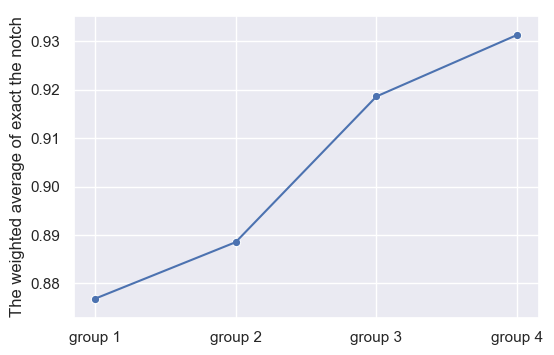

In [85]:
fig = plt.figure(dpi=100)
plt.rc('font', family='STFangsong')
sns.set(style="darkgrid")
sns.scatterplot(x=['group 1', 'group 2', 'group 3', 'group 4'],
                y="The weighted average of exact the notch",
                data=con_n_customer)
sns.lineplot(x=['group 1', 'group 2', 'group 3', 'group 4'],
             y="The weighted average of exact the notch",
             data=con_n_customer)

From the plot we can see that the accuracies increase as number of customer increases. Although the the performance of the model in each group is good with accuracies achieve 87% or higher, in order to have a relative better prediction result we should use the samples with bigger n_customer.

## 4.2 The relationship between the prediction accuracy and the number of supplier

In [86]:
n_supplier = pd.DataFrame(pd.value_counts(data['n_supplier']))
print(n_supplier.sort_index(axis=0))
n_supplier.sum()

    n_supplier
0         4144
1         4591
2         1860
3         1342
4          929
5          611
6          450
7          309
8          245
9          182
10         147
11         121
12         106
13          93
14          66
15          60
16          60
17          49
18          39
19          35
20          33
21          40
22          27
23          16
24          35
25          23
26          22
27          22
28          21
29          16
30          19
31          16
32          13
33          21
34          11
35           8
36           5
37           6
38           7
39           3
40           3
41           2
44           1
45           1
47           1
55           1


n_supplier    15812
dtype: int64

In order to find out the relationship between the prediction accuracy and the number of supplier, we decide to divide the n_supplier into 4 groups. group 1: n_supplier=0 group 2: n_supplier=1 group 3: n_supplier=2,3 group 3: n_supplier=other Then calculate the weighted average of each group and explore the relationship between n_supplier and accuracies.

### 4.2.1 The accuracy of group 1

In [144]:
# The accuracy of each sector.
group_1_supplier = data[data['n_supplier']==0]
group_1_supplier_result = pd.DataFrame(columns=('sector', 'exact notch', 'within one notch'))
for sector in sector_list:
    # Select variables with missing values less than 10%
    data_sector = group_1_supplier[group_1_supplier.sector==sector]
    data_sector = data_sector[c_x_var_name].join(data_sector[s_x_var_name]).join(data_sector[f_x_var_name])
    missing_value = pd.DataFrame((data_sector.isna().sum()/len(data_sector)), columns=['na percentage'])
    feature_select = missing_value[(1-missing_value['na percentage'])>=0.9]
    feature_select = np.array(feature_select.index)  
    # Fill in the missing values by using the averages.
    select_data = data_sector[feature_select].fillna(data_sector[feature_select].mean())
    # Split the selected dataset.
    x_train, x_test, y_train, y_test = train_test_split(select_data[feature_select],group_1_supplier.rgroup_code[group_1_supplier.sector==sector],test_size = 0.3)
    # Apply LightGBM algorithm.
    model = lgb.LGBMClassifier(learning_rate=0.1, max_depth=5)
    model.fit(x_train, y_train)
    predict = model.predict(x_test)
    y_test = pd.DataFrame({'actual':y_test, 'predicted':predict})
    y_test['exact'] = y_test['actual'] == y_test['predicted']
    y_test['within_one'] = abs(y_test['actual']-y_test['predicted']<=1)
    lightgbm_exact_notch=len(y_test[y_test.exact==True])/len(y_test)
    lightgbm_within_one_notch = len(y_test[y_test.within_one==True])/len(y_test)
    
    group_1_supplier_result = group_1_supplier_result.append(pd.DataFrame({'sector':[sector], 'exact notch':[lightgbm_exact_notch], 'within one notch':[lightgbm_within_one_notch]}))
group_1_supplier_result

,sector,exact notch,within one notch
0,Consumer Discretionary,0.805687,0.985782
0,Financials & Real Estate,0.963415,1.000000
0,Utilities,0.884615,1.000000
0,Materials,0.905473,1.000000
0,Communication,0.809524,0.984127
0,Healthcare,0.957265,1.000000
0,Technology,0.890511,1.000000
0,Industrials,0.873913,0.991304
0,Consumer Staples,0.887500,1.000000
0,Energy,0.891089,1.000000


In [145]:
# Find out the sample volume for each sector in group 1.
group_1_supplier_volume = pd.DataFrame(columns=['volume'],)
for sector in sector_list:
    group_1_supplier_volume = group_1_supplier_volume.append(pd.DataFrame({'volume':[len(group_1_supplier[group_1_supplier.sector==sector])]}))

# Calculate the weighted average accuracy of group 1.
group_1_supplier_ave_data = pd.concat([group_1_supplier_result, group_1_supplier_volume], axis=1)
group_1_supplier_col_name = group_1_supplier_ave_data.columns.tolist()
group_1_supplier_col_name.insert(4, 'exact notch weighted value')
group_1_supplier_col_name.insert(5, 'within one notch weighted value')
group_1_supplier_ave_data = group_1_supplier_ave_data.reindex(columns=group_1_supplier_col_name)
group_1_supplier_ave_data['exact notch weighted value'] = group_1_supplier_ave_data.apply(
    lambda x: x['exact notch'] * x['volume'] / group_1_supplier_ave_data['volume'].sum(),
    axis=1)
group_1_supplier_ave_data['within one notch weighted value'] = group_1_supplier_ave_data.apply(
    lambda x: x['within one notch'] * x['volume'] / group_1_supplier_ave_data['volume'].sum(),
    axis=1)
group_1_supplier_ave_data

,sector,exact notch,within one notch,volume,exact notch weighted value,within one notch weighted value
0,Consumer Discretionary,0.805687,0.985782,701,0.136290,0.166755
0,Financials & Real Estate,0.963415,1.000000,271,0.063003,0.065396
0,Utilities,0.884615,1.000000,86,0.018358,0.020753
0,Materials,0.905473,1.000000,670,0.146396,0.161680
0,Communication,0.809524,0.984127,209,0.040828,0.049634
0,Healthcare,0.957265,1.000000,388,0.089628,0.093629
0,Technology,0.890511,1.000000,454,0.097561,0.109556
0,Industrials,0.873913,0.991304,764,0.161117,0.182760
0,Consumer Staples,0.887500,1.000000,266,0.056968,0.064189
0,Energy,0.891089,1.000000,335,0.072035,0.080840


In [146]:
print('The weighted average of exact the notch:',group_1_supplier_ave_data['exact notch weighted value'].sum())
print('The weighted average of within one notch:',group_1_supplier_ave_data['within one notch weighted value'].sum())

The weighted average of exact the notch: 0.882185413264915
The weighted average of within one notch: 0.9951911768284557


### 4.2.2 The accuracy of group 2

In [147]:
# The accuracy of each sector.
group_2_supplier = data[data['n_supplier']==1]
group_2_supplier_result = pd.DataFrame(columns=('sector', 'exact notch', 'within one notch'))
for sector in sector_list:
    # Select variables with missing values less than 10%
    data_sector = group_2_supplier[group_2_supplier.sector==sector]
    data_sector = data_sector[c_x_var_name].join(data_sector[s_x_var_name]).join(data_sector[f_x_var_name])
    missing_value = pd.DataFrame((data_sector.isna().sum()/len(data_sector)), columns=['na percentage'])
    feature_select = missing_value[(1-missing_value['na percentage'])>=0.9]
    feature_select = np.array(feature_select.index)  
    # Fill in the missing values by using the averages.
    select_data = data_sector[feature_select].fillna(data_sector[feature_select].mean())
    # Split the selected dataset.
    x_train, x_test, y_train, y_test = train_test_split(select_data[feature_select],group_2_supplier.rgroup_code[group_2_supplier.sector==sector],test_size = 0.3)
    # Apply LightGBM algorithm.
    model = lgb.LGBMClassifier(learning_rate=0.1, max_depth=5)
    model.fit(x_train, y_train)
    predict = model.predict(x_test)
    y_test = pd.DataFrame({'actual':y_test, 'predicted':predict})
    y_test['exact'] = y_test['actual'] == y_test['predicted']
    y_test['within_one'] = abs(y_test['actual']-y_test['predicted']<=1)
    lightgbm_exact_notch=len(y_test[y_test.exact==True])/len(y_test)
    lightgbm_within_one_notch = len(y_test[y_test.within_one==True])/len(y_test)
    
    group_2_supplier_result = group_2_supplier_result.append(pd.DataFrame({'sector':[sector], 'exact notch':[lightgbm_exact_notch], 'within one notch':[lightgbm_within_one_notch]}))
group_2_supplier_result

,sector,exact notch,within one notch
0,Consumer Discretionary,0.833333,0.993197
0,Financials & Real Estate,0.950495,1.000000
0,Utilities,0.871795,1.000000
0,Materials,0.900000,1.000000
0,Communication,0.912088,1.000000
0,Healthcare,0.960784,1.000000
0,Technology,0.845455,1.000000
0,Industrials,0.867647,0.995098
0,Consumer Staples,0.917355,1.000000
0,Energy,0.861386,1.000000


In [148]:
# Find out the sample volume for each sector in group 2.
group_2_supplier_volume = pd.DataFrame(columns=['volume'],)
for sector in sector_list:
    group_2_supplier_volume = group_2_supplier_volume.append(pd.DataFrame({'volume':[len(group_2_supplier[group_2_supplier.sector==sector])]}))

# Calculate the weighted average accuracy of group 2.
group_2_supplier_ave_data = pd.concat([group_2_supplier_result, group_2_supplier_volume], axis=1)
group_2_supplier_col_name = group_2_supplier_ave_data.columns.tolist()
group_2_supplier_col_name.insert(4, 'exact notch weighted value')
group_2_supplier_col_name.insert(5, 'within one notch weighted value')
group_2_supplier_ave_data = group_2_supplier_ave_data.reindex(columns=group_2_supplier_col_name)
group_2_supplier_ave_data['exact notch weighted value'] = group_2_supplier_ave_data.apply(
    lambda x: x['exact notch'] * x['volume'] / group_2_supplier_ave_data['volume'].sum(),
    axis=1)
group_2_supplier_ave_data['within one notch weighted value'] = group_2_supplier_ave_data.apply(
    lambda x: x['within one notch'] * x['volume'] / group_2_supplier_ave_data['volume'].sum(),
    axis=1)
group_2_supplier_ave_data

,sector,exact notch,within one notch,volume,exact notch weighted value,within one notch weighted value
0,Consumer Discretionary,0.833333,0.993197,977,0.177340,0.211360
0,Financials & Real Estate,0.950495,1.000000,335,0.069357,0.072969
0,Utilities,0.871795,1.000000,258,0.048992,0.056197
0,Materials,0.900000,1.000000,597,0.117033,0.130037
0,Communication,0.912088,1.000000,303,0.060197,0.065999
0,Healthcare,0.960784,1.000000,338,0.070735,0.073622
0,Technology,0.845455,1.000000,365,0.067216,0.079503
0,Industrials,0.867647,0.995098,679,0.128323,0.147173
0,Consumer Staples,0.917355,1.000000,403,0.080526,0.087780
0,Energy,0.861386,1.000000,336,0.063042,0.073187


In [149]:
print('The weighted average of exact the notch:',group_2_supplier_ave_data['exact notch weighted value'].sum())
print('The weighted average of within one notch:',group_2_supplier_ave_data['within one notch weighted value'].sum())

The weighted average of exact the notch: 0.882761171870645
The weighted average of within one notch: 0.9978273382975494


### 4.2.3 The accuracy of group 3

In [150]:
# The accuracy of each sector.
group_3_supplier = data[data['n_supplier']==2].append(data[data['n_supplier']==3])
group_3_supplier_result = pd.DataFrame(columns=('sector', 'exact notch', 'within one notch'))
for sector in sector_list:
    # Select variables with missing values less than 10%
    data_sector = group_3_supplier[group_3_supplier.sector==sector]
    data_sector = data_sector[c_x_var_name].join(data_sector[s_x_var_name]).join(data_sector[f_x_var_name])
    missing_value = pd.DataFrame((data_sector.isna().sum()/len(data_sector)), columns=['na percentage'])
    feature_select = missing_value[(1-missing_value['na percentage'])>=0.9]
    feature_select = np.array(feature_select.index)  
    # Fill in the missing values by using the averages.
    select_data = data_sector[feature_select].fillna(data_sector[feature_select].mean())
    # Split the selected dataset.
    x_train, x_test, y_train, y_test = train_test_split(select_data[feature_select],group_3_supplier.rgroup_code[group_3_supplier.sector==sector],test_size = 0.3)
    # Apply LightGBM algorithm.
    model = lgb.LGBMClassifier(learning_rate=0.1, max_depth=5)
    model.fit(x_train, y_train)
    predict = model.predict(x_test)
    y_test = pd.DataFrame({'actual':y_test, 'predicted':predict})
    y_test['exact'] = y_test['actual'] == y_test['predicted']
    y_test['within_one'] = abs(y_test['actual']-y_test['predicted']<=1)
    lightgbm_exact_notch=len(y_test[y_test.exact==True])/len(y_test)
    lightgbm_within_one_notch = len(y_test[y_test.within_one==True])/len(y_test)
    
    group_3_supplier_result = group_3_supplier_result.append(pd.DataFrame({'sector':[sector], 'exact notch':[lightgbm_exact_notch], 'within one notch':[lightgbm_within_one_notch]}))
group_3_supplier_result

,sector,exact notch,within one notch
0,Consumer Discretionary,0.841026,0.974359
0,Financials & Real Estate,0.973333,1.000000
0,Utilities,0.913462,1.000000
0,Materials,0.897727,1.000000
0,Communication,0.901235,0.987654
0,Healthcare,0.957447,1.000000
0,Technology,0.866667,1.000000
0,Industrials,0.968750,1.000000
0,Consumer Staples,0.950000,1.000000
0,Energy,0.875000,1.000000


In [151]:
# Find out the sample volume for each sector in group 3.
group_3_supplier_volume = pd.DataFrame(columns=['volume'],)
for sector in sector_list:
    group_3_supplier_volume = group_3_supplier_volume.append(pd.DataFrame({'volume':[len(group_3_supplier[group_3_supplier.sector==sector])]}))

# Calculate the weighted average accuracy of group 3.
group_3_supplier_ave_data = pd.concat([group_3_supplier_result, group_3_supplier_volume], axis=1)
group_3_supplier_col_name = group_3_supplier_ave_data.columns.tolist()
group_3_supplier_col_name.insert(4, 'exact notch weighted value')
group_3_supplier_col_name.insert(5, 'within one notch weighted value')
group_3_supplier_ave_data = group_3_supplier_ave_data.reindex(columns=group_3_supplier_col_name)
group_3_supplier_ave_data['exact notch weighted value'] = group_3_supplier_ave_data.apply(
    lambda x: x['exact notch'] * x['volume'] / group_3_supplier_ave_data['volume'].sum(),
    axis=1)
group_3_supplier_ave_data['within one notch weighted value'] = group_3_supplier_ave_data.apply(
    lambda x: x['within one notch'] * x['volume'] / group_3_supplier_ave_data['volume'].sum(),
    axis=1)
group_3_supplier_ave_data

,sector,exact notch,within one notch,volume,exact notch weighted value,within one notch weighted value
0,Consumer Discretionary,0.841026,0.974359,647,0.169939,0.196880
0,Financials & Real Estate,0.973333,1.000000,247,0.075082,0.077139
0,Utilities,0.913462,1.000000,345,0.098421,0.107745
0,Materials,0.897727,1.000000,291,0.081586,0.090881
0,Communication,0.901235,0.987654,270,0.075994,0.083281
0,Healthcare,0.957447,1.000000,311,0.092994,0.097127
0,Technology,0.866667,1.000000,298,0.080658,0.093067
0,Industrials,0.968750,1.000000,317,0.095907,0.099001
0,Consumer Staples,0.950000,1.000000,265,0.078623,0.082761
0,Energy,0.875000,1.000000,211,0.057659,0.065896


In [152]:
print('The weighted average of exact the notch:',group_3_supplier_ave_data['exact notch weighted value'].sum())
print('The weighted average of within one notch:',group_3_supplier_ave_data['within one notch weighted value'].sum())

The weighted average of exact the notch: 0.9068627413043718
The weighted average of within one notch: 0.9937779272570028


### 4.2.4 The accuracy of group 4

In [153]:
# The accuracy of each sector.
group_4_supplier = data[data['n_supplier']>3]
group_4_supplier_result = pd.DataFrame(columns=('sector', 'exact notch', 'within one notch'))
for sector in sector_list:
    # Select variables with missing values less than 10%
    data_sector = group_4_supplier[group_4_supplier.sector==sector]
    data_sector = data_sector[c_x_var_name].join(data_sector[s_x_var_name]).join(data_sector[f_x_var_name])
    missing_value = pd.DataFrame((data_sector.isna().sum()/len(data_sector)), columns=['na percentage'])
    feature_select = missing_value[(1-missing_value['na percentage'])>=0.9]
    feature_select = np.array(feature_select.index)  
    # Fill in the missing values by using the averages.
    select_data = data_sector[feature_select].fillna(data_sector[feature_select].mean())
    # Split the selected dataset.
    x_train, x_test, y_train, y_test = train_test_split(select_data[feature_select],group_4_supplier.rgroup_code[group_4_supplier.sector==sector],test_size = 0.3)
    # Apply LightGBM algorithm.
    model = lgb.LGBMClassifier(learning_rate=0.1, max_depth=5)
    model.fit(x_train, y_train)
    predict = model.predict(x_test)
    y_test = pd.DataFrame({'actual':y_test, 'predicted':predict})
    y_test['exact'] = y_test['actual'] == y_test['predicted']
    y_test['within_one'] = abs(y_test['actual']-y_test['predicted']<=1)
    lightgbm_exact_notch=len(y_test[y_test.exact==True])/len(y_test)
    lightgbm_within_one_notch = len(y_test[y_test.within_one==True])/len(y_test)
    
    group_4_supplier_result = group_4_supplier_result.append(pd.DataFrame({'sector':[sector], 'exact notch':[lightgbm_exact_notch], 'within one notch':[lightgbm_within_one_notch]}))
group_4_supplier_result

,sector,exact notch,within one notch
0,Consumer Discretionary,0.806950,0.988417
0,Financials & Real Estate,0.962264,1.000000
0,Utilities,0.919643,1.000000
0,Materials,0.873016,1.000000
0,Communication,0.908257,0.990826
0,Healthcare,0.979798,1.000000
0,Technology,0.969697,1.000000
0,Industrials,0.968553,1.000000
0,Consumer Staples,0.932886,1.000000
0,Energy,0.952381,1.000000


In [154]:
# Find out the sample volume for each sector in group 4.
group_4_supplier_volume = pd.DataFrame(columns=['volume'])
for sector in sector_list:
    group_4_supplier_volume = group_4_supplier_volume.append(pd.DataFrame({'volume':[len(group_4_supplier[group_4_supplier.sector==sector])]}))

# Calculate the weighted average accuracy of group 4.
group_4_supplier_ave_data = pd.concat([group_4_supplier_result, group_4_supplier_volume], axis=1)
group_4_supplier_col_name = group_4_supplier_ave_data.columns.tolist()
group_4_supplier_col_name.insert(4, 'exact notch weighted value')
group_4_supplier_col_name.insert(5, 'within one notch weighted value')
group_4_supplier_ave_data = group_4_supplier_ave_data.reindex(columns=group_4_supplier_col_name)
group_4_supplier_ave_data['exact notch weighted value'] = group_4_supplier_ave_data.apply(
    lambda x: x['exact notch'] * x['volume'] / group_4_supplier_ave_data['volume'].sum(),
    axis=1)
group_4_supplier_ave_data['within one notch weighted value'] = group_4_supplier_ave_data.apply(
    lambda x: x['within one notch'] * x['volume'] / group_4_supplier_ave_data['volume'].sum(),
    axis=1)
group_4_supplier_ave_data

,sector,exact notch,within one notch,volume,exact notch weighted value,within one notch weighted value
0,Consumer Discretionary,0.806950,0.988417,863,0.179716,0.220130
0,Financials & Real Estate,0.962264,1.000000,176,0.043705,0.045419
0,Utilities,0.919643,1.000000,372,0.088286,0.096000
0,Materials,0.873016,1.000000,208,0.046861,0.053677
0,Communication,0.908257,0.990826,363,0.085083,0.092818
0,Healthcare,0.979798,1.000000,330,0.083441,0.085161
0,Technology,0.969697,1.000000,330,0.082581,0.085161
0,Industrials,0.968553,1.000000,529,0.132223,0.136516
0,Consumer Staples,0.932886,1.000000,496,0.119409,0.128000
0,Energy,0.952381,1.000000,208,0.051121,0.053677


In [155]:
print('The weighted average of exact the notch:',group_4_supplier_ave_data['exact notch weighted value'].sum())
print('The weighted average of within one notch:',group_4_supplier_ave_data['within one notch weighted value'].sum())

The weighted average of exact the notch: 0.9124264843389279
The weighted average of within one notch: 0.996560925361162


In [156]:
exact_notch_n_supplier = pd.DataFrame(
    [
        group_1_supplier_ave_data['exact notch weighted value'].sum(),
        group_2_supplier_ave_data['exact notch weighted value'].sum(),
        group_3_supplier_ave_data['exact notch weighted value'].sum(),
        group_4_supplier_ave_data['exact notch weighted value'].sum()
    ],
    index=['group 1', 'group 2', 'group 3', 'group 4'],
    columns=['The weighted average of exact the notch'])
within_one_notch_n_supplier = pd.DataFrame(
    [
        group_1_supplier_ave_data['within one notch weighted value'].sum(),
        group_2_supplier_ave_data['within one notch weighted value'].sum(),
        group_3_supplier_ave_data['within one notch weighted value'].sum(),
        group_4_supplier_ave_data['within one notch weighted value'].sum()
    ],
    index=['group 1', 'group 2', 'group 3', 'group 4'],
    columns=['The weighted average of within one notch'])
con_n_supplier = exact_notch_n_supplier.join(
    within_one_notch_n_supplier['The weighted average of within one notch'])
con_n_supplier

,The weighted average of exact the notch,The weighted average of within one notch
group 1,0.882185,0.995191
group 2,0.882761,0.997827
group 3,0.906863,0.993778
group 4,0.912426,0.996561


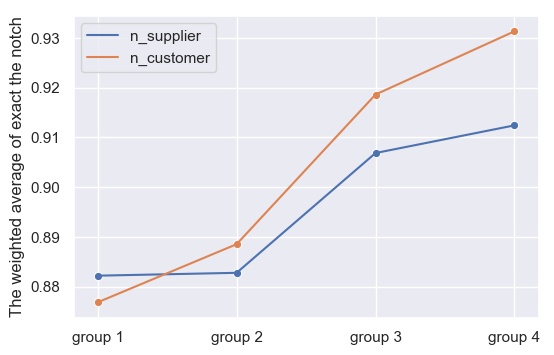

In [157]:
fig = plt.figure(dpi=100)
plt.rc('font', family='STFangsong')
sns.set(style="darkgrid")
sns.scatterplot(x=['group 1', 'group 2', 'group 3', 'group 4'],
                y="The weighted average of exact the notch",
                data=con_n_supplier)
sns.lineplot(x=['group 1', 'group 2', 'group 3', 'group 4'],
             y="The weighted average of exact the notch",
             data=con_n_supplier)

sns.scatterplot(x=['group 1', 'group 2', 'group 3', 'group 4'],
                y="The weighted average of exact the notch",
                data=con_n_customer)
sns.lineplot(x=['group 1', 'group 2', 'group 3', 'group 4'],
             y="The weighted average of exact the notch",
             data=con_n_customer)
plt.legend(['n_supplier','n_customer'])

From the plot we can see that there is also a positive relationship between accuracy and n_supplier. 

Now we need to consider both n_customer and n_supplier and try to find the best combination of the two variables.

## 4.3 The relationship between accuracy and n_customer, n_supplier combined

### 4.3.1 The accuracy of n_customer=0 + n_supplier=0

In [101]:
# The accuracy of each sector.
group_1_cs = data[(data['n_supplier']==0) & (data['n_customer']==0)]
group_1_cs_result = pd.DataFrame(columns=('sector', 'exact notch', 'within one notch'))
for sector in sector_list:
    # Select variables with missing values less than 10%
    data_sector = group_1_cs[group_1_cs.sector==sector]
    data_sector = data_sector[c_x_var_name].join(data_sector[s_x_var_name]).join(data_sector[f_x_var_name])
    missing_value = pd.DataFrame((data_sector.isna().sum()/len(data_sector)), columns=['na percentage'])
    feature_select = missing_value[(1-missing_value['na percentage'])>=0.9]
    feature_select = np.array(feature_select.index)  
    # Fill in the missing values by using the averages.
    select_data = data_sector[feature_select].fillna(data_sector[feature_select].mean())
    # Split the selected dataset.
    x_train, x_test, y_train, y_test = train_test_split(select_data[feature_select],group_1_cs.rgroup_code[group_1_cs.sector==sector],test_size = 0.3)
    # Apply LightGBM algorithm.
    model = lgb.LGBMClassifier(learning_rate=0.1, max_depth=5)
    model.fit(x_train, y_train)
    predict = model.predict(x_test)
    y_test = pd.DataFrame({'actual':y_test, 'predicted':predict})
    y_test['exact'] = y_test['actual'] == y_test['predicted']
    y_test['within_one'] = abs(y_test['actual']-y_test['predicted']<=1)
    lightgbm_exact_notch=len(y_test[y_test.exact==True])/len(y_test)
    lightgbm_within_one_notch = len(y_test[y_test.within_one==True])/len(y_test)
    
    group_1_cs_result = group_1_cs_result.append(pd.DataFrame({'sector':[sector], 'exact notch':[lightgbm_exact_notch], 'within one notch':[lightgbm_within_one_notch]}))

# Find out the sample volume for each sector in group_1_cs.
group_1_cs_volume = pd.DataFrame(columns=['volume'])
for sector in sector_list:
    group_1_cs_volume = group_1_cs_volume.append(pd.DataFrame({'volume':[len(group_1_cs[group_1_cs.sector==sector])]}))

# Calculate the weighted average accuracy of group_1_cs.
group_1_cs_ave_data = pd.concat([group_1_cs_result, group_1_cs_volume], axis=1)
group_1_cs_col_name = group_1_cs_ave_data.columns.tolist()
group_1_cs_col_name.insert(4, 'exact notch weighted value')
group_1_cs_col_name.insert(5, 'within one notch weighted value')
group_1_cs_ave_data = group_1_cs_ave_data.reindex(columns=group_1_cs_col_name)
group_1_cs_ave_data['exact notch weighted value'] = group_1_cs_ave_data.apply(
    lambda x: x['exact notch'] * x['volume'] / group_1_cs_ave_data['volume'].sum(),
    axis=1)
group_1_cs_ave_data['within one notch weighted value'] = group_1_cs_ave_data.apply(
    lambda x: x['within one notch'] * x['volume'] / group_1_cs_ave_data['volume'].sum(),
    axis=1)
group_1_cs_ave_data

,sector,exact notch,within one notch,volume,exact notch weighted value,within one notch weighted value
0,Consumer Discretionary,0.849057,0.981132,176,0.118317,0.136721
0,Financials & Real Estate,0.846154,1.000000,85,0.056946,0.067300
0,Utilities,0.666667,1.000000,20,0.010557,0.015835
0,Materials,0.880000,1.000000,165,0.114964,0.130641
0,Communication,0.842105,1.000000,62,0.041339,0.049089
0,Healthcare,1.000000,1.000000,210,0.166271,0.166271
0,Technology,0.758621,1.000000,96,0.057662,0.076010
0,Industrials,0.890909,1.000000,183,0.129087,0.144893
0,Consumer Staples,0.969697,1.000000,108,0.082919,0.085511
0,Energy,0.875000,1.000000,158,0.109462,0.125099


In [102]:
print('The weighted average of exact the notch:',group_1_cs_ave_data['exact notch weighted value'].sum())
print('The weighted average of within one notch:',group_1_cs_ave_data['within one notch weighted value'].sum())

The weighted average of exact the notch: 0.887523453212101
The weighted average of within one notch: 0.9973707405249554


### 4.3.2 The accuracy of n_customer=0 + n_supplier>3

In [103]:
# The accuracy of each sector.
group_2_cs = data[(data['n_supplier']>3) & (data['n_customer']==0)]
group_2_cs_result = pd.DataFrame(columns=('sector', 'exact notch', 'within one notch'))
for sector in sector_list:
    # Select variables with missing values less than 10%
    data_sector = group_2_cs[group_2_cs.sector==sector]
    data_sector = data_sector[c_x_var_name].join(data_sector[s_x_var_name]).join(data_sector[f_x_var_name])
    missing_value = pd.DataFrame((data_sector.isna().sum()/len(data_sector)), columns=['na percentage'])
    feature_select = missing_value[(1-missing_value['na percentage'])>=0.9]
    feature_select = np.array(feature_select.index)  
    # Fill in the missing values by using the averages.
    select_data = data_sector[feature_select].fillna(data_sector[feature_select].mean())
    # Split the selected dataset.
    x_train, x_test, y_train, y_test = train_test_split(select_data[feature_select],group_2_cs.rgroup_code[group_2_cs.sector==sector],test_size = 0.3)
    # Apply LightGBM algorithm.
    model = lgb.LGBMClassifier(learning_rate=0.1, max_depth=5)
    model.fit(x_train, y_train)
    predict = model.predict(x_test)
    y_test = pd.DataFrame({'actual':y_test, 'predicted':predict})
    y_test['exact'] = y_test['actual'] == y_test['predicted']
    y_test['within_one'] = abs(y_test['actual']-y_test['predicted']<=1)
    lightgbm_exact_notch=len(y_test[y_test.exact==True])/len(y_test)
    lightgbm_within_one_notch = len(y_test[y_test.within_one==True])/len(y_test)
    
    group_2_cs_result = group_2_cs_result.append(pd.DataFrame({'sector':[sector], 'exact notch':[lightgbm_exact_notch], 'within one notch':[lightgbm_within_one_notch]}))

# Find out the sample volume for each sector in group_2_cs.
group_2_cs_volume = pd.DataFrame(columns=['volume'])
for sector in sector_list:
    group_2_cs_volume = group_2_cs_volume.append(pd.DataFrame({'volume':[len(group_2_cs[group_2_cs.sector==sector])]}))

# Calculate the weighted average accuracy of group_2_cs.
group_2_cs_ave_data = pd.concat([group_2_cs_result, group_2_cs_volume], axis=1)
group_2_cs_col_name = group_2_cs_ave_data.columns.tolist()
group_2_cs_col_name.insert(4, 'exact notch weighted value')
group_2_cs_col_name.insert(5, 'within one notch weighted value')
group_2_cs_ave_data = group_2_cs_ave_data.reindex(columns=group_2_cs_col_name)
group_2_cs_ave_data['exact notch weighted value'] = group_2_cs_ave_data.apply(
    lambda x: x['exact notch'] * x['volume'] / group_2_cs_ave_data['volume'].sum(),
    axis=1)
group_2_cs_ave_data['within one notch weighted value'] = group_2_cs_ave_data.apply(
    lambda x: x['within one notch'] * x['volume'] / group_2_cs_ave_data['volume'].sum(),
    axis=1)
group_2_cs_ave_data

,sector,exact notch,within one notch,volume,exact notch weighted value,within one notch weighted value
0,Consumer Discretionary,0.829545,1.0,292,0.355172,0.428152
0,Financials & Real Estate,0.900000,1.0,31,0.040909,0.045455
0,Utilities,0.952381,1.0,69,0.096355,0.101173
0,Materials,0.666667,1.0,19,0.018573,0.027859
0,Communication,0.700000,1.0,31,0.031818,0.045455
0,Healthcare,0.866667,1.0,47,0.059726,0.068915
0,Technology,0.857143,1.0,44,0.055300,0.064516
0,Industrials,0.500000,1.0,11,0.008065,0.016129
0,Consumer Staples,0.962963,1.0,89,0.125665,0.130499
0,Energy,0.866667,1.0,49,0.062268,0.071848


In [104]:
print('The weighted average of exact the notch:',group_2_cs_ave_data['exact notch weighted value'].sum())
print('The weighted average of within one notch:',group_2_cs_ave_data['within one notch weighted value'].sum())

The weighted average of exact the notch: 0.8538507544372647
The weighted average of within one notch: 1.0


### 4.3.3 The accuracy of n_customer>4 + n_supplier=0

In [105]:
sector_list = data['sector'].drop_duplicates().tolist()
group_3_cs = data[(data['n_supplier']==0) & (data['n_customer']>4)]
group_3_cs_result = pd.DataFrame(columns=('sector', 'exact notch', 'within one notch'))
for sector in sector_list:
    print(sector, len(group_3_cs[group_3_cs.sector==sector]))

Consumer Discretionary 73
Financials & Real Estate 28
Utilities 1
Materials 152
Communication 35
Healthcare 19
Technology 135
Industrials 236
Consumer Staples 9
Energy 5


There is only 1 sample in Utilities sector that has n_customer>4 and n_supplier=0, so it cannot be divided into training set and test set. Therefore, we remove Utilities sector in this part.

In [106]:
sector_list.remove('Utilities')
for sector in sector_list:
    # Select variables with missing values less than 10%
    data_sector = group_3_cs[group_3_cs.sector==sector]
    data_sector = data_sector[c_x_var_name].join(data_sector[s_x_var_name]).join(data_sector[f_x_var_name])
    missing_value = pd.DataFrame((data_sector.isna().sum()/len(data_sector)), columns=['na percentage'])
    feature_select = missing_value[(1-missing_value['na percentage'])>=0.9]
    feature_select = np.array(feature_select.index)  
    # Fill in the missing values by using the averages.
    select_data = data_sector[feature_select].fillna(data_sector[feature_select].mean())
    # Split the selected dataset.
    x_train, x_test, y_train, y_test = train_test_split(select_data[feature_select],group_3_cs.rgroup_code[group_3_cs.sector==sector],test_size = 0.3)
    # Apply LightGBM algorithm.
    model = lgb.LGBMClassifier(learning_rate=0.1, max_depth=5)
    model.fit(x_train, y_train)
    predict = model.predict(x_test)
    y_test = pd.DataFrame({'actual':y_test, 'predicted':predict})
    y_test['exact'] = y_test['actual'] == y_test['predicted']
    y_test['within_one'] = abs(y_test['actual']-y_test['predicted']<=1)
    lightgbm_exact_notch=len(y_test[y_test.exact==True])/len(y_test)
    lightgbm_within_one_notch = len(y_test[y_test.within_one==True])/len(y_test)
    
    group_3_cs_result = group_3_cs_result.append(pd.DataFrame({'sector':[sector], 'exact notch':[lightgbm_exact_notch], 'within one notch':[lightgbm_within_one_notch]}))

# Find out the sample volume for each sector in group_3_cs.
group_3_cs_volume = pd.DataFrame(columns=['volume'])
for sector in sector_list:
    group_3_cs_volume = group_3_cs_volume.append(pd.DataFrame({'volume':[len(group_3_cs[group_3_cs.sector==sector])]}))

# Calculate the weighted average accuracy of group_3_cs.
group_3_cs_ave_data = pd.concat([group_3_cs_result, group_3_cs_volume], axis=1)
group_3_cs_col_name = group_3_cs_ave_data.columns.tolist()
group_3_cs_col_name.insert(4, 'exact notch weighted value')
group_3_cs_col_name.insert(5, 'within one notch weighted value')
group_3_cs_ave_data = group_3_cs_ave_data.reindex(columns=group_3_cs_col_name)
group_3_cs_ave_data['exact notch weighted value'] = group_3_cs_ave_data.apply(
    lambda x: x['exact notch'] * x['volume'] / group_3_cs_ave_data['volume'].sum(),
    axis=1)
group_3_cs_ave_data['within one notch weighted value'] = group_3_cs_ave_data.apply(
    lambda x: x['within one notch'] * x['volume'] / group_3_cs_ave_data['volume'].sum(),
    axis=1)
group_3_cs_ave_data

,sector,exact notch,within one notch,volume,exact notch weighted value,within one notch weighted value
0,Consumer Discretionary,1.000000,1.0,73,0.105491,0.105491
0,Financials & Real Estate,1.000000,1.0,28,0.040462,0.040462
0,Materials,0.891304,1.0,152,0.195778,0.219653
0,Communication,0.727273,1.0,35,0.036784,0.050578
0,Healthcare,1.000000,1.0,19,0.027457,0.027457
0,Technology,0.902439,1.0,135,0.176054,0.195087
0,Industrials,0.929577,1.0,236,0.317024,0.341040
0,Consumer Staples,0.000000,1.0,9,0.000000,0.013006
0,Energy,1.000000,1.0,5,0.007225,0.007225


In [107]:
print('The weighted average of exact the notch:',group_3_cs_ave_data['exact notch weighted value'].sum())
print('The weighted average of within one notch:',group_3_cs_ave_data['within one notch weighted value'].sum())

The weighted average of exact the notch: 0.9062750813684024
The weighted average of within one notch: 1.0


### 4.3.4 The accuracy of n_customer>4 + n_supplier>3

In [108]:
sector_list = data['sector'].drop_duplicates().tolist()
group_4_cs = data[(data['n_supplier']>3) & (data['n_customer']>4)]
group_4_cs_result = pd.DataFrame(columns=('sector', 'exact notch', 'within one notch'))
for sector in sector_list:
    # Select variables with missing values less than 10%
    data_sector = group_4_cs[group_4_cs.sector==sector]
    data_sector = data_sector[c_x_var_name].join(data_sector[s_x_var_name]).join(data_sector[f_x_var_name])
    missing_value = pd.DataFrame((data_sector.isna().sum()/len(data_sector)), columns=['na percentage'])
    feature_select = missing_value[(1-missing_value['na percentage'])>=0.9]
    feature_select = np.array(feature_select.index)  
    # Fill in the missing values by using the averages.
    select_data = data_sector[feature_select].fillna(data_sector[feature_select].mean())
    # Split the selected dataset.
    x_train, x_test, y_train, y_test = train_test_split(select_data[feature_select],group_4_cs.rgroup_code[group_4_cs.sector==sector],test_size = 0.3)
    # Apply LightGBM algorithm.
    model = lgb.LGBMClassifier(learning_rate=0.1, max_depth=5)
    model.fit(x_train, y_train)
    predict = model.predict(x_test)
    y_test = pd.DataFrame({'actual':y_test, 'predicted':predict})
    y_test['exact'] = y_test['actual'] == y_test['predicted']
    y_test['within_one'] = abs(y_test['actual']-y_test['predicted']<=1)
    lightgbm_exact_notch=len(y_test[y_test.exact==True])/len(y_test)
    lightgbm_within_one_notch = len(y_test[y_test.within_one==True])/len(y_test)
    
    group_4_cs_result = group_4_cs_result.append(pd.DataFrame({'sector':[sector], 'exact notch':[lightgbm_exact_notch], 'within one notch':[lightgbm_within_one_notch]}))

# Find out the sample volume for each sector in group_3_cs.
group_4_cs_volume = pd.DataFrame(columns=['volume'])
for sector in sector_list:
    group_4_cs_volume = group_4_cs_volume.append(pd.DataFrame({'volume':[len(group_4_cs[group_4_cs.sector==sector])]}))

# Calculate the weighted average accuracy of group_3_cs.
group_4_cs_ave_data = pd.concat([group_4_cs_result, group_4_cs_volume], axis=1)
group_4_cs_col_name = group_4_cs_ave_data.columns.tolist()
group_4_cs_col_name.insert(4, 'exact notch weighted value')
group_4_cs_col_name.insert(5, 'within one notch weighted value')
group_4_cs_ave_data = group_4_cs_ave_data.reindex(columns=group_4_cs_col_name)
group_4_cs_ave_data['exact notch weighted value'] = group_4_cs_ave_data.apply(
    lambda x: x['exact notch'] * x['volume'] / group_4_cs_ave_data['volume'].sum(),
    axis=1)
group_4_cs_ave_data['within one notch weighted value'] = group_4_cs_ave_data.apply(
    lambda x: x['within one notch'] * x['volume'] / group_4_cs_ave_data['volume'].sum(),
    axis=1)
group_4_cs_ave_data

,sector,exact notch,within one notch,volume,exact notch weighted value,within one notch weighted value
0,Consumer Discretionary,0.900000,1.0,100,0.089910,0.099900
0,Financials & Real Estate,0.600000,1.0,14,0.008392,0.013986
0,Utilities,0.964286,1.0,93,0.089589,0.092907
0,Materials,0.777778,1.0,60,0.046620,0.059940
0,Communication,0.902439,1.0,136,0.122609,0.135864
0,Healthcare,1.000000,1.0,86,0.085914,0.085914
0,Technology,0.949153,1.0,195,0.184900,0.194805
0,Industrials,0.920635,1.0,210,0.193140,0.209790
0,Consumer Staples,1.000000,1.0,65,0.064935,0.064935
0,Energy,0.307692,1.0,42,0.012910,0.041958


In [109]:
print('The weighted average of exact the notch:',group_4_cs_ave_data['exact notch weighted value'].sum())
print('The weighted average of within one notch:',group_4_cs_ave_data['within one notch weighted value'].sum())

The weighted average of exact the notch: 0.8989191822491842
The weighted average of within one notch: 1.0


In [110]:
exact_notch_n_cs = pd.DataFrame(
    [
        group_1_cs_ave_data['exact notch weighted value'].sum(),
        group_2_cs_ave_data['exact notch weighted value'].sum(),
        group_3_cs_ave_data['exact notch weighted value'].sum(),
        group_4_cs_ave_data['exact notch weighted value'].sum()
    ],
    index=['c=0 s=0', 'c=0 s>3', 'c>4 s=0', 'c>4 s>3'],
    columns=['The weighted average of exact the notch'])
within_one_notch_n_cs = pd.DataFrame(
    [
        group_1_cs_ave_data['within one notch weighted value'].sum(),
        group_2_cs_ave_data['within one notch weighted value'].sum(),
        group_3_cs_ave_data['within one notch weighted value'].sum(),
        group_4_cs_ave_data['within one notch weighted value'].sum()
    ],
    index=['c=0 s=0', 'c=0 s>3', 'c>4 s=0', 'c>4 s>3'],
    columns=['The weighted average of within one notch'])
con_n_cs = exact_notch_n_cs.join(
    within_one_notch_n_cs['The weighted average of within one notch'])
con_n_cs

,The weighted average of exact the notch,The weighted average of within one notch
c=0 s=0,0.887523,0.997371
c=0 s>3,0.853851,1.000000
c>4 s=0,0.906275,1.000000
c>4 s>3,0.898919,1.000000


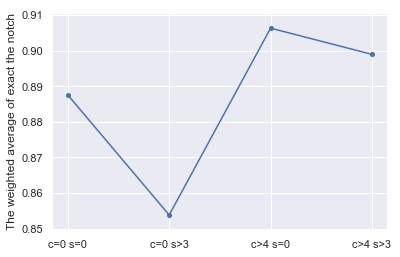

In [111]:
sns.scatterplot(x=['c=0 s=0', 'c=0 s>3', 'c>4 s=0', 'c>4 s>3'],
                y="The weighted average of exact the notch",
                data=con_n_cs)
sns.lineplot(x=['c=0 s=0', 'c=0 s>3', 'c>4 s=0', 'c>4 s>3'],
             y="The weighted average of exact the notch",
             data=con_n_cs)

According to the plot above, there is no clear relation between n_customer, n_supplier and accuracy, partly because lack of samples in some sectors. We may now include more combination of n_customer and n_supplier to draw a conclusion.

### 4.3.5 The accuracy of n_customer=0 + n_supplier=1

In [112]:
# The accuracy of each sector.
group_5_cs = data[(data['n_supplier']==1) & (data['n_customer']==0)]
group_5_cs_result = pd.DataFrame(columns=('sector', 'exact notch', 'within one notch'))
for sector in sector_list:
    # Select variables with missing values less than 10%
    data_sector = group_5_cs[group_5_cs.sector==sector]
    data_sector = data_sector[c_x_var_name].join(data_sector[s_x_var_name]).join(data_sector[f_x_var_name])
    missing_value = pd.DataFrame((data_sector.isna().sum()/len(data_sector)), columns=['na percentage'])
    feature_select = missing_value[(1-missing_value['na percentage'])>=0.9]
    feature_select = np.array(feature_select.index)  
    # Fill in the missing values by using the averages.
    select_data = data_sector[feature_select].fillna(data_sector[feature_select].mean())
    # Split the selected dataset.
    x_train, x_test, y_train, y_test = train_test_split(select_data[feature_select],group_5_cs.rgroup_code[group_5_cs.sector==sector],test_size = 0.3)
    # Apply LightGBM algorithm.
    model = lgb.LGBMClassifier(learning_rate=0.1, max_depth=5)
    model.fit(x_train, y_train)
    predict = model.predict(x_test)
    y_test = pd.DataFrame({'actual':y_test, 'predicted':predict})
    y_test['exact'] = y_test['actual'] == y_test['predicted']
    y_test['within_one'] = abs(y_test['actual']-y_test['predicted']<=1)
    lightgbm_exact_notch=len(y_test[y_test.exact==True])/len(y_test)
    lightgbm_within_one_notch = len(y_test[y_test.within_one==True])/len(y_test)
    
    group_5_cs_result = group_5_cs_result.append(pd.DataFrame({'sector':[sector], 'exact notch':[lightgbm_exact_notch], 'within one notch':[lightgbm_within_one_notch]}))

# Find out the sample volume for each sector in group_5_cs.
group_5_cs_volume = pd.DataFrame(columns=['volume'])
for sector in sector_list:
    group_5_cs_volume = group_5_cs_volume.append(pd.DataFrame({'volume':[len(group_5_cs[group_5_cs.sector==sector])]}))

# Calculate the weighted average accuracy of group_5_cs.
group_5_cs_ave_data = pd.concat([group_5_cs_result, group_5_cs_volume], axis=1)
group_5_cs_col_name = group_5_cs_ave_data.columns.tolist()
group_5_cs_col_name.insert(4, 'exact notch weighted value')
group_5_cs_col_name.insert(5, 'within one notch weighted value')
group_5_cs_ave_data = group_5_cs_ave_data.reindex(columns=group_5_cs_col_name)
group_5_cs_ave_data['exact notch weighted value'] = group_5_cs_ave_data.apply(
    lambda x: x['exact notch'] * x['volume'] / group_5_cs_ave_data['volume'].sum(),
    axis=1)
group_5_cs_ave_data['within one notch weighted value'] = group_5_cs_ave_data.apply(
    lambda x: x['within one notch'] * x['volume'] / group_5_cs_ave_data['volume'].sum(),
    axis=1)
group_5_cs_ave_data

,sector,exact notch,within one notch,volume,exact notch weighted value,within one notch weighted value
0,Consumer Discretionary,0.818182,0.981818,183,0.152472,0.182966
0,Financials & Real Estate,0.894737,1.000000,61,0.055579,0.062118
0,Utilities,0.916667,1.000000,77,0.071877,0.078411
0,Materials,0.833333,1.000000,118,0.100136,0.120163
0,Communication,0.333333,1.000000,38,0.012899,0.038697
0,Healthcare,0.973684,1.000000,126,0.124933,0.128310
0,Technology,0.961538,1.000000,84,0.082250,0.085540
0,Industrials,0.806452,1.000000,103,0.084587,0.104888
0,Consumer Staples,0.437500,1.000000,52,0.023167,0.052953
0,Energy,1.000000,1.000000,140,0.142566,0.142566


In [113]:
print('The weighted average of exact the notch:',group_5_cs_ave_data['exact notch weighted value'].sum())
print('The weighted average of within one notch:',group_5_cs_ave_data['within one notch weighted value'].sum())

The weighted average of exact the notch: 0.8504658969995986
The weighted average of within one notch: 0.996611738566932


### 4.3.6 The accuracy of n_customer=0 + n_supplier=2

In [114]:
# The accuracy of each sector.
group_6_cs = data[(data['n_supplier']==2) & (data['n_customer']==0)]
group_6_cs_result = pd.DataFrame(columns=('sector', 'exact notch', 'within one notch'))
for sector in sector_list:
    # Select variables with missing values less than 10%
    data_sector = group_6_cs[group_6_cs.sector==sector]
    data_sector = data_sector[c_x_var_name].join(data_sector[s_x_var_name]).join(data_sector[f_x_var_name])
    missing_value = pd.DataFrame((data_sector.isna().sum()/len(data_sector)), columns=['na percentage'])
    feature_select = missing_value[(1-missing_value['na percentage'])>=0.9]
    feature_select = np.array(feature_select.index)  
    # Fill in the missing values by using the averages.
    select_data = data_sector[feature_select].fillna(data_sector[feature_select].mean())
    # Split the selected dataset.
    x_train, x_test, y_train, y_test = train_test_split(select_data[feature_select],group_6_cs.rgroup_code[group_6_cs.sector==sector],test_size = 0.3)
    # Apply LightGBM algorithm.
    model = lgb.LGBMClassifier(learning_rate=0.1, max_depth=5)
    model.fit(x_train, y_train)
    predict = model.predict(x_test)
    y_test = pd.DataFrame({'actual':y_test, 'predicted':predict})
    y_test['exact'] = y_test['actual'] == y_test['predicted']
    y_test['within_one'] = abs(y_test['actual']-y_test['predicted']<=1)
    lightgbm_exact_notch=len(y_test[y_test.exact==True])/len(y_test)
    lightgbm_within_one_notch = len(y_test[y_test.within_one==True])/len(y_test)
    
    group_6_cs_result = group_6_cs_result.append(pd.DataFrame({'sector':[sector], 'exact notch':[lightgbm_exact_notch], 'within one notch':[lightgbm_within_one_notch]}))

# Find out the sample volume for each sector in group_6_cs.
group_6_cs_volume = pd.DataFrame(columns=['volume'])
for sector in sector_list:
    group_6_cs_volume = group_6_cs_volume.append(pd.DataFrame({'volume':[len(group_6_cs[group_6_cs.sector==sector])]}))

# Calculate the weighted average accuracy of group_6_cs.
group_6_cs_ave_data = pd.concat([group_6_cs_result, group_6_cs_volume], axis=1)
group_6_cs_col_name = group_6_cs_ave_data.columns.tolist()
group_6_cs_col_name.insert(4, 'exact notch weighted value')
group_6_cs_col_name.insert(5, 'within one notch weighted value')
group_6_cs_ave_data = group_6_cs_ave_data.reindex(columns=group_6_cs_col_name)
group_6_cs_ave_data['exact notch weighted value'] = group_6_cs_ave_data.apply(
    lambda x: x['exact notch'] * x['volume'] / group_6_cs_ave_data['volume'].sum(),
    axis=1)
group_6_cs_ave_data['within one notch weighted value'] = group_6_cs_ave_data.apply(
    lambda x: x['within one notch'] * x['volume'] / group_6_cs_ave_data['volume'].sum(),
    axis=1)
group_6_cs_ave_data

,sector,exact notch,within one notch,volume,exact notch weighted value,within one notch weighted value
0,Consumer Discretionary,0.777778,1.0,88,0.160668,0.206573
0,Financials & Real Estate,0.500000,1.0,33,0.038732,0.077465
0,Utilities,0.791667,1.0,77,0.143095,0.180751
0,Materials,0.642857,1.0,46,0.069416,0.107981
0,Communication,0.750000,1.0,12,0.021127,0.028169
0,Healthcare,0.470588,1.0,56,0.061861,0.131455
0,Technology,0.000000,1.0,9,0.000000,0.021127
0,Industrials,0.166667,1.0,17,0.006651,0.039906
0,Consumer Staples,0.454545,1.0,34,0.036278,0.079812
0,Energy,0.411765,1.0,54,0.052196,0.126761


In [115]:
print('The weighted average of exact the notch:',group_6_cs_ave_data['exact notch weighted value'].sum())
print('The weighted average of within one notch:',group_6_cs_ave_data['within one notch weighted value'].sum())

The weighted average of exact the notch: 0.5900242263643257
The weighted average of within one notch: 1.0


### 4.3.7 The accuracy of n_customer=0 + n_supplier=3

In [116]:
# The accuracy of each sector.
group_7_cs = data[(data['n_supplier']==3) & (data['n_customer']==0)]
group_7_cs_result = pd.DataFrame(columns=('sector', 'exact notch', 'within one notch'))
for sector in sector_list:
    # Select variables with missing values less than 10%
    data_sector = group_7_cs[group_7_cs.sector==sector]
    data_sector = data_sector[c_x_var_name].join(data_sector[s_x_var_name]).join(data_sector[f_x_var_name])
    missing_value = pd.DataFrame((data_sector.isna().sum()/len(data_sector)), columns=['na percentage'])
    feature_select = missing_value[(1-missing_value['na percentage'])>=0.9]
    feature_select = np.array(feature_select.index)  
    # Fill in the missing values by using the averages.
    select_data = data_sector[feature_select].fillna(data_sector[feature_select].mean())
    # Split the selected dataset.
    x_train, x_test, y_train, y_test = train_test_split(select_data[feature_select],group_7_cs.rgroup_code[group_7_cs.sector==sector],test_size = 0.3)
    # Apply LightGBM algorithm.
    model = lgb.LGBMClassifier(learning_rate=0.1, max_depth=5)
    model.fit(x_train, y_train)
    predict = model.predict(x_test)
    y_test = pd.DataFrame({'actual':y_test, 'predicted':predict})
    y_test['exact'] = y_test['actual'] == y_test['predicted']
    y_test['within_one'] = abs(y_test['actual']-y_test['predicted']<=1)
    lightgbm_exact_notch=len(y_test[y_test.exact==True])/len(y_test)
    lightgbm_within_one_notch = len(y_test[y_test.within_one==True])/len(y_test)
    
    group_7_cs_result = group_7_cs_result.append(pd.DataFrame({'sector':[sector], 'exact notch':[lightgbm_exact_notch], 'within one notch':[lightgbm_within_one_notch]}))

# Find out the sample volume for each sector in group_7_cs.
group_7_cs_volume = pd.DataFrame(columns=['volume'])
for sector in sector_list:
    group_7_cs_volume = group_7_cs_volume.append(pd.DataFrame({'volume':[len(group_7_cs[group_7_cs.sector==sector])]}))

# Calculate the weighted average accuracy of group_7_cs.
group_7_cs_ave_data = pd.concat([group_7_cs_result, group_7_cs_volume], axis=1)
group_7_cs_col_name = group_7_cs_ave_data.columns.tolist()
group_7_cs_col_name.insert(4, 'exact notch weighted value')
group_7_cs_col_name.insert(5, 'within one notch weighted value')
group_7_cs_ave_data = group_7_cs_ave_data.reindex(columns=group_7_cs_col_name)
group_7_cs_ave_data['exact notch weighted value'] = group_7_cs_ave_data.apply(
    lambda x: x['exact notch'] * x['volume'] / group_7_cs_ave_data['volume'].sum(),
    axis=1)
group_7_cs_ave_data['within one notch weighted value'] = group_7_cs_ave_data.apply(
    lambda x: x['within one notch'] * x['volume'] / group_7_cs_ave_data['volume'].sum(),
    axis=1)
group_7_cs_ave_data

,sector,exact notch,within one notch,volume,exact notch weighted value,within one notch weighted value
0,Consumer Discretionary,0.814815,0.962963,87,0.209112,0.247132
0,Financials & Real Estate,0.875000,1.000000,24,0.061947,0.070796
0,Utilities,0.571429,1.000000,45,0.075853,0.132743
0,Materials,0.666667,1.000000,20,0.039331,0.058997
0,Communication,0.333333,1.000000,40,0.039331,0.117994
0,Healthcare,0.583333,1.000000,38,0.065388,0.112094
0,Technology,0.666667,1.000000,10,0.019666,0.029499
0,Industrials,0.000000,1.000000,3,0.000000,0.008850
0,Consumer Staples,0.416667,1.000000,38,0.046706,0.112094
0,Energy,0.727273,1.000000,34,0.072942,0.100295


In [117]:
print('The weighted average of exact the notch:',group_7_cs_ave_data['exact notch weighted value'].sum())
print('The weighted average of within one notch:',group_7_cs_ave_data['within one notch weighted value'].sum())

The weighted average of exact the notch: 0.6302766391261967
The weighted average of within one notch: 0.9904949196984595


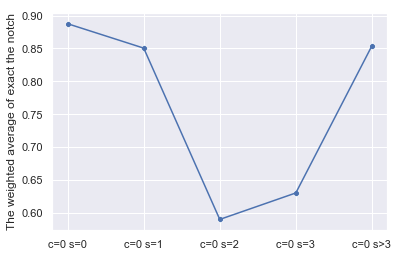

In [118]:
con_n_cs1 = pd.DataFrame(
    [
        group_1_cs_ave_data['exact notch weighted value'].sum(),
        group_5_cs_ave_data['exact notch weighted value'].sum(),
        group_6_cs_ave_data['exact notch weighted value'].sum(),
        group_7_cs_ave_data['exact notch weighted value'].sum(),
        group_2_cs_ave_data['exact notch weighted value'].sum()
    ],
    index=['c=0 s=0', 'c=0 s=1', 'c=0 s=2', 'c=0 s=3', 'c=0 s>3'],
    columns=['The weighted average of exact the notch'])
sns.scatterplot(x=['c=0 s=0', 'c=0 s=1', 'c=0 s=2', 'c=0 s=3', 'c=0 s>3'],
                y="The weighted average of exact the notch",
                data=con_n_cs1)
sns.lineplot(x=['c=0 s=0', 'c=0 s=1', 'c=0 s=2', 'c=0 s=3', 'c=0 s>3'],
             y="The weighted average of exact the notch",
             data=con_n_cs1)

There is a general negative relation between n_supplier and prediction accuracy when n_customer=0 and s<=2. The accuracy increases when s>2, but not higher than c=0 s=0. Since the sample volume is small for some section, the outcome is not stable.

### 4.3.8 The accuracies of n_customer=1 and  n_supplier=*

In [119]:
# The accuracy of each sector when n_customer=1 and n_supplier<4.
for i in range(0, 4):
    locals()['group_cs_' + str(i)] = data[(data['n_supplier'] == i) & (data['n_customer'] == 1)]
    locals()['group_cs_result_' + str(i)] = pd.DataFrame(columns=('sector', 'exact notch', 'within one notch'))
    for sector in sector_list:
        # Select variables with missing values less than 10%
        data_sector = locals()['group_cs_' + str(i)][locals()['group_cs_' + str(i)].sector == sector]
        data_sector = data_sector[c_x_var_name].join(data_sector[s_x_var_name]).join(data_sector[f_x_var_name])
        missing_value = pd.DataFrame(
            (data_sector.isna().sum() / len(data_sector)),
            columns=['na percentage'])
        feature_select = missing_value[(1 - missing_value['na percentage']) >= 0.9]
        feature_select = np.array(feature_select.index)
        # Fill in the missing values by using the averages.
        select_data = data_sector[feature_select].fillna(data_sector[feature_select].mean())
        # Split the selected dataset.
        x_train, x_test, y_train, y_test = train_test_split(
            select_data[feature_select],
            locals()['group_cs_' + str(i)].rgroup_code[locals()['group_cs_' + str(i)].sector == sector],
            test_size=0.3)
        # Apply LightGBM algorithm.
        model = lgb.LGBMClassifier(learning_rate=0.1, max_depth=5)
        model.fit(x_train, y_train)
        predict = model.predict(x_test)
        y_test = pd.DataFrame({'actual': y_test, 'predicted': predict})
        y_test['exact'] = y_test['actual'] == y_test['predicted']
        y_test['within_one'] = abs(y_test['actual'] - y_test['predicted'] <= 1)
        lightgbm_exact_notch = len(y_test[y_test.exact == True]) / len(y_test)
        lightgbm_within_one_notch = len(
            y_test[y_test.within_one == True]) / len(y_test)

        locals()['group_cs_result_' + str(i)] = locals()['group_cs_result_' + str(i)].append(
                     pd.DataFrame({
                         'sector': [sector],
                         'exact notch': [lightgbm_exact_notch],
                         'within one notch': [lightgbm_within_one_notch]
                     }))

    # Find out the sample volume for each sector in group_cs.
    locals()['group_cs_volume' + str(i)] = pd.DataFrame(columns=['volume'])
    for sector in sector_list:
        locals()['group_cs_volume' +
                 str(i)] = locals()['group_cs_volume' + str(i)].append(
                     pd.DataFrame({
                         'volume': [
                             len(locals()['group_cs_' + str(i)][locals()[
                                 'group_cs_' + str(i)].sector == sector])
                         ]
                     }))

    # Calculate the weighted average accuracy of group_cs.
    locals()['group_cs_ave_data' + str(i)] = pd.concat([
        locals()['group_cs_result_' + str(i)],
        locals()['group_cs_volume' + str(i)]],axis=1)
    locals()['group_cs_col_name' + str(i)] = locals()['group_cs_ave_data' + str(i)].columns.tolist()
    locals()['group_cs_col_name' + str(i)].insert(4, 'exact notch weighted value')
    locals()['group_cs_col_name' + str(i)].insert(5, 'within one notch weighted value')
    locals()['group_cs_ave_data' + str(i)] = locals()['group_cs_ave_data' + str(i)].reindex(columns=locals()['group_cs_col_name' + str(i)])
    volume = locals()['group_cs_ave_data' + str(i)]['volume'].sum()
    locals()['group_cs_ave_data' + str(i)]['exact notch weighted value'] = locals()['group_cs_ave_data' + str(i)].apply(
            lambda x: x['exact notch'] * x['volume'] / volume ,
                     axis=1)
    locals()['group_cs_ave_data' + str(i)]['within one notch weighted value'] = locals()['group_cs_ave_data' + str(i)].apply(
            lambda x: x['within one notch'] * x['volume'] / volume,
                     axis=1)
    locals()['group_cs_ave_data' + str(i)]

    
# The accuracy of each sector when n_customer=1 and n_supplier>3.
group_cs_5 = data[(data['n_supplier']>3) & (data['n_customer']==1)]
group_cs_result_5 = pd.DataFrame(columns=('sector', 'exact notch', 'within one notch'))
for sector in sector_list:
    # Select variables with missing values less than 10%
    data_sector = group_cs_5[group_cs_5.sector==sector]
    data_sector = data_sector[c_x_var_name].join(data_sector[s_x_var_name]).join(data_sector[f_x_var_name])
    missing_value = pd.DataFrame((data_sector.isna().sum()/len(data_sector)), columns=['na percentage'])
    feature_select = missing_value[(1-missing_value['na percentage'])>=0.9]
    feature_select = np.array(feature_select.index)  
    # Fill in the missing values by using the averages.
    select_data = data_sector[feature_select].fillna(data_sector[feature_select].mean())
    # Split the selected dataset.
    x_train, x_test, y_train, y_test = train_test_split(select_data[feature_select],group_cs_5.rgroup_code[group_cs_5.sector==sector],test_size = 0.3)
    # Apply LightGBM algorithm.
    model = lgb.LGBMClassifier(learning_rate=0.1, max_depth=5)
    model.fit(x_train, y_train)
    predict = model.predict(x_test)
    y_test = pd.DataFrame({'actual':y_test, 'predicted':predict})
    y_test['exact'] = y_test['actual'] == y_test['predicted']
    y_test['within_one'] = abs(y_test['actual']-y_test['predicted']<=1)
    lightgbm_exact_notch=len(y_test[y_test.exact==True])/len(y_test)
    lightgbm_within_one_notch = len(y_test[y_test.within_one==True])/len(y_test)
    
    group_cs_result_5 = group_cs_result_5.append(pd.DataFrame({'sector':[sector], 'exact notch':[lightgbm_exact_notch], 'within one notch':[lightgbm_within_one_notch]}))

# Find out the sample volume for each sector.
group_cs_volume5 = pd.DataFrame(columns=['volume'])
for sector in sector_list:
    group_cs_volume5 = group_cs_volume5.append(pd.DataFrame({'volume':[len(group_cs_5[group_cs_5.sector==sector])]}))

# Calculate the weighted average accuracy.
group_cs_ave_data5 = pd.concat([group_cs_result_5, group_cs_volume5], axis=1)
group_cs_col_name5 = group_cs_ave_data5.columns.tolist()
group_cs_col_name5.insert(4, 'exact notch weighted value')
group_cs_col_name5.insert(5, 'within one notch weighted value')
group_cs_ave_data5 = group_cs_ave_data5.reindex(columns=group_cs_col_name5)
group_cs_ave_data5['exact notch weighted value'] = group_cs_ave_data5.apply(
    lambda x: x['exact notch'] * x['volume'] / group_cs_ave_data5['volume'].sum(),
    axis=1)
group_cs_ave_data5['within one notch weighted value'] = group_cs_ave_data5.apply(
    lambda x: x['within one notch'] * x['volume'] / group_cs_ave_data5['volume'].sum(),
    axis=1)


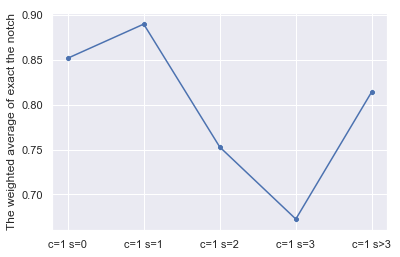

In [120]:
con_n_cs2 = pd.DataFrame(
    [
        group_cs_ave_data0['exact notch weighted value'].sum(),
        group_cs_ave_data1['exact notch weighted value'].sum(),
        group_cs_ave_data2['exact notch weighted value'].sum(),
        group_cs_ave_data3['exact notch weighted value'].sum(),
        group_cs_ave_data5['exact notch weighted value'].sum()
    ],
    index=['c=1 s=0', 'c=1 s=1', 'c=1 s=2', 'c=1 s=3', 'c=1 s>3'],
    columns=['The weighted average of exact the notch'])
sns.scatterplot(x=['c=1 s=0', 'c=1 s=1', 'c=1 s=2', 'c=1 s=3', 'c=1 s>3'],
                y="The weighted average of exact the notch",
                data=con_n_cs2)
sns.lineplot(x=['c=1 s=0', 'c=1 s=1', 'c=1 s=2', 'c=1 s=3', 'c=1 s>3'],
             y="The weighted average of exact the notch",
             data=con_n_cs2)

When fix n_customer at 1, the accuracy decreases when n_supplier changes from 1 to 3. The accuracy has a dramatic increase when s>3.

### 4.3.8 The accuracies of n_customer=2,3,4 and n_supplier=*

In [121]:
# The accuracy of each sector when n_customer=2,3,4 and n_supplier<4.
for i in range(0, 4):
    locals()['group_cs_' + str(i)] = data[(data['n_supplier'] == i) & (data['n_customer'] > 1) & (data['n_customer']<5)]
    locals()['group_cs_result_' + str(i)] = pd.DataFrame(columns=('sector', 'exact notch', 'within one notch'))
    for sector in sector_list:
        # Select variables with missing values less than 10%
        data_sector = locals()['group_cs_' + str(i)][locals()['group_cs_' + str(i)].sector == sector]
        data_sector = data_sector[c_x_var_name].join(data_sector[s_x_var_name]).join(data_sector[f_x_var_name])
        missing_value = pd.DataFrame(
            (data_sector.isna().sum() / len(data_sector)),
            columns=['na percentage'])
        feature_select = missing_value[(1 - missing_value['na percentage']) >= 0.9]
        feature_select = np.array(feature_select.index)
        # Fill in the missing values by using the averages.
        select_data = data_sector[feature_select].fillna(data_sector[feature_select].mean())
        # Split the selected dataset.
        x_train, x_test, y_train, y_test = train_test_split(
            select_data[feature_select],
            locals()['group_cs_' + str(i)].rgroup_code[locals()['group_cs_' + str(i)].sector == sector],
            test_size=0.3)
        # Apply LightGBM algorithm.
        model = lgb.LGBMClassifier(learning_rate=0.1, max_depth=5)
        model.fit(x_train, y_train)
        predict = model.predict(x_test)
        y_test = pd.DataFrame({'actual': y_test, 'predicted': predict})
        y_test['exact'] = y_test['actual'] == y_test['predicted']
        y_test['within_one'] = abs(y_test['actual'] - y_test['predicted'] <= 1)
        lightgbm_exact_notch = len(y_test[y_test.exact == True]) / len(y_test)
        lightgbm_within_one_notch = len(
            y_test[y_test.within_one == True]) / len(y_test)

        locals()['group_cs_result_' + str(i)] = locals()['group_cs_result_' + str(i)].append(
                     pd.DataFrame({
                         'sector': [sector],
                         'exact notch': [lightgbm_exact_notch],
                         'within one notch': [lightgbm_within_one_notch]
                     }))

    # Find out the sample volume for each sector in group_cs.
    locals()['group_cs_volume' + str(i)] = pd.DataFrame(columns=['volume'])
    for sector in sector_list:
        locals()['group_cs_volume' +
                 str(i)] = locals()['group_cs_volume' + str(i)].append(
                     pd.DataFrame({
                         'volume': [
                             len(locals()['group_cs_' + str(i)][locals()[
                                 'group_cs_' + str(i)].sector == sector])
                         ]
                     }))

    # Calculate the weighted average accuracy of group_cs.
    locals()['group_cs_ave_data' + str(i)] = pd.concat([
        locals()['group_cs_result_' + str(i)],
        locals()['group_cs_volume' + str(i)]],axis=1)
    locals()['group_cs_col_name' + str(i)] = locals()['group_cs_ave_data' + str(i)].columns.tolist()
    locals()['group_cs_col_name' + str(i)].insert(4, 'exact notch weighted value')
    locals()['group_cs_col_name' + str(i)].insert(5, 'within one notch weighted value')
    locals()['group_cs_ave_data' + str(i)] = locals()['group_cs_ave_data' + str(i)].reindex(columns=locals()['group_cs_col_name' + str(i)])
    volume = locals()['group_cs_ave_data' + str(i)]['volume'].sum()
    locals()['group_cs_ave_data' + str(i)]['exact notch weighted value'] = locals()['group_cs_ave_data' + str(i)].apply(
            lambda x: x['exact notch'] * x['volume'] / volume ,
                     axis=1)
    locals()['group_cs_ave_data' + str(i)]['within one notch weighted value'] = locals()['group_cs_ave_data' + str(i)].apply(
            lambda x: x['within one notch'] * x['volume'] / volume,
                     axis=1)
    locals()['group_cs_ave_data' + str(i)]

    
# The accuracy of each sector when n_customer=1 and n_supplier>3.
group_cs_5 = data[(data['n_supplier']>3) & (data['n_customer'] > 1) & (data['n_customer']<5)]
group_cs_result_5 = pd.DataFrame(columns=('sector', 'exact notch', 'within one notch'))
for sector in sector_list:
    # Select variables with missing values less than 10%
    data_sector = group_cs_5[group_cs_5.sector==sector]
    data_sector = data_sector[c_x_var_name].join(data_sector[s_x_var_name]).join(data_sector[f_x_var_name])
    missing_value = pd.DataFrame((data_sector.isna().sum()/len(data_sector)), columns=['na percentage'])
    feature_select = missing_value[(1-missing_value['na percentage'])>=0.9]
    feature_select = np.array(feature_select.index)  
    # Fill in the missing values by using the averages.
    select_data = data_sector[feature_select].fillna(data_sector[feature_select].mean())
    # Split the selected dataset.
    x_train, x_test, y_train, y_test = train_test_split(select_data[feature_select],group_cs_5.rgroup_code[group_cs_5.sector==sector],test_size = 0.3)
    # Apply LightGBM algorithm.
    model = lgb.LGBMClassifier(learning_rate=0.1, max_depth=5)
    model.fit(x_train, y_train)
    predict = model.predict(x_test)
    y_test = pd.DataFrame({'actual':y_test, 'predicted':predict})
    y_test['exact'] = y_test['actual'] == y_test['predicted']
    y_test['within_one'] = abs(y_test['actual']-y_test['predicted']<=1)
    lightgbm_exact_notch=len(y_test[y_test.exact==True])/len(y_test)
    lightgbm_within_one_notch = len(y_test[y_test.within_one==True])/len(y_test)
    
    group_cs_result_5 = group_cs_result_5.append(pd.DataFrame({'sector':[sector], 'exact notch':[lightgbm_exact_notch], 'within one notch':[lightgbm_within_one_notch]}))

# Find out the sample volume for each sector.
group_cs_volume5 = pd.DataFrame(columns=['volume'])
for sector in sector_list:
    group_cs_volume5 = group_cs_volume5.append(pd.DataFrame({'volume':[len(group_cs_5[group_cs_5.sector==sector])]}))

# Calculate the weighted average accuracy.
group_cs_ave_data5 = pd.concat([group_cs_result_5, group_cs_volume5], axis=1)
group_cs_col_name5 = group_cs_ave_data5.columns.tolist()
group_cs_col_name5.insert(4, 'exact notch weighted value')
group_cs_col_name5.insert(5, 'within one notch weighted value')
group_cs_ave_data5 = group_cs_ave_data5.reindex(columns=group_cs_col_name5)
group_cs_ave_data5['exact notch weighted value'] = group_cs_ave_data5.apply(
    lambda x: x['exact notch'] * x['volume'] / group_cs_ave_data5['volume'].sum(),
    axis=1)
group_cs_ave_data5['within one notch weighted value'] = group_cs_ave_data5.apply(
    lambda x: x['within one notch'] * x['volume'] / group_cs_ave_data5['volume'].sum(),
    axis=1)

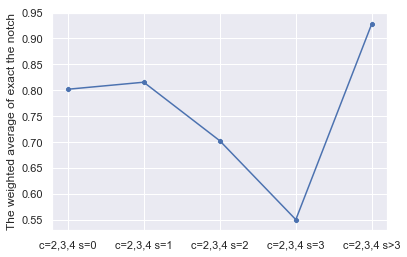

In [122]:
con_n_cs3 = pd.DataFrame(
    [
        group_cs_ave_data0['exact notch weighted value'].sum(),
        group_cs_ave_data1['exact notch weighted value'].sum(),
        group_cs_ave_data2['exact notch weighted value'].sum(),
        group_cs_ave_data3['exact notch weighted value'].sum(),
        group_cs_ave_data5['exact notch weighted value'].sum()
    ],
    index=['c=2,3,4 s=0', 'c=2,3,4 s=1', 'c=2,3,4 s=2', 'c=2,3,4 s=3', 'c=2,3,4 s>3'],
    columns=['The weighted average of exact the notch'])
sns.scatterplot(x=['c=2,3,4 s=0', 'c=2,3,4 s=1', 'c=2,3,4 s=2', 'c=2,3,4 s=3', 'c=2,3,4 s>3'],
                y="The weighted average of exact the notch",
                data=con_n_cs3)
sns.lineplot(x=['c=2,3,4 s=0', 'c=2,3,4 s=1', 'c=2,3,4 s=2', 'c=2,3,4 s=3', 'c=2,3,4 s>3'],
             y="The weighted average of exact the notch",
             data=con_n_cs3)

When fix n_customer at 1, the accuracy has a slight increase when n_supplier changes from 0 to 1,but decreases when n_supplier changes from 1 to 3. The accuracy has a dramatic increase when s>3.

### 4.3.9 The accuracies of n_customer>4 and n_supplier=*

Like 4.3.3, there are not enough sample for some sections that satisfy n_customer>4 and n_supplier=*. So, for now, we do not consider this part.

### 4.3.10 The accuracies of n_customer=* and n_supplier=0

Like 4.3.3, there are not enough sample for some sections that satisfy n_customer=* and n_supplier=0. So, for now, we do not consider this part.

### 4.3.11 The accuracies of n_customer=* and n_supplier=1

In [123]:
# The accuracy of each sector when n_customer<5 and n_supplier=1.
for i in range(0, 5):
    locals()['group_cs_' + str(i)] = data[(data['n_supplier'] == 1) & (data['n_customer'] == i)]
    locals()['group_cs_result_' + str(i)] = pd.DataFrame(columns=('sector', 'exact notch', 'within one notch'))
    for sector in sector_list:
        # Select variables with missing values less than 10%
        data_sector = locals()['group_cs_' + str(i)][locals()['group_cs_' + str(i)].sector == sector]
        data_sector = data_sector[c_x_var_name].join(data_sector[s_x_var_name]).join(data_sector[f_x_var_name])
        missing_value = pd.DataFrame(
            (data_sector.isna().sum() / len(data_sector)),
            columns=['na percentage'])
        feature_select = missing_value[(1 - missing_value['na percentage']) >= 0.9]
        feature_select = np.array(feature_select.index)
        # Fill in the missing values by using the averages.
        select_data = data_sector[feature_select].fillna(data_sector[feature_select].mean())
        # Split the selected dataset.
        x_train, x_test, y_train, y_test = train_test_split(
            select_data[feature_select],
            locals()['group_cs_' + str(i)].rgroup_code[locals()['group_cs_' + str(i)].sector == sector],
            test_size=0.3)
        # Apply LightGBM algorithm.
        model = lgb.LGBMClassifier(learning_rate=0.1, max_depth=5)
        model.fit(x_train, y_train)
        predict = model.predict(x_test)
        y_test = pd.DataFrame({'actual': y_test, 'predicted': predict})
        y_test['exact'] = y_test['actual'] == y_test['predicted']
        y_test['within_one'] = abs(y_test['actual'] - y_test['predicted'] <= 1)
        lightgbm_exact_notch = len(y_test[y_test.exact == True]) / len(y_test)
        lightgbm_within_one_notch = len(
            y_test[y_test.within_one == True]) / len(y_test)

        locals()['group_cs_result_' + str(i)] = locals()['group_cs_result_' + str(i)].append(
                     pd.DataFrame({
                         'sector': [sector],
                         'exact notch': [lightgbm_exact_notch],
                         'within one notch': [lightgbm_within_one_notch]
                     }))

    # Find out the sample volume for each sector in group_cs.
    locals()['group_cs_volume' + str(i)] = pd.DataFrame(columns=['volume'])
    for sector in sector_list:
        locals()['group_cs_volume' +
                 str(i)] = locals()['group_cs_volume' + str(i)].append(
                     pd.DataFrame({
                         'volume': [
                             len(locals()['group_cs_' + str(i)][locals()[
                                 'group_cs_' + str(i)].sector == sector])
                         ]
                     }))

    # Calculate the weighted average accuracy of group_cs.
    locals()['group_cs_ave_data' + str(i)] = pd.concat([
        locals()['group_cs_result_' + str(i)],
        locals()['group_cs_volume' + str(i)]],axis=1)
    locals()['group_cs_col_name' + str(i)] = locals()['group_cs_ave_data' + str(i)].columns.tolist()
    locals()['group_cs_col_name' + str(i)].insert(4, 'exact notch weighted value')
    locals()['group_cs_col_name' + str(i)].insert(5, 'within one notch weighted value')
    locals()['group_cs_ave_data' + str(i)] = locals()['group_cs_ave_data' + str(i)].reindex(columns=locals()['group_cs_col_name' + str(i)])
    volume = locals()['group_cs_ave_data' + str(i)]['volume'].sum()
    locals()['group_cs_ave_data' + str(i)]['exact notch weighted value'] = locals()['group_cs_ave_data' + str(i)].apply(
            lambda x: x['exact notch'] * x['volume'] / volume ,
                     axis=1)
    locals()['group_cs_ave_data' + str(i)]['within one notch weighted value'] = locals()['group_cs_ave_data' + str(i)].apply(
            lambda x: x['within one notch'] * x['volume'] / volume,
                     axis=1)
    locals()['group_cs_ave_data' + str(i)]

    
# The accuracy of each sector when n_customer>4 and n_supplier=1.
group_cs_6 = data[(data['n_supplier']==1) & (data['n_customer'] > 4)]
group_cs_result_6 = pd.DataFrame(columns=('sector', 'exact notch', 'within one notch'))
for sector in sector_list:
    # Select variables with missing values less than 10%
    data_sector = group_cs_6[group_cs_6.sector==sector]
    data_sector = data_sector[c_x_var_name].join(data_sector[s_x_var_name]).join(data_sector[f_x_var_name])
    missing_value = pd.DataFrame((data_sector.isna().sum()/len(data_sector)), columns=['na percentage'])
    feature_select = missing_value[(1-missing_value['na percentage'])>=0.9]
    feature_select = np.array(feature_select.index)  
    # Fill in the missing values by using the averages.
    select_data = data_sector[feature_select].fillna(data_sector[feature_select].mean())
    # Split the selected dataset.
    x_train, x_test, y_train, y_test = train_test_split(select_data[feature_select],group_cs_6.rgroup_code[group_cs_6.sector==sector],test_size = 0.3)
    # Apply LightGBM algorithm.
    model = lgb.LGBMClassifier(learning_rate=0.1, max_depth=5)
    model.fit(x_train, y_train)
    predict = model.predict(x_test)
    y_test = pd.DataFrame({'actual':y_test, 'predicted':predict})
    y_test['exact'] = y_test['actual'] == y_test['predicted']
    y_test['within_one'] = abs(y_test['actual']-y_test['predicted']<=1)
    lightgbm_exact_notch=len(y_test[y_test.exact==True])/len(y_test)
    lightgbm_within_one_notch = len(y_test[y_test.within_one==True])/len(y_test)
    
    group_cs_result_6 = group_cs_result_6.append(pd.DataFrame({'sector':[sector], 'exact notch':[lightgbm_exact_notch], 'within one notch':[lightgbm_within_one_notch]}))

# Find out the sample volume for each sector.
group_cs_volume6 = pd.DataFrame(columns=['volume'])
for sector in sector_list:
    group_cs_volume6 = group_cs_volume6.append(pd.DataFrame({'volume':[len(group_cs_6[group_cs_6.sector==sector])]}))

# Calculate the weighted average accuracy.
group_cs_ave_data6 = pd.concat([group_cs_result_6, group_cs_volume6], axis=1)
group_cs_col_name6 = group_cs_ave_data6.columns.tolist()
group_cs_col_name6.insert(4, 'exact notch weighted value')
group_cs_col_name6.insert(5, 'within one notch weighted value')
group_cs_ave_data6 = group_cs_ave_data6.reindex(columns=group_cs_col_name6)
group_cs_ave_data6['exact notch weighted value'] = group_cs_ave_data6.apply(
    lambda x: x['exact notch'] * x['volume'] / group_cs_ave_data6['volume'].sum(),
    axis=1)
group_cs_ave_data6['within one notch weighted value'] = group_cs_ave_data6.apply(
    lambda x: x['within one notch'] * x['volume'] / group_cs_ave_data6['volume'].sum(),
    axis=1)

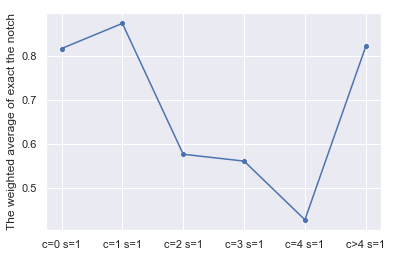

In [124]:
con_n_cs4 = pd.DataFrame(
    [
        group_cs_ave_data0['exact notch weighted value'].sum(),
        group_cs_ave_data1['exact notch weighted value'].sum(),
        group_cs_ave_data2['exact notch weighted value'].sum(),
        group_cs_ave_data3['exact notch weighted value'].sum(),
        group_cs_ave_data4['exact notch weighted value'].sum(),
        group_cs_ave_data6['exact notch weighted value'].sum()
    ],
    index=['c=0 s=1', 'c=1 s=1', 'c=2 s=1', 'c=3 s=1', 'c=4 s=1', 'c>4 s=1'],
    columns=['The weighted average of exact the notch'])
sns.scatterplot(x=['c=0 s=1', 'c=1 s=1', 'c=2 s=1', 'c=3 s=1', 'c=4 s=1', 'c>4 s=1'],
                y="The weighted average of exact the notch",
                data=con_n_cs4)
sns.lineplot(x=['c=0 s=1', 'c=1 s=1', 'c=2 s=1', 'c=3 s=1', 'c=4 s=1', 'c>4 s=1'],
             y="The weighted average of exact the notch",
             data=con_n_cs4)

### 4.3.12 The accuracies of n_customer=* and n_supplier=2,3

In [125]:
# The accuracy of each sector when n_customer<5 and n_supplier=2,3.
for i in range(0, 5):
    locals()['group_cs_' + str(i)] = data[(data['n_supplier'] > 1) & (data['n_supplier'] < 4) & (data['n_customer'] == i)]
    locals()['group_cs_result_' + str(i)] = pd.DataFrame(columns=('sector', 'exact notch', 'within one notch'))
    for sector in sector_list:
        # Select variables with missing values less than 10%
        data_sector = locals()['group_cs_' + str(i)][locals()['group_cs_' + str(i)].sector == sector]
        data_sector = data_sector[c_x_var_name].join(data_sector[s_x_var_name]).join(data_sector[f_x_var_name])
        missing_value = pd.DataFrame(
            (data_sector.isna().sum() / len(data_sector)),
            columns=['na percentage'])
        feature_select = missing_value[(1 - missing_value['na percentage']) >= 0.9]
        feature_select = np.array(feature_select.index)
        # Fill in the missing values by using the averages.
        select_data = data_sector[feature_select].fillna(data_sector[feature_select].mean())
        # Split the selected dataset.
        x_train, x_test, y_train, y_test = train_test_split(
            select_data[feature_select],
            locals()['group_cs_' + str(i)].rgroup_code[locals()['group_cs_' + str(i)].sector == sector],
            test_size=0.3)
        # Apply LightGBM algorithm.
        model = lgb.LGBMClassifier(learning_rate=0.1, max_depth=5)
        model.fit(x_train, y_train)
        predict = model.predict(x_test)
        y_test = pd.DataFrame({'actual': y_test, 'predicted': predict})
        y_test['exact'] = y_test['actual'] == y_test['predicted']
        y_test['within_one'] = abs(y_test['actual'] - y_test['predicted'] <= 1)
        lightgbm_exact_notch = len(y_test[y_test.exact == True]) / len(y_test)
        lightgbm_within_one_notch = len(
            y_test[y_test.within_one == True]) / len(y_test)

        locals()['group_cs_result_' + str(i)] = locals()['group_cs_result_' + str(i)].append(
                     pd.DataFrame({
                         'sector': [sector],
                         'exact notch': [lightgbm_exact_notch],
                         'within one notch': [lightgbm_within_one_notch]
                     }))

    # Find out the sample volume for each sector in group_cs.
    locals()['group_cs_volume' + str(i)] = pd.DataFrame(columns=['volume'])
    for sector in sector_list:
        locals()['group_cs_volume' +
                 str(i)] = locals()['group_cs_volume' + str(i)].append(
                     pd.DataFrame({
                         'volume': [
                             len(locals()['group_cs_' + str(i)][locals()[
                                 'group_cs_' + str(i)].sector == sector])
                         ]
                     }))

    # Calculate the weighted average accuracy of group_cs.
    locals()['group_cs_ave_data' + str(i)] = pd.concat([
        locals()['group_cs_result_' + str(i)],
        locals()['group_cs_volume' + str(i)]],axis=1)
    locals()['group_cs_col_name' + str(i)] = locals()['group_cs_ave_data' + str(i)].columns.tolist()
    locals()['group_cs_col_name' + str(i)].insert(4, 'exact notch weighted value')
    locals()['group_cs_col_name' + str(i)].insert(5, 'within one notch weighted value')
    locals()['group_cs_ave_data' + str(i)] = locals()['group_cs_ave_data' + str(i)].reindex(columns=locals()['group_cs_col_name' + str(i)])
    volume = locals()['group_cs_ave_data' + str(i)]['volume'].sum()
    locals()['group_cs_ave_data' + str(i)]['exact notch weighted value'] = locals()['group_cs_ave_data' + str(i)].apply(
            lambda x: x['exact notch'] * x['volume'] / volume ,
                     axis=1)
    locals()['group_cs_ave_data' + str(i)]['within one notch weighted value'] = locals()['group_cs_ave_data' + str(i)].apply(
            lambda x: x['within one notch'] * x['volume'] / volume,
                     axis=1)
    locals()['group_cs_ave_data' + str(i)]

    
# The accuracy of each sector when n_customer>4 and n_supplier=2,3.
group_cs_6 = data[(data['n_supplier'] > 1) & (data['n_supplier'] < 4) & (data['n_customer'] > 4)]
group_cs_result_6 = pd.DataFrame(columns=('sector', 'exact notch', 'within one notch'))
for sector in sector_list:
    # Select variables with missing values less than 10%
    data_sector = group_cs_6[group_cs_6.sector==sector]
    data_sector = data_sector[c_x_var_name].join(data_sector[s_x_var_name]).join(data_sector[f_x_var_name])
    missing_value = pd.DataFrame((data_sector.isna().sum()/len(data_sector)), columns=['na percentage'])
    feature_select = missing_value[(1-missing_value['na percentage'])>=0.9]
    feature_select = np.array(feature_select.index)  
    # Fill in the missing values by using the averages.
    select_data = data_sector[feature_select].fillna(data_sector[feature_select].mean())
    # Split the selected dataset.
    x_train, x_test, y_train, y_test = train_test_split(select_data[feature_select],group_cs_6.rgroup_code[group_cs_6.sector==sector],test_size = 0.3)
    # Apply LightGBM algorithm.
    model = lgb.LGBMClassifier(learning_rate=0.1, max_depth=5)
    model.fit(x_train, y_train)
    predict = model.predict(x_test)
    y_test = pd.DataFrame({'actual':y_test, 'predicted':predict})
    y_test['exact'] = y_test['actual'] == y_test['predicted']
    y_test['within_one'] = abs(y_test['actual']-y_test['predicted']<=1)
    lightgbm_exact_notch=len(y_test[y_test.exact==True])/len(y_test)
    lightgbm_within_one_notch = len(y_test[y_test.within_one==True])/len(y_test)
    
    group_cs_result_6 = group_cs_result_6.append(pd.DataFrame({'sector':[sector], 'exact notch':[lightgbm_exact_notch], 'within one notch':[lightgbm_within_one_notch]}))

# Find out the sample volume for each sector.
group_cs_volume6 = pd.DataFrame(columns=['volume'])
for sector in sector_list:
    group_cs_volume6 = group_cs_volume6.append(pd.DataFrame({'volume':[len(group_cs_6[group_cs_6.sector==sector])]}))

# Calculate the weighted average accuracy.
group_cs_ave_data6 = pd.concat([group_cs_result_6, group_cs_volume6], axis=1)
group_cs_col_name6 = group_cs_ave_data6.columns.tolist()
group_cs_col_name6.insert(4, 'exact notch weighted value')
group_cs_col_name6.insert(5, 'within one notch weighted value')
group_cs_ave_data6 = group_cs_ave_data6.reindex(columns=group_cs_col_name6)
group_cs_ave_data6['exact notch weighted value'] = group_cs_ave_data6.apply(
    lambda x: x['exact notch'] * x['volume'] / group_cs_ave_data6['volume'].sum(),
    axis=1)
group_cs_ave_data6['within one notch weighted value'] = group_cs_ave_data6.apply(
    lambda x: x['within one notch'] * x['volume'] / group_cs_ave_data6['volume'].sum(),
    axis=1)

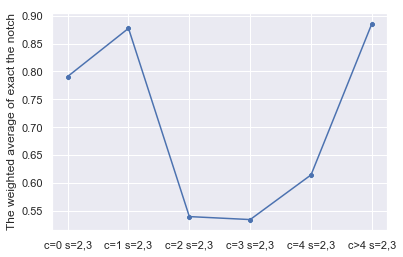

In [126]:
con_n_cs5 = pd.DataFrame(
    [
        group_cs_ave_data0['exact notch weighted value'].sum(),
        group_cs_ave_data1['exact notch weighted value'].sum(),
        group_cs_ave_data2['exact notch weighted value'].sum(),
        group_cs_ave_data3['exact notch weighted value'].sum(),
        group_cs_ave_data4['exact notch weighted value'].sum(),
        group_cs_ave_data6['exact notch weighted value'].sum()
    ],
    index=['c=0 s=2,3', 'c=1 s=2,3', 'c=2 s=2,3', 'c=3 s=2,3', 'c=4 s=2,3', 'c>4 s=2,3'],
    columns=['The weighted average of exact the notch'])
sns.scatterplot(x=['c=0 s=2,3', 'c=1 s=2,3', 'c=2 s=2,3', 'c=3 s=2,3', 'c=4 s=2,3', 'c>4 s=2,3'],
                y="The weighted average of exact the notch",
                data=con_n_cs5)
sns.lineplot(x=['c=0 s=2,3', 'c=1 s=2,3', 'c=2 s=2,3', 'c=3 s=2,3', 'c=4 s=2,3', 'c>4 s=2,3'],
             y="The weighted average of exact the notch",
             data=con_n_cs5)

### 4.3.13 The accuracies of n_customer=* and n_supplier>3

In [127]:
# The accuracy of each sector when n_customer<5 and n_supplier>3.
for i in range(0, 5):
    locals()['group_cs_' + str(i)] = data[(data['n_supplier'] > 3) & (data['n_customer'] == i)]
    locals()['group_cs_result_' + str(i)] = pd.DataFrame(columns=('sector', 'exact notch', 'within one notch'))
    for sector in sector_list:
        # Select variables with missing values less than 10%
        data_sector = locals()['group_cs_' + str(i)][locals()['group_cs_' + str(i)].sector == sector]
        data_sector = data_sector[c_x_var_name].join(data_sector[s_x_var_name]).join(data_sector[f_x_var_name])
        missing_value = pd.DataFrame(
            (data_sector.isna().sum() / len(data_sector)),
            columns=['na percentage'])
        feature_select = missing_value[(1 - missing_value['na percentage']) >= 0.9]
        feature_select = np.array(feature_select.index)
        # Fill in the missing values by using the averages.
        select_data = data_sector[feature_select].fillna(data_sector[feature_select].mean())
        # Split the selected dataset.
        x_train, x_test, y_train, y_test = train_test_split(
            select_data[feature_select],
            locals()['group_cs_' + str(i)].rgroup_code[locals()['group_cs_' + str(i)].sector == sector],
            test_size=0.3)
        # Apply LightGBM algorithm.
        model = lgb.LGBMClassifier(learning_rate=0.1, max_depth=5)
        model.fit(x_train, y_train)
        predict = model.predict(x_test)
        y_test = pd.DataFrame({'actual': y_test, 'predicted': predict})
        y_test['exact'] = y_test['actual'] == y_test['predicted']
        y_test['within_one'] = abs(y_test['actual'] - y_test['predicted'] <= 1)
        lightgbm_exact_notch = len(y_test[y_test.exact == True]) / len(y_test)
        lightgbm_within_one_notch = len(
            y_test[y_test.within_one == True]) / len(y_test)

        locals()['group_cs_result_' + str(i)] = locals()['group_cs_result_' + str(i)].append(
                     pd.DataFrame({
                         'sector': [sector],
                         'exact notch': [lightgbm_exact_notch],
                         'within one notch': [lightgbm_within_one_notch]
                     }))

    # Find out the sample volume for each sector in group_cs.
    locals()['group_cs_volume' + str(i)] = pd.DataFrame(columns=['volume'])
    for sector in sector_list:
        locals()['group_cs_volume' +
                 str(i)] = locals()['group_cs_volume' + str(i)].append(
                     pd.DataFrame({
                         'volume': [
                             len(locals()['group_cs_' + str(i)][locals()[
                                 'group_cs_' + str(i)].sector == sector])
                         ]
                     }))

    # Calculate the weighted average accuracy of group_cs.
    locals()['group_cs_ave_data' + str(i)] = pd.concat([
        locals()['group_cs_result_' + str(i)],
        locals()['group_cs_volume' + str(i)]],axis=1)
    locals()['group_cs_col_name' + str(i)] = locals()['group_cs_ave_data' + str(i)].columns.tolist()
    locals()['group_cs_col_name' + str(i)].insert(4, 'exact notch weighted value')
    locals()['group_cs_col_name' + str(i)].insert(5, 'within one notch weighted value')
    locals()['group_cs_ave_data' + str(i)] = locals()['group_cs_ave_data' + str(i)].reindex(columns=locals()['group_cs_col_name' + str(i)])
    volume = locals()['group_cs_ave_data' + str(i)]['volume'].sum()
    locals()['group_cs_ave_data' + str(i)]['exact notch weighted value'] = locals()['group_cs_ave_data' + str(i)].apply(
            lambda x: x['exact notch'] * x['volume'] / volume ,
                     axis=1)
    locals()['group_cs_ave_data' + str(i)]['within one notch weighted value'] = locals()['group_cs_ave_data' + str(i)].apply(
            lambda x: x['within one notch'] * x['volume'] / volume,
                     axis=1)
    locals()['group_cs_ave_data' + str(i)]

    
# The accuracy of each sector when n_customer>4 and n_supplier>3.
group_cs_6 = data[(data['n_supplier'] > 3) & (data['n_customer'] > 4)]
group_cs_result_6 = pd.DataFrame(columns=('sector', 'exact notch', 'within one notch'))
for sector in sector_list:
    # Select variables with missing values less than 10%
    data_sector = group_cs_6[group_cs_6.sector==sector]
    data_sector = data_sector[c_x_var_name].join(data_sector[s_x_var_name]).join(data_sector[f_x_var_name])
    missing_value = pd.DataFrame((data_sector.isna().sum()/len(data_sector)), columns=['na percentage'])
    feature_select = missing_value[(1-missing_value['na percentage'])>=0.9]
    feature_select = np.array(feature_select.index)  
    # Fill in the missing values by using the averages.
    select_data = data_sector[feature_select].fillna(data_sector[feature_select].mean())
    # Split the selected dataset.
    x_train, x_test, y_train, y_test = train_test_split(select_data[feature_select],group_cs_6.rgroup_code[group_cs_6.sector==sector],test_size = 0.3)
    # Apply LightGBM algorithm.
    model = lgb.LGBMClassifier(learning_rate=0.1, max_depth=5)
    model.fit(x_train, y_train)
    predict = model.predict(x_test)
    y_test = pd.DataFrame({'actual':y_test, 'predicted':predict})
    y_test['exact'] = y_test['actual'] == y_test['predicted']
    y_test['within_one'] = abs(y_test['actual']-y_test['predicted']<=1)
    lightgbm_exact_notch=len(y_test[y_test.exact==True])/len(y_test)
    lightgbm_within_one_notch = len(y_test[y_test.within_one==True])/len(y_test)
    
    group_cs_result_6 = group_cs_result_6.append(pd.DataFrame({'sector':[sector], 'exact notch':[lightgbm_exact_notch], 'within one notch':[lightgbm_within_one_notch]}))

# Find out the sample volume for each sector.
group_cs_volume6 = pd.DataFrame(columns=['volume'])
for sector in sector_list:
    group_cs_volume6 = group_cs_volume6.append(pd.DataFrame({'volume':[len(group_cs_6[group_cs_6.sector==sector])]}))

# Calculate the weighted average accuracy.
group_cs_ave_data6 = pd.concat([group_cs_result_6, group_cs_volume6], axis=1)
group_cs_col_name6 = group_cs_ave_data6.columns.tolist()
group_cs_col_name6.insert(4, 'exact notch weighted value')
group_cs_col_name6.insert(5, 'within one notch weighted value')
group_cs_ave_data6 = group_cs_ave_data6.reindex(columns=group_cs_col_name6)
group_cs_ave_data6['exact notch weighted value'] = group_cs_ave_data6.apply(
    lambda x: x['exact notch'] * x['volume'] / group_cs_ave_data6['volume'].sum(),
    axis=1)
group_cs_ave_data6['within one notch weighted value'] = group_cs_ave_data6.apply(
    lambda x: x['within one notch'] * x['volume'] / group_cs_ave_data6['volume'].sum(),
    axis=1)

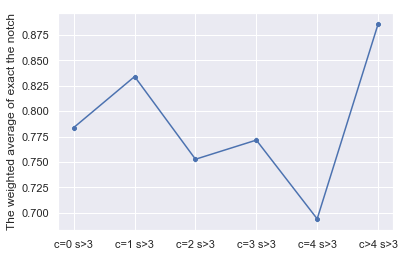

In [128]:
con_n_cs6 = pd.DataFrame(
    [
        group_cs_ave_data0['exact notch weighted value'].sum(),
        group_cs_ave_data1['exact notch weighted value'].sum(),
        group_cs_ave_data2['exact notch weighted value'].sum(),
        group_cs_ave_data3['exact notch weighted value'].sum(),
        group_cs_ave_data4['exact notch weighted value'].sum(),
        group_cs_ave_data6['exact notch weighted value'].sum()
    ],
    index=['c=0 s>3', 'c=1 s>3', 'c=2 s>3', 'c=3 s>3', 'c=4 s>3', 'c>4 s>3'],
    columns=['The weighted average of exact the notch'])
sns.scatterplot(x=['c=0 s>3', 'c=1 s>3', 'c=2 s>3', 'c=3 s>3', 'c=4 s>3', 'c>4 s>3'],
                y="The weighted average of exact the notch",
                data=con_n_cs6)
sns.lineplot(x=['c=0 s>3', 'c=1 s>3', 'c=2 s>3', 'c=3 s>3', 'c=4 s>3', 'c>4 s>3'],
             y="The weighted average of exact the notch",
             data=con_n_cs6)

## 4.4 Conclusion

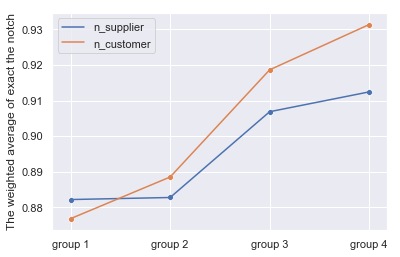

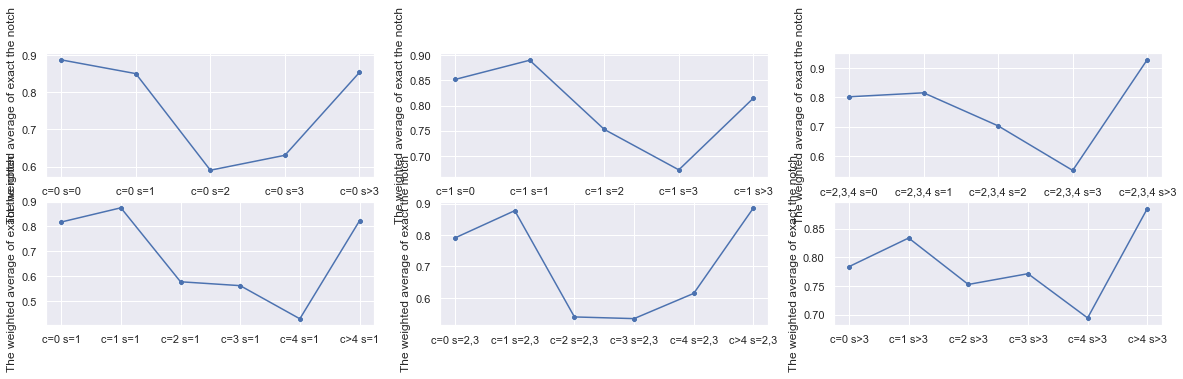

In [158]:
sns.scatterplot(x=['group 1', 'group 2', 'group 3', 'group 4'],
                y="The weighted average of exact the notch",
                data=con_n_supplier)
sns.lineplot(x=['group 1', 'group 2', 'group 3', 'group 4'],
             y="The weighted average of exact the notch",
             data=con_n_supplier)

sns.scatterplot(x=['group 1', 'group 2', 'group 3', 'group 4'],
                y="The weighted average of exact the notch",
                data=con_n_customer)
sns.lineplot(x=['group 1', 'group 2', 'group 3', 'group 4'],
             y="The weighted average of exact the notch",
             data=con_n_customer)
plt.legend(['n_supplier','n_customer'])

fig, axes = plt.subplots(2,3,figsize=(20,5))

sns.scatterplot(x=['c=0 s=0', 'c=0 s=1', 'c=0 s=2', 'c=0 s=3', 'c=0 s>3'],
                y="The weighted average of exact the notch",
                data=con_n_cs1, ax=axes[0,0])
sns.lineplot(x=['c=0 s=0', 'c=0 s=1', 'c=0 s=2', 'c=0 s=3', 'c=0 s>3'],
             y="The weighted average of exact the notch",
             data=con_n_cs1, ax=axes[0,0])

sns.scatterplot(x=['c=1 s=0', 'c=1 s=1', 'c=1 s=2', 'c=1 s=3', 'c=1 s>3'],
                y="The weighted average of exact the notch",
                data=con_n_cs2,ax=axes[0,1])
sns.lineplot(x=['c=1 s=0', 'c=1 s=1', 'c=1 s=2', 'c=1 s=3', 'c=1 s>3'],
             y="The weighted average of exact the notch",
             data=con_n_cs2, ax=axes[0,1])

sns.scatterplot(x=['c=2,3,4 s=0', 'c=2,3,4 s=1', 'c=2,3,4 s=2', 'c=2,3,4 s=3', 'c=2,3,4 s>3'],
                y="The weighted average of exact the notch",
                data=con_n_cs3, ax=axes[0,2])
sns.lineplot(x=['c=2,3,4 s=0', 'c=2,3,4 s=1', 'c=2,3,4 s=2', 'c=2,3,4 s=3', 'c=2,3,4 s>3'],
             y="The weighted average of exact the notch",
             data=con_n_cs3, ax=axes[0,2])

sns.scatterplot(x=['c=0 s=1', 'c=1 s=1', 'c=2 s=1', 'c=3 s=1', 'c=4 s=1', 'c>4 s=1'],
                y="The weighted average of exact the notch",
                data=con_n_cs4, ax=axes[1,0])
sns.lineplot(x=['c=0 s=1', 'c=1 s=1', 'c=2 s=1', 'c=3 s=1', 'c=4 s=1', 'c>4 s=1'],
             y="The weighted average of exact the notch",
             data=con_n_cs4, ax=axes[1,0])

sns.scatterplot(x=['c=0 s=2,3', 'c=1 s=2,3', 'c=2 s=2,3', 'c=3 s=2,3', 'c=4 s=2,3', 'c>4 s=2,3'],
                y="The weighted average of exact the notch",
                data=con_n_cs5, ax=axes[1,1])
sns.lineplot(x=['c=0 s=2,3', 'c=1 s=2,3', 'c=2 s=2,3', 'c=3 s=2,3', 'c=4 s=2,3', 'c>4 s=2,3'],
             y="The weighted average of exact the notch",
             data=con_n_cs5, ax=axes[1,1])

sns.scatterplot(x=['c=0 s>3', 'c=1 s>3', 'c=2 s>3', 'c=3 s>3', 'c=4 s>3', 'c>4 s>3'],
                y="The weighted average of exact the notch",
                data=con_n_cs6, ax=axes[1,2])
sns.lineplot(x=['c=0 s>3', 'c=1 s>3', 'c=2 s>3', 'c=3 s>3', 'c=4 s>3', 'c>4 s>3'],
             y="The weighted average of exact the notch",
             data=con_n_cs6, ax=axes[1,2])


When considering n_customer or n_supplier alone, they both have positive relationship with the prediction accuracy. The trends are similar when one of the two variable is fixed and change the value of the other variable, they decrease at first then increase. However, we should notice that because of the lack of samples, the result is not stable.